# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 90911 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 90911) |           | Elapsed Time: 0:00:26 ETA:  28 days, 0:51:52

  0% (   89 of 90911) |                    | Elapsed Time: 0:00:27 ETA:  0:16:54

  0% (  177 of 90911) |                    | Elapsed Time: 0:00:28 ETA:  0:16:50

  0% (  262 of 90911) |                    | Elapsed Time: 0:00:29 ETA:  0:17:03

  0% (  340 of 90911) |                    | Elapsed Time: 0:00:30 ETA:  0:17:29

  0% (  418 of 90911) |                    | Elapsed Time: 0:00:31 ETA:  0:17:47

  0% (  497 of 90911) |                    | Elapsed Time: 0:00:32 ETA:  0:17:56

  0% (  576 of 90911) |                    | Elapsed Time: 0:00:33 ETA:  0:18:02

  0% (  656 of 90911) |                    | Elapsed Time: 0:00:34 ETA:  0:18:04

  0% (  736 of 90911) |                    | Elapsed Time: 0:00:35 ETA:  0:18:06

  0% (  815 of 90911) |                    | Elapsed Time: 0:00:36 ETA:  0:18:18

  0% (  894 of 90911) |                    | Elapsed Time: 0:00:37 ETA:  0:18:32

  1% (  976 of 90911) |                    | Elapsed Time: 0:00:38 ETA:  0:18:35

  1% ( 1058 of 90911) |                    | Elapsed Time: 0:00:39 ETA:  0:18:28

  1% ( 1137 of 90911) |                    | Elapsed Time: 0:00:40 ETA:  0:18:21

  1% ( 1219 of 90911) |                    | Elapsed Time: 0:00:41 ETA:  0:18:15

  1% ( 1283 of 90911) |                    | Elapsed Time: 0:00:43 ETA:  0:19:47

  1% ( 1364 of 90911) |                    | Elapsed Time: 0:00:44 ETA:  0:19:44

  1% ( 1446 of 90911) |                    | Elapsed Time: 0:00:45 ETA:  0:19:39

  1% ( 1530 of 90911) |                    | Elapsed Time: 0:00:46 ETA:  0:19:30

  1% ( 1611 of 90911) |                    | Elapsed Time: 0:00:47 ETA:  0:19:25

  1% ( 1695 of 90911) |                    | Elapsed Time: 0:00:48 ETA:  0:19:21

  1% ( 1781 of 90911) |                    | Elapsed Time: 0:00:49 ETA:  0:19:13

  2% ( 1861 of 90911) |                    | Elapsed Time: 0:00:50 ETA:  0:19:13

  2% ( 1945 of 90911) |                    | Elapsed Time: 0:00:51 ETA:  0:19:09

  2% ( 2031 of 90911) |                    | Elapsed Time: 0:00:52 ETA:  0:17:28

  2% ( 2116 of 90911) |                    | Elapsed Time: 0:00:53 ETA:  0:17:20

  2% ( 2199 of 90911) |                    | Elapsed Time: 0:00:54 ETA:  0:17:18

  2% ( 2273 of 90911) |                    | Elapsed Time: 0:00:55 ETA:  0:17:25

  2% ( 2344 of 90911) |                    | Elapsed Time: 0:00:56 ETA:  0:17:39

  2% ( 2411 of 90911) |                    | Elapsed Time: 0:00:57 ETA:  0:18:04

  2% ( 2479 of 90911) |                    | Elapsed Time: 0:00:58 ETA:  0:18:33

  2% ( 2548 of 90911) |                    | Elapsed Time: 0:00:59 ETA:  0:18:51

  2% ( 2617 of 90911) |                    | Elapsed Time: 0:01:00 ETA:  0:19:17

  2% ( 2687 of 90911) |                    | Elapsed Time: 0:01:01 ETA:  0:19:45

  3% ( 2756 of 90911) |                    | Elapsed Time: 0:01:02 ETA:  0:20:15

  3% ( 2825 of 90911) |                    | Elapsed Time: 0:01:03 ETA:  0:20:42

  3% ( 2894 of 90911) |                    | Elapsed Time: 0:01:04 ETA:  0:20:59

  3% ( 2963 of 90911) |                    | Elapsed Time: 0:01:05 ETA:  0:21:03

  3% ( 3036 of 90911) |                    | Elapsed Time: 0:01:06 ETA:  0:20:50

  3% ( 3107 of 90911) |                    | Elapsed Time: 0:01:07 ETA:  0:20:44

  3% ( 3181 of 90911) |                    | Elapsed Time: 0:01:08 ETA:  0:20:32

  3% ( 3261 of 90911) |                    | Elapsed Time: 0:01:09 ETA:  0:20:08

  3% ( 3340 of 90911) |                    | Elapsed Time: 0:01:10 ETA:  0:19:50

  3% ( 3410 of 90911) |                    | Elapsed Time: 0:01:11 ETA:  0:19:34

  3% ( 3489 of 90911) |                    | Elapsed Time: 0:01:12 ETA:  0:19:14

  3% ( 3570 of 90911) |                    | Elapsed Time: 0:01:13 ETA:  0:18:52

  4% ( 3649 of 90911) |                    | Elapsed Time: 0:01:14 ETA:  0:18:33

  4% ( 3728 of 90911) |                    | Elapsed Time: 0:01:15 ETA:  0:18:20

  4% ( 3809 of 90911) |                    | Elapsed Time: 0:01:16 ETA:  0:18:02

  4% ( 3895 of 90911) |                    | Elapsed Time: 0:01:17 ETA:  0:17:42

  4% ( 3984 of 90911) |                    | Elapsed Time: 0:01:18 ETA:  0:17:27

  4% ( 4074 of 90911) |                    | Elapsed Time: 0:01:19 ETA:  0:17:08

  4% ( 4163 of 90911) |                    | Elapsed Time: 0:01:20 ETA:  0:16:52

  4% ( 4245 of 90911) |                    | Elapsed Time: 0:01:21 ETA:  0:16:46

  4% ( 4334 of 90911) |                    | Elapsed Time: 0:01:22 ETA:  0:16:34

  4% ( 4422 of 90911) |                    | Elapsed Time: 0:01:23 ETA:  0:16:20

  4% ( 4496 of 90911) |                    | Elapsed Time: 0:01:25 ETA:  0:18:04

  5% ( 4546 of 90911) |#                   | Elapsed Time: 0:01:25 ETA:  0:18:03

  5% ( 4630 of 90911) |#                   | Elapsed Time: 0:01:26 ETA:  0:18:06

  5% ( 4715 of 90911) |#                   | Elapsed Time: 0:01:27 ETA:  0:18:11

  5% ( 4802 of 90911) |#                   | Elapsed Time: 0:01:28 ETA:  0:18:15

  5% ( 4890 of 90911) |#                   | Elapsed Time: 0:01:29 ETA:  0:18:16

  5% ( 4979 of 90911) |#                   | Elapsed Time: 0:01:30 ETA:  0:18:04

  5% ( 5069 of 90911) |#                   | Elapsed Time: 0:01:31 ETA:  0:18:01

  5% ( 5159 of 90911) |#                   | Elapsed Time: 0:01:32 ETA:  0:17:58

  5% ( 5249 of 90911) |#                   | Elapsed Time: 0:01:33 ETA:  0:15:51

  5% ( 5340 of 90911) |#                   | Elapsed Time: 0:01:34 ETA:  0:15:42

  5% ( 5432 of 90911) |#                   | Elapsed Time: 0:01:35 ETA:  0:15:31

  6% ( 5520 of 90911) |#                   | Elapsed Time: 0:01:36 ETA:  0:15:27

  6% ( 5596 of 90911) |#                   | Elapsed Time: 0:01:37 ETA:  0:15:41

  6% ( 5682 of 90911) |#                   | Elapsed Time: 0:01:38 ETA:  0:15:54

  6% ( 5763 of 90911) |#                   | Elapsed Time: 0:01:39 ETA:  0:16:06

  6% ( 5841 of 90911) |#                   | Elapsed Time: 0:01:40 ETA:  0:16:23

  6% ( 5922 of 90911) |#                   | Elapsed Time: 0:01:41 ETA:  0:16:36

  6% ( 6004 of 90911) |#                   | Elapsed Time: 0:01:42 ETA:  0:16:50

  6% ( 6086 of 90911) |#                   | Elapsed Time: 0:01:44 ETA:  0:17:06

  6% ( 6168 of 90911) |#                   | Elapsed Time: 0:01:45 ETA:  0:17:16

  6% ( 6250 of 90911) |#                   | Elapsed Time: 0:01:46 ETA:  0:17:05

  6% ( 6334 of 90911) |#                   | Elapsed Time: 0:01:47 ETA:  0:16:55

  7% ( 6414 of 90911) |#                   | Elapsed Time: 0:01:48 ETA:  0:16:56

  7% ( 6496 of 90911) |#                   | Elapsed Time: 0:01:49 ETA:  0:16:54

  7% ( 6577 of 90911) |#                   | Elapsed Time: 0:01:50 ETA:  0:16:48

  7% ( 6659 of 90911) |#                   | Elapsed Time: 0:01:51 ETA:  0:16:46

  7% ( 6739 of 90911) |#                   | Elapsed Time: 0:01:52 ETA:  0:16:48

  7% ( 6819 of 90911) |#                   | Elapsed Time: 0:01:53 ETA:  0:16:53

  7% ( 6899 of 90911) |#                   | Elapsed Time: 0:01:54 ETA:  0:16:54

  7% ( 6978 of 90911) |#                   | Elapsed Time: 0:01:55 ETA:  0:17:02

  7% ( 7049 of 90911) |#                   | Elapsed Time: 0:01:56 ETA:  0:17:17

  7% ( 7125 of 90911) |#                   | Elapsed Time: 0:01:57 ETA:  0:17:27

  7% ( 7205 of 90911) |#                   | Elapsed Time: 0:01:58 ETA:  0:17:29

  8% ( 7273 of 90911) |#                   | Elapsed Time: 0:01:59 ETA:  0:17:55

  8% ( 7342 of 90911) |#                   | Elapsed Time: 0:02:00 ETA:  0:18:16

  8% ( 7412 of 90911) |#                   | Elapsed Time: 0:02:01 ETA:  0:18:32

  8% ( 7484 of 90911) |#                   | Elapsed Time: 0:02:02 ETA:  0:18:35

  8% ( 7556 of 90911) |#                   | Elapsed Time: 0:02:03 ETA:  0:18:50

  8% ( 7627 of 90911) |#                   | Elapsed Time: 0:02:04 ETA:  0:19:05

  8% ( 7704 of 90911) |#                   | Elapsed Time: 0:02:05 ETA:  0:18:53

  8% ( 7778 of 90911) |#                   | Elapsed Time: 0:02:06 ETA:  0:18:55

  8% ( 7841 of 90911) |#                   | Elapsed Time: 0:02:07 ETA:  0:19:27

  8% ( 7905 of 90911) |#                   | Elapsed Time: 0:02:08 ETA:  0:19:34

  8% ( 7955 of 90911) |#                   | Elapsed Time: 0:02:08 ETA:  0:19:38

  8% ( 8020 of 90911) |#                   | Elapsed Time: 0:02:09 ETA:  0:19:47

  8% ( 8087 of 90911) |#                   | Elapsed Time: 0:02:10 ETA:  0:19:57

  8% ( 8163 of 90911) |#                   | Elapsed Time: 0:02:11 ETA:  0:19:47

  9% ( 8241 of 90911) |#                   | Elapsed Time: 0:02:12 ETA:  0:19:32

  9% ( 8333 of 90911) |#                   | Elapsed Time: 0:02:13 ETA:  0:18:59

  9% ( 8419 of 90911) |#                   | Elapsed Time: 0:02:14 ETA:  0:18:34

  9% ( 8468 of 90911) |#                   | Elapsed Time: 0:02:16 ETA:  0:20:55

  9% ( 8545 of 90911) |#                   | Elapsed Time: 0:02:17 ETA:  0:20:25

  9% ( 8623 of 90911) |#                   | Elapsed Time: 0:02:18 ETA:  0:20:00

  9% ( 8696 of 90911) |#                   | Elapsed Time: 0:02:19 ETA:  0:19:44

  9% ( 8770 of 90911) |#                   | Elapsed Time: 0:02:20 ETA:  0:19:29

  9% ( 8844 of 90911) |#                   | Elapsed Time: 0:02:21 ETA:  0:19:32

  9% ( 8919 of 90911) |#                   | Elapsed Time: 0:02:22 ETA:  0:19:36

  9% ( 8994 of 90911) |#                   | Elapsed Time: 0:02:23 ETA:  0:20:08

  9% ( 9070 of 90911) |#                   | Elapsed Time: 0:02:24 ETA:  0:20:29

 10% ( 9092 of 90911) |##                  | Elapsed Time: 0:02:25 ETA:  0:17:50

 10% ( 9170 of 90911) |##                  | Elapsed Time: 0:02:26 ETA:  0:17:49

 10% ( 9247 of 90911) |##                  | Elapsed Time: 0:02:27 ETA:  0:17:49

 10% ( 9323 of 90911) |##                  | Elapsed Time: 0:02:28 ETA:  0:17:43

 10% ( 9401 of 90911) |##                  | Elapsed Time: 0:02:29 ETA:  0:17:34

 10% ( 9480 of 90911) |##                  | Elapsed Time: 0:02:30 ETA:  0:17:23

 10% ( 9560 of 90911) |##                  | Elapsed Time: 0:02:31 ETA:  0:17:13

 10% ( 9642 of 90911) |##                  | Elapsed Time: 0:02:32 ETA:  0:16:59

 10% ( 9728 of 90911) |##                  | Elapsed Time: 0:02:33 ETA:  0:16:39

 10% ( 9816 of 90911) |##                  | Elapsed Time: 0:02:34 ETA:  0:16:23

 10% ( 9901 of 90911) |##                  | Elapsed Time: 0:02:35 ETA:  0:16:10

 10% ( 9975 of 90911) |##                  | Elapsed Time: 0:02:36 ETA:  0:16:14

 11% (10047 of 90911) |##                  | Elapsed Time: 0:02:37 ETA:  0:16:19

 11% (10123 of 90911) |##                  | Elapsed Time: 0:02:38 ETA:  0:16:21

 11% (10202 of 90911) |##                  | Elapsed Time: 0:02:39 ETA:  0:16:20

 11% (10228 of 90911) |##                  | Elapsed Time: 0:02:39 ETA:  0:16:21

 11% (10307 of 90911) |##                  | Elapsed Time: 0:02:40 ETA:  0:16:26

 11% (10386 of 90911) |##                  | Elapsed Time: 0:02:41 ETA:  0:16:38

 11% (10465 of 90911) |##                  | Elapsed Time: 0:02:42 ETA:  0:16:53

 11% (10542 of 90911) |##                  | Elapsed Time: 0:02:43 ETA:  0:17:07

 11% (10620 of 90911) |##                  | Elapsed Time: 0:02:44 ETA:  0:16:57

 11% (10699 of 90911) |##                  | Elapsed Time: 0:02:45 ETA:  0:16:44

 11% (10777 of 90911) |##                  | Elapsed Time: 0:02:46 ETA:  0:16:40

 11% (10857 of 90911) |##                  | Elapsed Time: 0:02:47 ETA:  0:16:37

 12% (10936 of 90911) |##                  | Elapsed Time: 0:02:48 ETA:  0:16:35

 12% (11015 of 90911) |##                  | Elapsed Time: 0:02:49 ETA:  0:16:34

 12% (11094 of 90911) |##                  | Elapsed Time: 0:02:50 ETA:  0:16:32

 12% (11173 of 90911) |##                  | Elapsed Time: 0:02:51 ETA:  0:16:30

 12% (11251 of 90911) |##                  | Elapsed Time: 0:02:52 ETA:  0:16:27

 12% (11329 of 90911) |##                  | Elapsed Time: 0:02:53 ETA:  0:16:27

 12% (11364 of 90911) |##                  | Elapsed Time: 0:02:54 ETA:  0:16:29

 12% (11441 of 90911) |##                  | Elapsed Time: 0:02:55 ETA:  0:16:30

 12% (11520 of 90911) |##                  | Elapsed Time: 0:02:56 ETA:  0:16:31

 12% (11597 of 90911) |##                  | Elapsed Time: 0:02:57 ETA:  0:16:34

 12% (11675 of 90911) |##                  | Elapsed Time: 0:02:58 ETA:  0:16:35

 12% (11753 of 90911) |##                  | Elapsed Time: 0:02:59 ETA:  0:16:38

 13% (11830 of 90911) |##                  | Elapsed Time: 0:03:00 ETA:  0:16:40

 13% (11908 of 90911) |##                  | Elapsed Time: 0:03:01 ETA:  0:16:39

 13% (11985 of 90911) |##                  | Elapsed Time: 0:03:02 ETA:  0:16:40

 13% (12062 of 90911) |##                  | Elapsed Time: 0:03:03 ETA:  0:16:38

 13% (12141 of 90911) |##                  | Elapsed Time: 0:03:04 ETA:  0:16:34

 13% (12225 of 90911) |##                  | Elapsed Time: 0:03:05 ETA:  0:16:25

 13% (12306 of 90911) |##                  | Elapsed Time: 0:03:06 ETA:  0:16:16

 13% (12391 of 90911) |##                  | Elapsed Time: 0:03:07 ETA:  0:16:02

 13% (12474 of 90911) |##                  | Elapsed Time: 0:03:08 ETA:  0:15:53

 13% (12501 of 90911) |##                  | Elapsed Time: 0:03:08 ETA:  0:15:46

 13% (12587 of 90911) |##                  | Elapsed Time: 0:03:09 ETA:  0:15:32

 13% (12672 of 90911) |##                  | Elapsed Time: 0:03:10 ETA:  0:15:18

 14% (12756 of 90911) |##                  | Elapsed Time: 0:03:11 ETA:  0:15:06

 14% (12844 of 90911) |##                  | Elapsed Time: 0:03:12 ETA:  0:14:51

 14% (12929 of 90911) |##                  | Elapsed Time: 0:03:13 ETA:  0:14:48

 14% (13013 of 90911) |##                  | Elapsed Time: 0:03:14 ETA:  0:14:43

 14% (13095 of 90911) |##                  | Elapsed Time: 0:03:15 ETA:  0:14:48

 14% (13178 of 90911) |##                  | Elapsed Time: 0:03:16 ETA:  0:14:47

 14% (13258 of 90911) |##                  | Elapsed Time: 0:03:17 ETA:  0:14:53

 14% (13340 of 90911) |##                  | Elapsed Time: 0:03:18 ETA:  0:14:58

 14% (13402 of 90911) |##                  | Elapsed Time: 0:03:20 ETA:  0:18:07

 14% (13482 of 90911) |##                  | Elapsed Time: 0:03:21 ETA:  0:18:13

 14% (13565 of 90911) |##                  | Elapsed Time: 0:03:22 ETA:  0:18:21

 15% (13637 of 90911) |###                 | Elapsed Time: 0:03:23 ETA:  0:18:26

 15% (13721 of 90911) |###                 | Elapsed Time: 0:03:24 ETA:  0:18:26

 15% (13806 of 90911) |###                 | Elapsed Time: 0:03:25 ETA:  0:18:19

 15% (13891 of 90911) |###                 | Elapsed Time: 0:03:26 ETA:  0:18:14

 15% (13973 of 90911) |###                 | Elapsed Time: 0:03:27 ETA:  0:18:08

 15% (14053 of 90911) |###                 | Elapsed Time: 0:03:28 ETA:  0:18:10

 15% (14134 of 90911) |###                 | Elapsed Time: 0:03:29 ETA:  0:14:59

 15% (14217 of 90911) |###                 | Elapsed Time: 0:03:30 ETA:  0:14:54

 15% (14299 of 90911) |###                 | Elapsed Time: 0:03:31 ETA:  0:14:53

 15% (14381 of 90911) |###                 | Elapsed Time: 0:03:32 ETA:  0:14:54

 15% (14463 of 90911) |###                 | Elapsed Time: 0:03:33 ETA:  0:14:55

 15% (14545 of 90911) |###                 | Elapsed Time: 0:03:34 ETA:  0:14:58

 16% (14619 of 90911) |###                 | Elapsed Time: 0:03:35 ETA:  0:15:13

 16% (14698 of 90911) |###                 | Elapsed Time: 0:03:36 ETA:  0:15:17

 16% (14774 of 90911) |###                 | Elapsed Time: 0:03:37 ETA:  0:15:15

 16% (14856 of 90911) |###                 | Elapsed Time: 0:03:38 ETA:  0:15:11

 16% (14938 of 90911) |###                 | Elapsed Time: 0:03:39 ETA:  0:15:12

 16% (15019 of 90911) |###                 | Elapsed Time: 0:03:40 ETA:  0:15:12

 16% (15103 of 90911) |###                 | Elapsed Time: 0:03:41 ETA:  0:15:09

 16% (15187 of 90911) |###                 | Elapsed Time: 0:03:42 ETA:  0:15:05

 16% (15271 of 90911) |###                 | Elapsed Time: 0:03:43 ETA:  0:15:01

 16% (15352 of 90911) |###                 | Elapsed Time: 0:03:44 ETA:  0:14:50

 16% (15430 of 90911) |###                 | Elapsed Time: 0:03:45 ETA:  0:14:51

 17% (15511 of 90911) |###                 | Elapsed Time: 0:03:46 ETA:  0:14:49

 17% (15589 of 90911) |###                 | Elapsed Time: 0:03:47 ETA:  0:14:54

 17% (15670 of 90911) |###                 | Elapsed Time: 0:03:48 ETA:  0:14:54

 17% (15751 of 90911) |###                 | Elapsed Time: 0:03:49 ETA:  0:14:54

 17% (15833 of 90911) |###                 | Elapsed Time: 0:03:50 ETA:  0:14:56

 17% (15910 of 90911) |###                 | Elapsed Time: 0:03:51 ETA:  0:15:06

 17% (15987 of 90911) |###                 | Elapsed Time: 0:03:52 ETA:  0:15:16

 17% (16069 of 90911) |###                 | Elapsed Time: 0:03:53 ETA:  0:15:13

 17% (16151 of 90911) |###                 | Elapsed Time: 0:03:54 ETA:  0:15:06

 17% (16234 of 90911) |###                 | Elapsed Time: 0:03:55 ETA:  0:15:02

 17% (16316 of 90911) |###                 | Elapsed Time: 0:03:56 ETA:  0:14:55

 18% (16396 of 90911) |###                 | Elapsed Time: 0:03:57 ETA:  0:14:55

 18% (16475 of 90911) |###                 | Elapsed Time: 0:03:58 ETA:  0:14:56

 18% (16557 of 90911) |###                 | Elapsed Time: 0:03:59 ETA:  0:14:55

 18% (16638 of 90911) |###                 | Elapsed Time: 0:04:00 ETA:  0:14:48

 18% (16719 of 90911) |###                 | Elapsed Time: 0:04:01 ETA:  0:14:41

 18% (16799 of 90911) |###                 | Elapsed Time: 0:04:02 ETA:  0:14:43

 18% (16880 of 90911) |###                 | Elapsed Time: 0:04:03 ETA:  0:14:42

 18% (16961 of 90911) |###                 | Elapsed Time: 0:04:04 ETA:  0:14:44

 18% (17046 of 90911) |###                 | Elapsed Time: 0:04:05 ETA:  0:14:43

 18% (17130 of 90911) |###                 | Elapsed Time: 0:04:06 ETA:  0:14:33

 18% (17212 of 90911) |###                 | Elapsed Time: 0:04:07 ETA:  0:14:31

 19% (17296 of 90911) |###                 | Elapsed Time: 0:04:08 ETA:  0:14:25

 19% (17380 of 90911) |###                 | Elapsed Time: 0:04:09 ETA:  0:14:19

 19% (17464 of 90911) |###                 | Elapsed Time: 0:04:10 ETA:  0:14:11

 19% (17548 of 90911) |###                 | Elapsed Time: 0:04:12 ETA:  0:14:06

 19% (17631 of 90911) |###                 | Elapsed Time: 0:04:13 ETA:  0:14:02

 19% (17714 of 90911) |###                 | Elapsed Time: 0:04:14 ETA:  0:13:59

 19% (17796 of 90911) |###                 | Elapsed Time: 0:04:15 ETA:  0:14:01

 19% (17875 of 90911) |###                 | Elapsed Time: 0:04:16 ETA:  0:14:07

 19% (17952 of 90911) |###                 | Elapsed Time: 0:04:17 ETA:  0:14:14

 19% (18031 of 90911) |###                 | Elapsed Time: 0:04:18 ETA:  0:14:20

 19% (18110 of 90911) |###                 | Elapsed Time: 0:04:19 ETA:  0:14:28

 20% (18183 of 90911) |####                | Elapsed Time: 0:04:20 ETA:  0:14:40

 20% (18254 of 90911) |####                | Elapsed Time: 0:04:21 ETA:  0:14:59

 20% (18326 of 90911) |####                | Elapsed Time: 0:04:22 ETA:  0:15:17

 20% (18404 of 90911) |####                | Elapsed Time: 0:04:23 ETA:  0:15:24

 20% (18487 of 90911) |####                | Elapsed Time: 0:04:24 ETA:  0:15:21

 20% (18570 of 90911) |####                | Elapsed Time: 0:04:25 ETA:  0:15:13

 20% (18652 of 90911) |####                | Elapsed Time: 0:04:26 ETA:  0:15:04

 20% (18734 of 90911) |####                | Elapsed Time: 0:04:27 ETA:  0:14:58

 20% (18816 of 90911) |####                | Elapsed Time: 0:04:28 ETA:  0:14:51

 20% (18899 of 90911) |####                | Elapsed Time: 0:04:29 ETA:  0:14:38

 20% (18981 of 90911) |####                | Elapsed Time: 0:04:30 ETA:  0:14:20

 20% (19059 of 90911) |####                | Elapsed Time: 0:04:31 ETA:  0:14:10

 21% (19138 of 90911) |####                | Elapsed Time: 0:04:32 ETA:  0:14:08

 21% (19220 of 90911) |####                | Elapsed Time: 0:04:33 ETA:  0:14:10

 21% (19294 of 90911) |####                | Elapsed Time: 0:04:34 ETA:  0:14:22

 21% (19319 of 90911) |####                | Elapsed Time: 0:04:34 ETA:  0:14:27

 21% (19391 of 90911) |####                | Elapsed Time: 0:04:35 ETA:  0:14:42

 21% (19466 of 90911) |####                | Elapsed Time: 0:04:36 ETA:  0:14:55

 21% (19513 of 90911) |####                | Elapsed Time: 0:04:39 ETA:  0:19:58

 21% (19582 of 90911) |####                | Elapsed Time: 0:04:40 ETA:  0:20:29

 21% (19651 of 90911) |####                | Elapsed Time: 0:04:41 ETA:  0:20:50

 21% (19722 of 90911) |####                | Elapsed Time: 0:04:42 ETA:  0:21:09

 21% (19795 of 90911) |####                | Elapsed Time: 0:04:43 ETA:  0:21:32

 21% (19871 of 90911) |####                | Elapsed Time: 0:04:44 ETA:  0:21:25

 21% (19947 of 90911) |####                | Elapsed Time: 0:04:45 ETA:  0:20:55

 22% (20022 of 90911) |####                | Elapsed Time: 0:04:46 ETA:  0:20:47

 22% (20098 of 90911) |####                | Elapsed Time: 0:04:47 ETA:  0:20:44

 22% (20171 of 90911) |####                | Elapsed Time: 0:04:48 ETA:  0:16:01

 22% (20259 of 90911) |####                | Elapsed Time: 0:04:49 ETA:  0:15:26

 22% (20336 of 90911) |####                | Elapsed Time: 0:04:50 ETA:  0:15:12

 22% (20412 of 90911) |####                | Elapsed Time: 0:04:51 ETA:  0:15:03

 22% (20455 of 90911) |####                | Elapsed Time: 0:04:51 ETA:  0:14:57

 22% (20532 of 90911) |####                | Elapsed Time: 0:04:52 ETA:  0:14:55

 22% (20609 of 90911) |####                | Elapsed Time: 0:04:53 ETA:  0:14:52

 22% (20687 of 90911) |####                | Elapsed Time: 0:04:54 ETA:  0:14:47

 22% (20770 of 90911) |####                | Elapsed Time: 0:04:55 ETA:  0:14:33

 22% (20852 of 90911) |####                | Elapsed Time: 0:04:56 ETA:  0:14:17

 23% (20935 of 90911) |####                | Elapsed Time: 0:04:57 ETA:  0:14:24

 23% (21016 of 90911) |####                | Elapsed Time: 0:04:58 ETA:  0:14:15

 23% (21098 of 90911) |####                | Elapsed Time: 0:04:59 ETA:  0:14:03

 23% (21181 of 90911) |####                | Elapsed Time: 0:05:00 ETA:  0:13:53

 23% (21264 of 90911) |####                | Elapsed Time: 0:05:01 ETA:  0:13:42

 23% (21348 of 90911) |####                | Elapsed Time: 0:05:02 ETA:  0:13:30

 23% (21430 of 90911) |####                | Elapsed Time: 0:05:03 ETA:  0:13:22

 23% (21512 of 90911) |####                | Elapsed Time: 0:05:04 ETA:  0:13:21

 23% (21592 of 90911) |####                | Elapsed Time: 0:05:05 ETA:  0:13:19

 23% (21674 of 90911) |####                | Elapsed Time: 0:05:06 ETA:  0:13:19

 23% (21757 of 90911) |####                | Elapsed Time: 0:05:07 ETA:  0:13:15

 24% (21841 of 90911) |####                | Elapsed Time: 0:05:08 ETA:  0:13:11

 24% (21926 of 90911) |####                | Elapsed Time: 0:05:09 ETA:  0:13:08

 24% (22007 of 90911) |####                | Elapsed Time: 0:05:10 ETA:  0:13:10

 24% (22089 of 90911) |####                | Elapsed Time: 0:05:11 ETA:  0:13:13

 24% (22165 of 90911) |####                | Elapsed Time: 0:05:12 ETA:  0:13:21

 24% (22243 of 90911) |####                | Elapsed Time: 0:05:13 ETA:  0:13:27

 24% (22320 of 90911) |####                | Elapsed Time: 0:05:14 ETA:  0:13:35

 24% (22397 of 90911) |####                | Elapsed Time: 0:05:15 ETA:  0:13:43

 24% (22473 of 90911) |####                | Elapsed Time: 0:05:16 ETA:  0:13:54

 24% (22554 of 90911) |####                | Elapsed Time: 0:05:17 ETA:  0:13:59

 24% (22637 of 90911) |####                | Elapsed Time: 0:05:18 ETA:  0:14:00

 25% (22728 of 90911) |#####               | Elapsed Time: 0:05:19 ETA:  0:14:00

 25% (22814 of 90911) |#####               | Elapsed Time: 0:05:20 ETA:  0:13:42

 25% (22901 of 90911) |#####               | Elapsed Time: 0:05:21 ETA:  0:13:25

 25% (22989 of 90911) |#####               | Elapsed Time: 0:05:22 ETA:  0:13:04

 25% (23073 of 90911) |#####               | Elapsed Time: 0:05:23 ETA:  0:12:50

 25% (23153 of 90911) |#####               | Elapsed Time: 0:05:24 ETA:  0:12:42

 25% (23231 of 90911) |#####               | Elapsed Time: 0:05:25 ETA:  0:12:45

 25% (23312 of 90911) |#####               | Elapsed Time: 0:05:26 ETA:  0:12:48

 25% (23396 of 90911) |#####               | Elapsed Time: 0:05:27 ETA:  0:12:46

 25% (23480 of 90911) |#####               | Elapsed Time: 0:05:28 ETA:  0:12:44

 25% (23561 of 90911) |#####               | Elapsed Time: 0:05:29 ETA:  0:12:50

 26% (23637 of 90911) |#####               | Elapsed Time: 0:05:30 ETA:  0:13:06

 26% (23714 of 90911) |#####               | Elapsed Time: 0:05:31 ETA:  0:13:23

 26% (23790 of 90911) |#####               | Elapsed Time: 0:05:32 ETA:  0:13:36

 26% (23865 of 90911) |#####               | Elapsed Time: 0:05:33 ETA:  0:13:28

 26% (23948 of 90911) |#####               | Elapsed Time: 0:05:34 ETA:  0:13:19

 26% (24025 of 90911) |#####               | Elapsed Time: 0:05:35 ETA:  0:13:24

 26% (24109 of 90911) |#####               | Elapsed Time: 0:05:36 ETA:  0:13:24

 26% (24192 of 90911) |#####               | Elapsed Time: 0:05:37 ETA:  0:13:25

 26% (24272 of 90911) |#####               | Elapsed Time: 0:05:38 ETA:  0:13:26

 26% (24353 of 90911) |#####               | Elapsed Time: 0:05:39 ETA:  0:13:17

 26% (24434 of 90911) |#####               | Elapsed Time: 0:05:40 ETA:  0:13:10

 26% (24514 of 90911) |#####               | Elapsed Time: 0:05:41 ETA:  0:13:02

 27% (24594 of 90911) |#####               | Elapsed Time: 0:05:42 ETA:  0:13:08

 27% (24685 of 90911) |#####               | Elapsed Time: 0:05:43 ETA:  0:12:54

 27% (24775 of 90911) |#####               | Elapsed Time: 0:05:44 ETA:  0:12:35

 27% (24864 of 90911) |#####               | Elapsed Time: 0:05:45 ETA:  0:12:25

 27% (24948 of 90911) |#####               | Elapsed Time: 0:05:46 ETA:  0:12:22

 27% (25001 of 90911) |#####               | Elapsed Time: 0:05:47 ETA:  0:12:19

 27% (25085 of 90911) |#####               | Elapsed Time: 0:05:48 ETA:  0:12:13

 27% (25170 of 90911) |#####               | Elapsed Time: 0:05:49 ETA:  0:12:06

 27% (25254 of 90911) |#####               | Elapsed Time: 0:05:50 ETA:  0:11:58

 27% (25339 of 90911) |#####               | Elapsed Time: 0:05:51 ETA:  0:11:50

 27% (25424 of 90911) |#####               | Elapsed Time: 0:05:52 ETA:  0:11:58

 28% (25508 of 90911) |#####               | Elapsed Time: 0:05:53 ETA:  0:12:05

 28% (25593 of 90911) |#####               | Elapsed Time: 0:05:54 ETA:  0:12:10

 28% (25678 of 90911) |#####               | Elapsed Time: 0:05:55 ETA:  0:12:08

 28% (25763 of 90911) |#####               | Elapsed Time: 0:05:56 ETA:  0:12:02

 28% (25848 of 90911) |#####               | Elapsed Time: 0:05:57 ETA:  0:11:59

 28% (25932 of 90911) |#####               | Elapsed Time: 0:05:58 ETA:  0:11:59

 28% (26017 of 90911) |#####               | Elapsed Time: 0:05:59 ETA:  0:11:58

 28% (26102 of 90911) |#####               | Elapsed Time: 0:06:00 ETA:  0:11:58

 28% (26137 of 90911) |#####               | Elapsed Time: 0:06:01 ETA:  0:11:57

 28% (26221 of 90911) |#####               | Elapsed Time: 0:06:02 ETA:  0:11:56

 28% (26307 of 90911) |#####               | Elapsed Time: 0:06:03 ETA:  0:11:54

 29% (26391 of 90911) |#####               | Elapsed Time: 0:06:04 ETA:  0:11:54

 29% (26471 of 90911) |#####               | Elapsed Time: 0:06:05 ETA:  0:12:01

 29% (26551 of 90911) |#####               | Elapsed Time: 0:06:06 ETA:  0:12:08

 29% (26641 of 90911) |#####               | Elapsed Time: 0:06:07 ETA:  0:11:58

 29% (26730 of 90911) |#####               | Elapsed Time: 0:06:08 ETA:  0:11:50

 29% (26822 of 90911) |#####               | Elapsed Time: 0:06:09 ETA:  0:11:38

 29% (26911 of 90911) |#####               | Elapsed Time: 0:06:10 ETA:  0:11:31

 29% (26983 of 90911) |#####               | Elapsed Time: 0:06:11 ETA:  0:11:48

 29% (27040 of 90911) |#####               | Elapsed Time: 0:06:14 ETA:  0:16:54

 29% (27114 of 90911) |#####               | Elapsed Time: 0:06:15 ETA:  0:17:12

 29% (27189 of 90911) |#####               | Elapsed Time: 0:06:16 ETA:  0:17:21

 30% (27274 of 90911) |######              | Elapsed Time: 0:06:17 ETA:  0:18:24

 30% (27351 of 90911) |######              | Elapsed Time: 0:06:18 ETA:  0:18:52

 30% (27434 of 90911) |######              | Elapsed Time: 0:06:19 ETA:  0:19:13

 30% (27515 of 90911) |######              | Elapsed Time: 0:06:20 ETA:  0:19:32

 30% (27597 of 90911) |######              | Elapsed Time: 0:06:21 ETA:  0:19:06

 30% (27683 of 90911) |######              | Elapsed Time: 0:06:22 ETA:  0:12:51

 30% (27772 of 90911) |######              | Elapsed Time: 0:06:23 ETA:  0:12:24

 30% (27862 of 90911) |######              | Elapsed Time: 0:06:24 ETA:  0:11:57

 30% (27946 of 90911) |######              | Elapsed Time: 0:06:25 ETA:  0:11:42

 30% (28030 of 90911) |######              | Elapsed Time: 0:06:26 ETA:  0:11:40

 30% (28119 of 90911) |######              | Elapsed Time: 0:06:27 ETA:  0:11:23

 31% (28199 of 90911) |######              | Elapsed Time: 0:06:28 ETA:  0:11:25

 31% (28277 of 90911) |######              | Elapsed Time: 0:06:29 ETA:  0:11:29

 31% (28354 of 90911) |######              | Elapsed Time: 0:06:30 ETA:  0:11:35

 31% (28410 of 90911) |######              | Elapsed Time: 0:06:31 ETA:  0:11:41

 31% (28493 of 90911) |######              | Elapsed Time: 0:06:32 ETA:  0:11:49

 31% (28576 of 90911) |######              | Elapsed Time: 0:06:33 ETA:  0:11:59

 31% (28659 of 90911) |######              | Elapsed Time: 0:06:34 ETA:  0:11:59

 31% (28742 of 90911) |######              | Elapsed Time: 0:06:35 ETA:  0:12:00

 31% (28825 of 90911) |######              | Elapsed Time: 0:06:36 ETA:  0:12:08

 31% (28907 of 90911) |######              | Elapsed Time: 0:06:37 ETA:  0:12:05

 31% (28988 of 90911) |######              | Elapsed Time: 0:06:38 ETA:  0:11:59

 31% (29070 of 90911) |######              | Elapsed Time: 0:06:39 ETA:  0:11:50

 32% (29143 of 90911) |######              | Elapsed Time: 0:06:40 ETA:  0:12:02

 32% (29222 of 90911) |######              | Elapsed Time: 0:06:41 ETA:  0:12:07

 32% (29303 of 90911) |######              | Elapsed Time: 0:06:42 ETA:  0:12:09

 32% (29387 of 90911) |######              | Elapsed Time: 0:06:43 ETA:  0:12:07

 32% (29466 of 90911) |######              | Elapsed Time: 0:06:44 ETA:  0:12:11

 32% (29547 of 90911) |######              | Elapsed Time: 0:06:45 ETA:  0:12:19

 32% (29625 of 90911) |######              | Elapsed Time: 0:06:46 ETA:  0:12:24

 32% (29703 of 90911) |######              | Elapsed Time: 0:06:47 ETA:  0:12:30

 32% (29781 of 90911) |######              | Elapsed Time: 0:06:48 ETA:  0:12:21

 32% (29857 of 90911) |######              | Elapsed Time: 0:06:49 ETA:  0:12:26

 32% (29942 of 90911) |######              | Elapsed Time: 0:06:50 ETA:  0:12:18

 33% (30019 of 90911) |######              | Elapsed Time: 0:06:51 ETA:  0:12:29

 33% (30100 of 90911) |######              | Elapsed Time: 0:06:52 ETA:  0:12:26

 33% (30181 of 90911) |######              | Elapsed Time: 0:06:53 ETA:  0:12:21

 33% (30265 of 90911) |######              | Elapsed Time: 0:06:54 ETA:  0:12:13

 33% (30350 of 90911) |######              | Elapsed Time: 0:06:55 ETA:  0:12:01

 33% (30423 of 90911) |######              | Elapsed Time: 0:06:56 ETA:  0:12:07

 33% (30504 of 90911) |######              | Elapsed Time: 0:06:57 ETA:  0:12:01

 33% (30584 of 90911) |######              | Elapsed Time: 0:06:58 ETA:  0:11:54

 33% (30683 of 90911) |######              | Elapsed Time: 0:06:59 ETA:  0:11:47

 33% (30767 of 90911) |######              | Elapsed Time: 0:07:00 ETA:  0:11:41

 33% (30851 of 90911) |######              | Elapsed Time: 0:07:01 ETA:  0:11:34

 34% (30935 of 90911) |######              | Elapsed Time: 0:07:02 ETA:  0:11:33

 34% (31019 of 90911) |######              | Elapsed Time: 0:07:03 ETA:  0:11:33

 34% (31104 of 90911) |######              | Elapsed Time: 0:07:04 ETA:  0:11:13

 34% (31189 of 90911) |######              | Elapsed Time: 0:07:05 ETA:  0:11:05

 34% (31269 of 90911) |######              | Elapsed Time: 0:07:06 ETA:  0:11:03

 34% (31354 of 90911) |######              | Elapsed Time: 0:07:07 ETA:  0:11:00

 34% (31437 of 90911) |######              | Elapsed Time: 0:07:08 ETA:  0:11:01

 34% (31523 of 90911) |######              | Elapsed Time: 0:07:09 ETA:  0:10:57

 34% (31609 of 90911) |######              | Elapsed Time: 0:07:10 ETA:  0:10:54

 34% (31695 of 90911) |######              | Elapsed Time: 0:07:11 ETA:  0:10:49

 34% (31781 of 90911) |######              | Elapsed Time: 0:07:12 ETA:  0:10:45

 35% (31819 of 90911) |#######             | Elapsed Time: 0:07:13 ETA:  0:10:52

 35% (31902 of 90911) |#######             | Elapsed Time: 0:07:14 ETA:  0:10:54

 35% (31984 of 90911) |#######             | Elapsed Time: 0:07:15 ETA:  0:10:51

 35% (32057 of 90911) |#######             | Elapsed Time: 0:07:16 ETA:  0:11:10

 35% (32122 of 90911) |#######             | Elapsed Time: 0:07:17 ETA:  0:11:39

 35% (32200 of 90911) |#######             | Elapsed Time: 0:07:18 ETA:  0:11:51

 35% (32280 of 90911) |#######             | Elapsed Time: 0:07:19 ETA:  0:12:01

 35% (32357 of 90911) |#######             | Elapsed Time: 0:07:20 ETA:  0:12:16

 35% (32432 of 90911) |#######             | Elapsed Time: 0:07:21 ETA:  0:12:35

 35% (32509 of 90911) |#######             | Elapsed Time: 0:07:22 ETA:  0:12:33

 35% (32588 of 90911) |#######             | Elapsed Time: 0:07:23 ETA:  0:12:38

 35% (32666 of 90911) |#######             | Elapsed Time: 0:07:24 ETA:  0:12:44

 36% (32746 of 90911) |#######             | Elapsed Time: 0:07:25 ETA:  0:12:30

 36% (32826 of 90911) |#######             | Elapsed Time: 0:07:26 ETA:  0:12:03

 36% (32911 of 90911) |#######             | Elapsed Time: 0:07:27 ETA:  0:11:50

 36% (32956 of 90911) |#######             | Elapsed Time: 0:07:27 ETA:  0:11:50

 36% (33042 of 90911) |#######             | Elapsed Time: 0:07:28 ETA:  0:11:34

 36% (33124 of 90911) |#######             | Elapsed Time: 0:07:29 ETA:  0:11:22

 36% (33207 of 90911) |#######             | Elapsed Time: 0:07:30 ETA:  0:11:11

 36% (33284 of 90911) |#######             | Elapsed Time: 0:07:31 ETA:  0:11:13

 36% (33363 of 90911) |#######             | Elapsed Time: 0:07:32 ETA:  0:11:11

 36% (33447 of 90911) |#######             | Elapsed Time: 0:07:33 ETA:  0:11:03

 36% (33533 of 90911) |#######             | Elapsed Time: 0:07:34 ETA:  0:10:53

 36% (33616 of 90911) |#######             | Elapsed Time: 0:07:35 ETA:  0:10:55

 37% (33696 of 90911) |#######             | Elapsed Time: 0:07:36 ETA:  0:10:55

 37% (33780 of 90911) |#######             | Elapsed Time: 0:07:37 ETA:  0:10:57

 37% (33863 of 90911) |#######             | Elapsed Time: 0:07:38 ETA:  0:10:56

 37% (33946 of 90911) |#######             | Elapsed Time: 0:07:39 ETA:  0:10:54

 37% (34029 of 90911) |#######             | Elapsed Time: 0:07:40 ETA:  0:10:45

 37% (34092 of 90911) |#######             | Elapsed Time: 0:07:41 ETA:  0:10:37

 37% (34175 of 90911) |#######             | Elapsed Time: 0:07:42 ETA:  0:10:38

 37% (34258 of 90911) |#######             | Elapsed Time: 0:07:43 ETA:  0:10:43

 37% (34339 of 90911) |#######             | Elapsed Time: 0:07:44 ETA:  0:10:45

 37% (34419 of 90911) |#######             | Elapsed Time: 0:07:45 ETA:  0:10:45

 37% (34493 of 90911) |#######             | Elapsed Time: 0:07:46 ETA:  0:10:58

 38% (34566 of 90911) |#######             | Elapsed Time: 0:07:47 ETA:  0:11:12

 38% (34640 of 90911) |#######             | Elapsed Time: 0:07:48 ETA:  0:11:26

 38% (34716 of 90911) |#######             | Elapsed Time: 0:07:49 ETA:  0:11:36

 38% (34795 of 90911) |#######             | Elapsed Time: 0:07:50 ETA:  0:11:40

 38% (34877 of 90911) |#######             | Elapsed Time: 0:07:51 ETA:  0:11:40

 38% (34961 of 90911) |#######             | Elapsed Time: 0:07:52 ETA:  0:11:37

 38% (35051 of 90911) |#######             | Elapsed Time: 0:07:53 ETA:  0:11:20

 38% (35134 of 90911) |#######             | Elapsed Time: 0:07:54 ETA:  0:11:15

 38% (35229 of 90911) |#######             | Elapsed Time: 0:07:55 ETA:  0:10:49

 38% (35304 of 90911) |#######             | Elapsed Time: 0:07:56 ETA:  0:10:45

 38% (35381 of 90911) |#######             | Elapsed Time: 0:07:57 ETA:  0:10:43

 39% (35464 of 90911) |#######             | Elapsed Time: 0:07:58 ETA:  0:10:35

 39% (35543 of 90911) |#######             | Elapsed Time: 0:07:59 ETA:  0:10:39

 39% (35623 of 90911) |#######             | Elapsed Time: 0:08:00 ETA:  0:10:44

 39% (35703 of 90911) |#######             | Elapsed Time: 0:08:01 ETA:  0:11:00

 39% (35782 of 90911) |#######             | Elapsed Time: 0:08:02 ETA:  0:11:06

 39% (35862 of 90911) |#######             | Elapsed Time: 0:08:03 ETA:  0:11:08

 39% (35942 of 90911) |#######             | Elapsed Time: 0:08:04 ETA:  0:11:06

 39% (36024 of 90911) |#######             | Elapsed Time: 0:08:05 ETA:  0:10:55

 39% (36102 of 90911) |#######             | Elapsed Time: 0:08:06 ETA:  0:10:52

 39% (36185 of 90911) |#######             | Elapsed Time: 0:08:07 ETA:  0:10:51

 39% (36272 of 90911) |#######             | Elapsed Time: 0:08:08 ETA:  0:10:38

 39% (36311 of 90911) |#######             | Elapsed Time: 0:08:12 ETA:  0:17:22

 40% (36365 of 90911) |########            | Elapsed Time: 0:08:13 ETA:  0:17:36

 40% (36445 of 90911) |########            | Elapsed Time: 0:08:14 ETA:  0:17:33

 40% (36527 of 90911) |########            | Elapsed Time: 0:08:15 ETA:  0:17:28

 40% (36607 of 90911) |########            | Elapsed Time: 0:08:16 ETA:  0:17:26

 40% (36686 of 90911) |########            | Elapsed Time: 0:08:17 ETA:  0:17:32

 40% (36765 of 90911) |########            | Elapsed Time: 0:08:18 ETA:  0:17:29

 40% (36844 of 90911) |########            | Elapsed Time: 0:08:19 ETA:  0:17:39

 40% (36923 of 90911) |########            | Elapsed Time: 0:08:20 ETA:  0:17:58

 40% (37001 of 90911) |########            | Elapsed Time: 0:08:21 ETA:  0:10:48

 40% (37081 of 90911) |########            | Elapsed Time: 0:08:22 ETA:  0:10:49

 40% (37159 of 90911) |########            | Elapsed Time: 0:08:23 ETA:  0:10:51

 40% (37236 of 90911) |########            | Elapsed Time: 0:08:24 ETA:  0:10:59

 41% (37319 of 90911) |########            | Elapsed Time: 0:08:25 ETA:  0:10:53

 41% (37401 of 90911) |########            | Elapsed Time: 0:08:26 ETA:  0:10:48

 41% (37478 of 90911) |########            | Elapsed Time: 0:08:27 ETA:  0:10:51

 41% (37501 of 90911) |########            | Elapsed Time: 0:08:27 ETA:  0:10:46

 41% (37579 of 90911) |########            | Elapsed Time: 0:08:28 ETA:  0:10:46

 41% (37658 of 90911) |########            | Elapsed Time: 0:08:29 ETA:  0:10:43

 41% (37737 of 90911) |########            | Elapsed Time: 0:08:30 ETA:  0:10:43

 41% (37816 of 90911) |########            | Elapsed Time: 0:08:31 ETA:  0:10:40

 41% (37898 of 90911) |########            | Elapsed Time: 0:08:32 ETA:  0:10:29

 41% (37976 of 90911) |########            | Elapsed Time: 0:08:33 ETA:  0:10:36

 41% (38055 of 90911) |########            | Elapsed Time: 0:08:34 ETA:  0:10:41

 41% (38134 of 90911) |########            | Elapsed Time: 0:08:35 ETA:  0:10:36

 42% (38214 of 90911) |########            | Elapsed Time: 0:08:36 ETA:  0:10:36

 42% (38292 of 90911) |########            | Elapsed Time: 0:08:37 ETA:  0:10:35

 42% (38371 of 90911) |########            | Elapsed Time: 0:08:38 ETA:  0:10:35

 42% (38453 of 90911) |########            | Elapsed Time: 0:08:39 ETA:  0:10:29

 42% (38537 of 90911) |########            | Elapsed Time: 0:08:40 ETA:  0:10:20

 42% (38621 of 90911) |########            | Elapsed Time: 0:08:41 ETA:  0:10:16

 42% (38638 of 90911) |########            | Elapsed Time: 0:08:41 ETA:  0:10:11

 42% (38723 of 90911) |########            | Elapsed Time: 0:08:42 ETA:  0:09:59

 42% (38809 of 90911) |########            | Elapsed Time: 0:08:43 ETA:  0:09:46

 42% (38893 of 90911) |########            | Elapsed Time: 0:08:44 ETA:  0:09:39

 42% (38977 of 90911) |########            | Elapsed Time: 0:08:45 ETA:  0:09:28

 42% (39059 of 90911) |########            | Elapsed Time: 0:08:46 ETA:  0:09:22

 43% (39143 of 90911) |########            | Elapsed Time: 0:08:47 ETA:  0:09:18

 43% (39228 of 90911) |########            | Elapsed Time: 0:08:48 ETA:  0:09:17

 43% (39314 of 90911) |########            | Elapsed Time: 0:08:49 ETA:  0:09:12

 43% (39398 of 90911) |########            | Elapsed Time: 0:08:50 ETA:  0:09:12

 43% (39475 of 90911) |########            | Elapsed Time: 0:08:51 ETA:  0:09:22

 43% (39549 of 90911) |########            | Elapsed Time: 0:08:52 ETA:  0:09:40

 43% (39622 of 90911) |########            | Elapsed Time: 0:08:53 ETA:  0:09:55

 43% (39695 of 90911) |########            | Elapsed Time: 0:08:54 ETA:  0:10:12

 43% (39774 of 90911) |########            | Elapsed Time: 0:08:56 ETA:  0:10:29

 43% (39854 of 90911) |########            | Elapsed Time: 0:08:57 ETA:  0:10:37

 43% (39939 of 90911) |########            | Elapsed Time: 0:08:58 ETA:  0:10:38

 44% (40024 of 90911) |########            | Elapsed Time: 0:08:59 ETA:  0:10:33

 44% (40110 of 90911) |########            | Elapsed Time: 0:09:00 ETA:  0:10:15

 44% (40182 of 90911) |########            | Elapsed Time: 0:09:01 ETA:  0:10:19

 44% (40262 of 90911) |########            | Elapsed Time: 0:09:02 ETA:  0:10:06

 44% (40342 of 90911) |########            | Elapsed Time: 0:09:03 ETA:  0:09:52

 44% (40426 of 90911) |########            | Elapsed Time: 0:09:04 ETA:  0:09:37

 44% (40512 of 90911) |########            | Elapsed Time: 0:09:05 ETA:  0:09:28

 44% (40598 of 90911) |########            | Elapsed Time: 0:09:06 ETA:  0:09:18

 44% (40683 of 90911) |########            | Elapsed Time: 0:09:07 ETA:  0:09:17

 44% (40767 of 90911) |########            | Elapsed Time: 0:09:08 ETA:  0:09:18

 44% (40847 of 90911) |########            | Elapsed Time: 0:09:09 ETA:  0:09:26

 45% (40910 of 90911) |#########           | Elapsed Time: 0:09:09 ETA:  0:09:11

 45% (40996 of 90911) |#########           | Elapsed Time: 0:09:10 ETA:  0:09:01

 45% (41082 of 90911) |#########           | Elapsed Time: 0:09:11 ETA:  0:08:51

 45% (41164 of 90911) |#########           | Elapsed Time: 0:09:12 ETA:  0:08:54

 45% (41240 of 90911) |#########           | Elapsed Time: 0:09:13 ETA:  0:09:09

 45% (41323 of 90911) |#########           | Elapsed Time: 0:09:14 ETA:  0:09:13

 45% (41409 of 90911) |#########           | Elapsed Time: 0:09:15 ETA:  0:09:10

 45% (41487 of 90911) |#########           | Elapsed Time: 0:09:16 ETA:  0:09:19

 45% (41569 of 90911) |#########           | Elapsed Time: 0:09:17 ETA:  0:09:14

 45% (41655 of 90911) |#########           | Elapsed Time: 0:09:18 ETA:  0:09:06

 45% (41740 of 90911) |#########           | Elapsed Time: 0:09:19 ETA:  0:09:06

 46% (41822 of 90911) |#########           | Elapsed Time: 0:09:20 ETA:  0:09:11

 46% (41902 of 90911) |#########           | Elapsed Time: 0:09:21 ETA:  0:09:12

 46% (41980 of 90911) |#########           | Elapsed Time: 0:09:22 ETA:  0:09:08

 46% (42047 of 90911) |#########           | Elapsed Time: 0:09:23 ETA:  0:09:20

 46% (42121 of 90911) |#########           | Elapsed Time: 0:09:24 ETA:  0:09:39

 46% (42200 of 90911) |#########           | Elapsed Time: 0:09:25 ETA:  0:09:35

 46% (42278 of 90911) |#########           | Elapsed Time: 0:09:26 ETA:  0:09:41

 46% (42361 of 90911) |#########           | Elapsed Time: 0:09:27 ETA:  0:09:45

 46% (42442 of 90911) |#########           | Elapsed Time: 0:09:28 ETA:  0:09:51

 46% (42523 of 90911) |#########           | Elapsed Time: 0:09:29 ETA:  0:09:52

 46% (42608 of 90911) |#########           | Elapsed Time: 0:09:30 ETA:  0:09:42

 46% (42693 of 90911) |#########           | Elapsed Time: 0:09:31 ETA:  0:09:30

 47% (42776 of 90911) |#########           | Elapsed Time: 0:09:32 ETA:  0:09:15

 47% (42863 of 90911) |#########           | Elapsed Time: 0:09:33 ETA:  0:08:53

 47% (42941 of 90911) |#########           | Elapsed Time: 0:09:34 ETA:  0:08:54

 47% (43017 of 90911) |#########           | Elapsed Time: 0:09:35 ETA:  0:08:57

 47% (43094 of 90911) |#########           | Elapsed Time: 0:09:36 ETA:  0:09:05

 47% (43183 of 90911) |#########           | Elapsed Time: 0:09:38 ETA:  0:08:57

 47% (43266 of 90911) |#########           | Elapsed Time: 0:09:39 ETA:  0:09:01

 47% (43346 of 90911) |#########           | Elapsed Time: 0:09:40 ETA:  0:09:09

 47% (43428 of 90911) |#########           | Elapsed Time: 0:09:41 ETA:  0:09:09

 47% (43508 of 90911) |#########           | Elapsed Time: 0:09:42 ETA:  0:09:21

 47% (43588 of 90911) |#########           | Elapsed Time: 0:09:43 ETA:  0:09:16

 48% (43670 of 90911) |#########           | Elapsed Time: 0:09:44 ETA:  0:09:04

 48% (43755 of 90911) |#########           | Elapsed Time: 0:09:45 ETA:  0:08:50

 48% (43840 of 90911) |#########           | Elapsed Time: 0:09:46 ETA:  0:08:48

 48% (43925 of 90911) |#########           | Elapsed Time: 0:09:47 ETA:  0:08:43

 48% (44009 of 90911) |#########           | Elapsed Time: 0:09:48 ETA:  0:08:40

 48% (44091 of 90911) |#########           | Elapsed Time: 0:09:49 ETA:  0:08:36

 48% (44175 of 90911) |#########           | Elapsed Time: 0:09:50 ETA:  0:08:33

 48% (44256 of 90911) |#########           | Elapsed Time: 0:09:51 ETA:  0:08:31

 48% (44320 of 90911) |#########           | Elapsed Time: 0:09:51 ETA:  0:08:27

 48% (44405 of 90911) |#########           | Elapsed Time: 0:09:52 ETA:  0:08:21

 48% (44489 of 90911) |#########           | Elapsed Time: 0:09:53 ETA:  0:08:21

 49% (44572 of 90911) |#########           | Elapsed Time: 0:09:54 ETA:  0:08:22

 49% (44644 of 90911) |#########           | Elapsed Time: 0:09:55 ETA:  0:08:41

 49% (44717 of 90911) |#########           | Elapsed Time: 0:09:56 ETA:  0:08:57

 49% (44800 of 90911) |#########           | Elapsed Time: 0:09:57 ETA:  0:08:54

 49% (44882 of 90911) |#########           | Elapsed Time: 0:09:58 ETA:  0:08:56

 49% (44969 of 90911) |#########           | Elapsed Time: 0:09:59 ETA:  0:08:45

 49% (45049 of 90911) |#########           | Elapsed Time: 0:10:00 ETA:  0:08:46

 49% (45128 of 90911) |#########           | Elapsed Time: 0:10:01 ETA:  0:08:55

 49% (45199 of 90911) |#########           | Elapsed Time: 0:10:02 ETA:  0:09:16

 49% (45264 of 90911) |#########           | Elapsed Time: 0:10:03 ETA:  0:09:45

 49% (45328 of 90911) |#########           | Elapsed Time: 0:10:04 ETA:  0:09:58

 49% (45393 of 90911) |#########           | Elapsed Time: 0:10:05 ETA:  0:10:12

 50% (45456 of 90911) |##########          | Elapsed Time: 0:10:06 ETA:  0:10:30

 50% (45539 of 90911) |##########          | Elapsed Time: 0:10:07 ETA:  0:10:26

 50% (45628 of 90911) |##########          | Elapsed Time: 0:10:08 ETA:  0:10:22

 50% (45707 of 90911) |##########          | Elapsed Time: 0:10:09 ETA:  0:10:22

 50% (45780 of 90911) |##########          | Elapsed Time: 0:10:10 ETA:  0:10:33

 50% (45853 of 90911) |##########          | Elapsed Time: 0:10:11 ETA:  0:10:27

 50% (45935 of 90911) |##########          | Elapsed Time: 0:10:12 ETA:  0:09:55

 50% (46017 of 90911) |##########          | Elapsed Time: 0:10:13 ETA:  0:09:23

 50% (46099 of 90911) |##########          | Elapsed Time: 0:10:14 ETA:  0:08:52

 50% (46181 of 90911) |##########          | Elapsed Time: 0:10:15 ETA:  0:08:37

 50% (46263 of 90911) |##########          | Elapsed Time: 0:10:16 ETA:  0:08:39

 50% (46342 of 90911) |##########          | Elapsed Time: 0:10:17 ETA:  0:08:55

 51% (46421 of 90911) |##########          | Elapsed Time: 0:10:18 ETA:  0:08:55

 51% (46503 of 90911) |##########          | Elapsed Time: 0:10:19 ETA:  0:08:39

 51% (46592 of 90911) |##########          | Elapsed Time: 0:10:21 ETA:  0:08:31

 51% (46665 of 90911) |##########          | Elapsed Time: 0:10:22 ETA:  0:08:46

 51% (46745 of 90911) |##########          | Elapsed Time: 0:10:23 ETA:  0:08:50

 51% (46827 of 90911) |##########          | Elapsed Time: 0:10:24 ETA:  0:08:50

 51% (46909 of 90911) |##########          | Elapsed Time: 0:10:25 ETA:  0:08:49

 51% (46993 of 90911) |##########          | Elapsed Time: 0:10:26 ETA:  0:08:38

 51% (47076 of 90911) |##########          | Elapsed Time: 0:10:27 ETA:  0:08:30

 51% (47160 of 90911) |##########          | Elapsed Time: 0:10:28 ETA:  0:08:25

 51% (47245 of 90911) |##########          | Elapsed Time: 0:10:29 ETA:  0:08:15

 52% (47329 of 90911) |##########          | Elapsed Time: 0:10:30 ETA:  0:08:08

 52% (47415 of 90911) |##########          | Elapsed Time: 0:10:31 ETA:  0:07:47

 52% (47498 of 90911) |##########          | Elapsed Time: 0:10:32 ETA:  0:07:41

 52% (47577 of 90911) |##########          | Elapsed Time: 0:10:33 ETA:  0:07:44

 52% (47654 of 90911) |##########          | Elapsed Time: 0:10:34 ETA:  0:07:50

 52% (47729 of 90911) |##########          | Elapsed Time: 0:10:35 ETA:  0:07:50

 52% (47778 of 90911) |##########          | Elapsed Time: 0:10:39 ETA:  0:16:04

 52% (47855 of 90911) |##########          | Elapsed Time: 0:10:40 ETA:  0:16:18

 52% (47933 of 90911) |##########          | Elapsed Time: 0:10:41 ETA:  0:16:33

 52% (48014 of 90911) |##########          | Elapsed Time: 0:10:42 ETA:  0:16:39

 52% (48096 of 90911) |##########          | Elapsed Time: 0:10:43 ETA:  0:16:47

 52% (48177 of 90911) |##########          | Elapsed Time: 0:10:44 ETA:  0:16:50

 53% (48253 of 90911) |##########          | Elapsed Time: 0:10:45 ETA:  0:16:57

 53% (48331 of 90911) |##########          | Elapsed Time: 0:10:46 ETA:  0:16:54

 53% (48413 of 90911) |##########          | Elapsed Time: 0:10:47 ETA:  0:16:49

 53% (48495 of 90911) |##########          | Elapsed Time: 0:10:48 ETA:  0:08:17

 53% (48580 of 90911) |##########          | Elapsed Time: 0:10:49 ETA:  0:08:03

 53% (48664 of 90911) |##########          | Elapsed Time: 0:10:50 ETA:  0:07:53

 53% (48749 of 90911) |##########          | Elapsed Time: 0:10:51 ETA:  0:07:46

 53% (48833 of 90911) |##########          | Elapsed Time: 0:10:52 ETA:  0:07:42

 53% (48865 of 90911) |##########          | Elapsed Time: 0:10:52 ETA:  0:07:40

 53% (48952 of 90911) |##########          | Elapsed Time: 0:10:53 ETA:  0:07:22

 53% (49037 of 90911) |##########          | Elapsed Time: 0:10:54 ETA:  0:07:09

 54% (49123 of 90911) |##########          | Elapsed Time: 0:10:55 ETA:  0:07:02

 54% (49210 of 90911) |##########          | Elapsed Time: 0:10:56 ETA:  0:06:53

 54% (49290 of 90911) |##########          | Elapsed Time: 0:10:57 ETA:  0:07:00

 54% (49365 of 90911) |##########          | Elapsed Time: 0:10:58 ETA:  0:07:12

 54% (49454 of 90911) |##########          | Elapsed Time: 0:10:59 ETA:  0:07:06

 54% (49539 of 90911) |##########          | Elapsed Time: 0:11:00 ETA:  0:07:03

 54% (49624 of 90911) |##########          | Elapsed Time: 0:11:01 ETA:  0:07:01

 54% (49702 of 90911) |##########          | Elapsed Time: 0:11:02 ETA:  0:07:13

 54% (49787 of 90911) |##########          | Elapsed Time: 0:11:03 ETA:  0:07:12

 54% (49874 of 90911) |##########          | Elapsed Time: 0:11:04 ETA:  0:07:11

 54% (49957 of 90911) |##########          | Elapsed Time: 0:11:06 ETA:  0:07:17

 55% (50002 of 90911) |###########         | Elapsed Time: 0:11:06 ETA:  0:07:14

 55% (50089 of 90911) |###########         | Elapsed Time: 0:11:07 ETA:  0:06:54

 55% (50177 of 90911) |###########         | Elapsed Time: 0:11:08 ETA:  0:06:55

 55% (50262 of 90911) |###########         | Elapsed Time: 0:11:09 ETA:  0:06:54

 55% (50336 of 90911) |###########         | Elapsed Time: 0:11:10 ETA:  0:07:09

 55% (50409 of 90911) |###########         | Elapsed Time: 0:11:11 ETA:  0:07:16

 55% (50493 of 90911) |###########         | Elapsed Time: 0:11:12 ETA:  0:07:16

 55% (50570 of 90911) |###########         | Elapsed Time: 0:11:13 ETA:  0:07:30

 55% (50651 of 90911) |###########         | Elapsed Time: 0:11:14 ETA:  0:07:32

 55% (50727 of 90911) |###########         | Elapsed Time: 0:11:15 ETA:  0:07:38

 55% (50805 of 90911) |###########         | Elapsed Time: 0:11:16 ETA:  0:07:51

 55% (50888 of 90911) |###########         | Elapsed Time: 0:11:17 ETA:  0:07:57

 56% (50971 of 90911) |###########         | Elapsed Time: 0:11:18 ETA:  0:08:00

 56% (51056 of 90911) |###########         | Elapsed Time: 0:11:19 ETA:  0:07:41

 56% (51138 of 90911) |###########         | Elapsed Time: 0:11:20 ETA:  0:07:34

 56% (51218 of 90911) |###########         | Elapsed Time: 0:11:21 ETA:  0:07:29

 56% (51298 of 90911) |###########         | Elapsed Time: 0:11:22 ETA:  0:07:31

 56% (51380 of 90911) |###########         | Elapsed Time: 0:11:23 ETA:  0:07:19

 56% (51461 of 90911) |###########         | Elapsed Time: 0:11:24 ETA:  0:07:13

 56% (51543 of 90911) |###########         | Elapsed Time: 0:11:25 ETA:  0:07:15

 56% (51626 of 90911) |###########         | Elapsed Time: 0:11:26 ETA:  0:07:12

 56% (51708 of 90911) |###########         | Elapsed Time: 0:11:27 ETA:  0:07:17

 56% (51789 of 90911) |###########         | Elapsed Time: 0:11:28 ETA:  0:07:14

 57% (51874 of 90911) |###########         | Elapsed Time: 0:11:29 ETA:  0:07:08

 57% (51957 of 90911) |###########         | Elapsed Time: 0:11:30 ETA:  0:07:02

 57% (52041 of 90911) |###########         | Elapsed Time: 0:11:31 ETA:  0:06:54

 57% (52113 of 90911) |###########         | Elapsed Time: 0:11:32 ETA:  0:07:09

 57% (52188 of 90911) |###########         | Elapsed Time: 0:11:33 ETA:  0:07:18

 57% (52274 of 90911) |###########         | Elapsed Time: 0:11:34 ETA:  0:07:25

 57% (52361 of 90911) |###########         | Elapsed Time: 0:11:35 ETA:  0:07:15

 57% (52448 of 90911) |###########         | Elapsed Time: 0:11:36 ETA:  0:07:05

 57% (52523 of 90911) |###########         | Elapsed Time: 0:11:37 ETA:  0:07:22

 57% (52591 of 90911) |###########         | Elapsed Time: 0:11:38 ETA:  0:07:48

 57% (52673 of 90911) |###########         | Elapsed Time: 0:11:39 ETA:  0:07:51

 58% (52758 of 90911) |###########         | Elapsed Time: 0:11:40 ETA:  0:07:25

 58% (52838 of 90911) |###########         | Elapsed Time: 0:11:41 ETA:  0:07:15

 58% (52919 of 90911) |###########         | Elapsed Time: 0:11:42 ETA:  0:07:10

 58% (53001 of 90911) |###########         | Elapsed Time: 0:11:43 ETA:  0:07:09

 58% (53088 of 90911) |###########         | Elapsed Time: 0:11:44 ETA:  0:07:07

 58% (53170 of 90911) |###########         | Elapsed Time: 0:11:45 ETA:  0:07:14

 58% (53255 of 90911) |###########         | Elapsed Time: 0:11:46 ETA:  0:06:57

 58% (53332 of 90911) |###########         | Elapsed Time: 0:11:47 ETA:  0:06:42

 58% (53411 of 90911) |###########         | Elapsed Time: 0:11:48 ETA:  0:06:45

 58% (53489 of 90911) |###########         | Elapsed Time: 0:11:49 ETA:  0:06:55

 58% (53567 of 90911) |###########         | Elapsed Time: 0:11:50 ETA:  0:06:59

 59% (53646 of 90911) |###########         | Elapsed Time: 0:11:51 ETA:  0:07:00

 59% (53734 of 90911) |###########         | Elapsed Time: 0:11:52 ETA:  0:06:49

 59% (53819 of 90911) |###########         | Elapsed Time: 0:11:53 ETA:  0:06:51

 59% (53904 of 90911) |###########         | Elapsed Time: 0:11:54 ETA:  0:06:45

 59% (53989 of 90911) |###########         | Elapsed Time: 0:11:55 ETA:  0:06:44

 59% (54072 of 90911) |###########         | Elapsed Time: 0:11:56 ETA:  0:06:34

 59% (54156 of 90911) |###########         | Elapsed Time: 0:11:57 ETA:  0:06:26

 59% (54241 of 90911) |###########         | Elapsed Time: 0:11:58 ETA:  0:06:15

 59% (54326 of 90911) |###########         | Elapsed Time: 0:11:59 ETA:  0:06:03

 59% (54411 of 90911) |###########         | Elapsed Time: 0:12:00 ETA:  0:05:54

 59% (54494 of 90911) |###########         | Elapsed Time: 0:12:01 ETA:  0:06:01

 60% (54547 of 90911) |############        | Elapsed Time: 0:12:02 ETA:  0:06:03

 60% (54628 of 90911) |############        | Elapsed Time: 0:12:03 ETA:  0:06:08

 60% (54711 of 90911) |############        | Elapsed Time: 0:12:04 ETA:  0:06:09

 60% (54789 of 90911) |############        | Elapsed Time: 0:12:05 ETA:  0:06:15

 60% (54870 of 90911) |############        | Elapsed Time: 0:12:06 ETA:  0:06:19

 60% (54953 of 90911) |############        | Elapsed Time: 0:12:07 ETA:  0:06:21

 60% (55038 of 90911) |############        | Elapsed Time: 0:12:08 ETA:  0:06:21

 60% (55118 of 90911) |############        | Elapsed Time: 0:12:09 ETA:  0:06:27

 60% (55196 of 90911) |############        | Elapsed Time: 0:12:10 ETA:  0:06:34

 60% (55283 of 90911) |############        | Elapsed Time: 0:12:11 ETA:  0:06:26

 60% (55369 of 90911) |############        | Elapsed Time: 0:12:12 ETA:  0:06:18

 60% (55455 of 90911) |############        | Elapsed Time: 0:12:13 ETA:  0:06:13

 61% (55543 of 90911) |############        | Elapsed Time: 0:12:14 ETA:  0:05:58

 61% (55632 of 90911) |############        | Elapsed Time: 0:12:15 ETA:  0:05:46

 61% (55683 of 90911) |############        | Elapsed Time: 0:12:16 ETA:  0:05:43

 61% (55767 of 90911) |############        | Elapsed Time: 0:12:17 ETA:  0:05:44

 61% (55848 of 90911) |############        | Elapsed Time: 0:12:18 ETA:  0:05:41

 61% (55930 of 90911) |############        | Elapsed Time: 0:12:19 ETA:  0:05:34

 61% (56003 of 90911) |############        | Elapsed Time: 0:12:20 ETA:  0:05:55

 61% (56080 of 90911) |############        | Elapsed Time: 0:12:21 ETA:  0:06:08

 61% (56157 of 90911) |############        | Elapsed Time: 0:12:22 ETA:  0:06:21

 61% (56234 of 90911) |############        | Elapsed Time: 0:12:23 ETA:  0:06:38

 61% (56311 of 90911) |############        | Elapsed Time: 0:12:24 ETA:  0:06:58

 62% (56388 of 90911) |############        | Elapsed Time: 0:12:25 ETA:  0:07:05

 62% (56467 of 90911) |############        | Elapsed Time: 0:12:26 ETA:  0:07:12

 62% (56551 of 90911) |############        | Elapsed Time: 0:12:27 ETA:  0:07:06

 62% (56631 of 90911) |############        | Elapsed Time: 0:12:28 ETA:  0:07:07

 62% (56708 of 90911) |############        | Elapsed Time: 0:12:29 ETA:  0:07:00

 62% (56785 of 90911) |############        | Elapsed Time: 0:12:30 ETA:  0:06:59

 62% (56820 of 90911) |############        | Elapsed Time: 0:12:30 ETA:  0:06:54

 62% (56902 of 90911) |############        | Elapsed Time: 0:12:31 ETA:  0:06:44

 62% (56983 of 90911) |############        | Elapsed Time: 0:12:32 ETA:  0:06:36

 62% (57067 of 90911) |############        | Elapsed Time: 0:12:33 ETA:  0:06:22

 62% (57149 of 90911) |############        | Elapsed Time: 0:12:34 ETA:  0:06:15

 62% (57229 of 90911) |############        | Elapsed Time: 0:12:35 ETA:  0:06:20

 63% (57311 of 90911) |############        | Elapsed Time: 0:12:36 ETA:  0:06:17

 63% (57393 of 90911) |############        | Elapsed Time: 0:12:37 ETA:  0:06:07

 63% (57476 of 90911) |############        | Elapsed Time: 0:12:38 ETA:  0:05:56

 63% (57559 of 90911) |############        | Elapsed Time: 0:12:39 ETA:  0:05:52

 63% (57628 of 90911) |############        | Elapsed Time: 0:12:40 ETA:  0:06:12

 63% (57695 of 90911) |############        | Elapsed Time: 0:12:41 ETA:  0:06:33

 63% (57779 of 90911) |############        | Elapsed Time: 0:12:42 ETA:  0:06:32

 63% (57867 of 90911) |############        | Elapsed Time: 0:12:43 ETA:  0:06:22

 63% (57956 of 90911) |############        | Elapsed Time: 0:12:45 ETA:  0:06:27

 63% (58039 of 90911) |############        | Elapsed Time: 0:12:46 ETA:  0:06:23

 63% (58124 of 90911) |############        | Elapsed Time: 0:12:47 ETA:  0:06:19

 64% (58208 of 90911) |############        | Elapsed Time: 0:12:48 ETA:  0:06:16

 64% (58269 of 90911) |############        | Elapsed Time: 0:12:49 ETA:  0:06:29

 64% (58351 of 90911) |############        | Elapsed Time: 0:12:50 ETA:  0:06:01

 64% (58430 of 90911) |############        | Elapsed Time: 0:12:51 ETA:  0:06:08

 64% (58512 of 90911) |############        | Elapsed Time: 0:12:52 ETA:  0:06:18

 64% (58592 of 90911) |############        | Elapsed Time: 0:12:53 ETA:  0:06:17

 64% (58675 of 90911) |############        | Elapsed Time: 0:12:54 ETA:  0:06:10

 64% (58750 of 90911) |############        | Elapsed Time: 0:12:55 ETA:  0:06:23

 64% (58831 of 90911) |############        | Elapsed Time: 0:12:56 ETA:  0:06:28

 64% (58916 of 90911) |############        | Elapsed Time: 0:12:57 ETA:  0:06:25

 64% (58998 of 90911) |############        | Elapsed Time: 0:12:58 ETA:  0:05:50

 64% (59077 of 90911) |############        | Elapsed Time: 0:12:59 ETA:  0:05:55

 65% (59093 of 90911) |#############       | Elapsed Time: 0:12:59 ETA:  0:05:54

 65% (59176 of 90911) |#############       | Elapsed Time: 0:13:00 ETA:  0:05:51

 65% (59260 of 90911) |#############       | Elapsed Time: 0:13:01 ETA:  0:05:43

 65% (59342 of 90911) |#############       | Elapsed Time: 0:13:02 ETA:  0:05:44

 65% (59426 of 90911) |#############       | Elapsed Time: 0:13:03 ETA:  0:05:27

 65% (59507 of 90911) |#############       | Elapsed Time: 0:13:04 ETA:  0:05:27

 65% (59589 of 90911) |#############       | Elapsed Time: 0:13:05 ETA:  0:05:32

 65% (59676 of 90911) |#############       | Elapsed Time: 0:13:06 ETA:  0:05:23

 65% (59760 of 90911) |#############       | Elapsed Time: 0:13:07 ETA:  0:05:13

 65% (59845 of 90911) |#############       | Elapsed Time: 0:13:08 ETA:  0:05:07

 65% (59927 of 90911) |#############       | Elapsed Time: 0:13:09 ETA:  0:05:07

 66% (60013 of 90911) |#############       | Elapsed Time: 0:13:10 ETA:  0:05:04

 66% (60099 of 90911) |#############       | Elapsed Time: 0:13:11 ETA:  0:04:57

 66% (60178 of 90911) |#############       | Elapsed Time: 0:13:12 ETA:  0:05:04

 66% (60229 of 90911) |#############       | Elapsed Time: 0:13:13 ETA:  0:04:56

 66% (60316 of 90911) |#############       | Elapsed Time: 0:13:14 ETA:  0:04:47

 66% (60402 of 90911) |#############       | Elapsed Time: 0:13:15 ETA:  0:04:47

 66% (60480 of 90911) |#############       | Elapsed Time: 0:13:16 ETA:  0:04:55

 66% (60564 of 90911) |#############       | Elapsed Time: 0:13:17 ETA:  0:04:55

 66% (60644 of 90911) |#############       | Elapsed Time: 0:13:18 ETA:  0:04:58

 66% (60727 of 90911) |#############       | Elapsed Time: 0:13:19 ETA:  0:05:01

 66% (60806 of 90911) |#############       | Elapsed Time: 0:13:20 ETA:  0:05:11

 66% (60890 of 90911) |#############       | Elapsed Time: 0:13:21 ETA:  0:05:02

 67% (60972 of 90911) |#############       | Elapsed Time: 0:13:22 ETA:  0:05:06

 67% (61058 of 90911) |#############       | Elapsed Time: 0:13:23 ETA:  0:05:06

 67% (61141 of 90911) |#############       | Elapsed Time: 0:13:24 ETA:  0:05:10

 67% (61230 of 90911) |#############       | Elapsed Time: 0:13:25 ETA:  0:04:53

 67% (61306 of 90911) |#############       | Elapsed Time: 0:13:26 ETA:  0:05:05

 67% (61365 of 90911) |#############       | Elapsed Time: 0:13:26 ETA:  0:04:54

 67% (61449 of 90911) |#############       | Elapsed Time: 0:13:27 ETA:  0:04:51

 67% (61528 of 90911) |#############       | Elapsed Time: 0:13:28 ETA:  0:04:49

 67% (61614 of 90911) |#############       | Elapsed Time: 0:13:29 ETA:  0:04:45

 67% (61701 of 90911) |#############       | Elapsed Time: 0:13:30 ETA:  0:04:35

 67% (61787 of 90911) |#############       | Elapsed Time: 0:13:31 ETA:  0:04:35

 68% (61871 of 90911) |#############       | Elapsed Time: 0:13:32 ETA:  0:04:32

 68% (61934 of 90911) |#############       | Elapsed Time: 0:13:38 ETA:  0:15:17

 68% (62020 of 90911) |#############       | Elapsed Time: 0:13:39 ETA:  0:14:52

 68% (62104 of 90911) |#############       | Elapsed Time: 0:13:40 ETA:  0:14:35

 68% (62182 of 90911) |#############       | Elapsed Time: 0:13:41 ETA:  0:14:49

 68% (62263 of 90911) |#############       | Elapsed Time: 0:13:42 ETA:  0:14:42

 68% (62343 of 90911) |#############       | Elapsed Time: 0:13:43 ETA:  0:14:56

 68% (62422 of 90911) |#############       | Elapsed Time: 0:13:44 ETA:  0:15:14

 68% (62502 of 90911) |#############       | Elapsed Time: 0:13:45 ETA:  0:15:22

 68% (62585 of 90911) |#############       | Elapsed Time: 0:13:46 ETA:  0:15:24

 68% (62658 of 90911) |#############       | Elapsed Time: 0:13:47 ETA:  0:05:05

 69% (62733 of 90911) |#############       | Elapsed Time: 0:13:48 ETA:  0:05:21

 69% (62816 of 90911) |#############       | Elapsed Time: 0:13:49 ETA:  0:05:21

 69% (62899 of 90911) |#############       | Elapsed Time: 0:13:50 ETA:  0:05:12

 69% (62984 of 90911) |#############       | Elapsed Time: 0:13:51 ETA:  0:05:05

 69% (63069 of 90911) |#############       | Elapsed Time: 0:13:52 ETA:  0:04:55

 69% (63151 of 90911) |#############       | Elapsed Time: 0:13:53 ETA:  0:04:51

 69% (63234 of 90911) |#############       | Elapsed Time: 0:13:54 ETA:  0:04:50

 69% (63313 of 90911) |#############       | Elapsed Time: 0:13:55 ETA:  0:04:55

 69% (63400 of 90911) |#############       | Elapsed Time: 0:13:56 ETA:  0:04:33

 69% (63486 of 90911) |#############       | Elapsed Time: 0:13:57 ETA:  0:04:15

 69% (63570 of 90911) |#############       | Elapsed Time: 0:13:58 ETA:  0:04:13

 70% (63638 of 90911) |##############      | Elapsed Time: 0:13:59 ETA:  0:04:07

 70% (63727 of 90911) |##############      | Elapsed Time: 0:14:00 ETA:  0:04:01

 70% (63800 of 90911) |##############      | Elapsed Time: 0:14:01 ETA:  0:04:17

 70% (63883 of 90911) |##############      | Elapsed Time: 0:14:02 ETA:  0:04:14

 70% (63961 of 90911) |##############      | Elapsed Time: 0:14:03 ETA:  0:04:21

 70% (64041 of 90911) |##############      | Elapsed Time: 0:14:04 ETA:  0:04:19

 70% (64128 of 90911) |##############      | Elapsed Time: 0:14:05 ETA:  0:04:17

 70% (64213 of 90911) |##############      | Elapsed Time: 0:14:06 ETA:  0:04:18

 70% (64298 of 90911) |##############      | Elapsed Time: 0:14:07 ETA:  0:04:17

 70% (64378 of 90911) |##############      | Elapsed Time: 0:14:08 ETA:  0:04:25

 70% (64463 of 90911) |##############      | Elapsed Time: 0:14:09 ETA:  0:04:30

 70% (64543 of 90911) |##############      | Elapsed Time: 0:14:10 ETA:  0:04:18

 71% (64624 of 90911) |##############      | Elapsed Time: 0:14:11 ETA:  0:04:19

 71% (64705 of 90911) |##############      | Elapsed Time: 0:14:12 ETA:  0:04:14

 71% (64775 of 90911) |##############      | Elapsed Time: 0:14:13 ETA:  0:04:18

 71% (64856 of 90911) |##############      | Elapsed Time: 0:14:14 ETA:  0:04:26

 71% (64939 of 90911) |##############      | Elapsed Time: 0:14:15 ETA:  0:04:28

 71% (65026 of 90911) |##############      | Elapsed Time: 0:14:16 ETA:  0:04:23

 71% (65107 of 90911) |##############      | Elapsed Time: 0:14:17 ETA:  0:04:21

 71% (65187 of 90911) |##############      | Elapsed Time: 0:14:18 ETA:  0:04:27

 71% (65269 of 90911) |##############      | Elapsed Time: 0:14:19 ETA:  0:04:25

 71% (65349 of 90911) |##############      | Elapsed Time: 0:14:20 ETA:  0:04:26

 71% (65437 of 90911) |##############      | Elapsed Time: 0:14:21 ETA:  0:04:15

 72% (65518 of 90911) |##############      | Elapsed Time: 0:14:22 ETA:  0:04:08

 72% (65603 of 90911) |##############      | Elapsed Time: 0:14:23 ETA:  0:04:01

 72% (65676 of 90911) |##############      | Elapsed Time: 0:14:24 ETA:  0:04:14

 72% (65758 of 90911) |##############      | Elapsed Time: 0:14:25 ETA:  0:04:21

 72% (65841 of 90911) |##############      | Elapsed Time: 0:14:26 ETA:  0:04:16

 72% (65911 of 90911) |##############      | Elapsed Time: 0:14:27 ETA:  0:04:10

 72% (65993 of 90911) |##############      | Elapsed Time: 0:14:28 ETA:  0:04:08

 72% (66078 of 90911) |##############      | Elapsed Time: 0:14:29 ETA:  0:03:59

 72% (66168 of 90911) |##############      | Elapsed Time: 0:14:30 ETA:  0:03:54

 72% (66250 of 90911) |##############      | Elapsed Time: 0:14:31 ETA:  0:03:52

 72% (66329 of 90911) |##############      | Elapsed Time: 0:14:32 ETA:  0:03:59

 73% (66412 of 90911) |##############      | Elapsed Time: 0:14:33 ETA:  0:03:43

 73% (66494 of 90911) |##############      | Elapsed Time: 0:14:34 ETA:  0:03:43

 73% (66579 of 90911) |##############      | Elapsed Time: 0:14:35 ETA:  0:03:39

 73% (66661 of 90911) |##############      | Elapsed Time: 0:14:36 ETA:  0:03:41

 73% (66742 of 90911) |##############      | Elapsed Time: 0:14:37 ETA:  0:03:41

 73% (66822 of 90911) |##############      | Elapsed Time: 0:14:38 ETA:  0:03:47

 73% (66899 of 90911) |##############      | Elapsed Time: 0:14:39 ETA:  0:04:06

 73% (66983 of 90911) |##############      | Elapsed Time: 0:14:40 ETA:  0:04:02

 73% (67047 of 90911) |##############      | Elapsed Time: 0:14:41 ETA:  0:03:58

 73% (67132 of 90911) |##############      | Elapsed Time: 0:14:42 ETA:  0:03:53

 73% (67214 of 90911) |##############      | Elapsed Time: 0:14:43 ETA:  0:03:53

 74% (67294 of 90911) |##############      | Elapsed Time: 0:14:44 ETA:  0:04:00

 74% (67382 of 90911) |##############      | Elapsed Time: 0:14:45 ETA:  0:03:50

 74% (67473 of 90911) |##############      | Elapsed Time: 0:14:46 ETA:  0:03:33

 74% (67561 of 90911) |##############      | Elapsed Time: 0:14:47 ETA:  0:03:20

 74% (67641 of 90911) |##############      | Elapsed Time: 0:14:48 ETA:  0:03:15

 74% (67711 of 90911) |##############      | Elapsed Time: 0:14:49 ETA:  0:03:36

 74% (67793 of 90911) |##############      | Elapsed Time: 0:14:50 ETA:  0:03:34

 74% (67871 of 90911) |##############      | Elapsed Time: 0:14:51 ETA:  0:03:44

 74% (67948 of 90911) |##############      | Elapsed Time: 0:14:52 ETA:  0:03:51

 74% (68035 of 90911) |##############      | Elapsed Time: 0:14:53 ETA:  0:03:39

 74% (68122 of 90911) |##############      | Elapsed Time: 0:14:54 ETA:  0:03:39

 75% (68184 of 90911) |###############     | Elapsed Time: 0:14:55 ETA:  0:03:48

 75% (68271 of 90911) |###############     | Elapsed Time: 0:14:56 ETA:  0:03:50

 75% (68356 of 90911) |###############     | Elapsed Time: 0:14:57 ETA:  0:03:41

 75% (68443 of 90911) |###############     | Elapsed Time: 0:14:58 ETA:  0:03:13

 75% (68521 of 90911) |###############     | Elapsed Time: 0:14:59 ETA:  0:03:18

 75% (68606 of 90911) |###############     | Elapsed Time: 0:15:00 ETA:  0:03:05

 75% (68689 of 90911) |###############     | Elapsed Time: 0:15:01 ETA:  0:02:54

 75% (68768 of 90911) |###############     | Elapsed Time: 0:15:02 ETA:  0:03:06

 75% (68850 of 90911) |###############     | Elapsed Time: 0:15:03 ETA:  0:03:11

 75% (68925 of 90911) |###############     | Elapsed Time: 0:15:04 ETA:  0:03:27

 75% (69003 of 90911) |###############     | Elapsed Time: 0:15:05 ETA:  0:03:38

 75% (69080 of 90911) |###############     | Elapsed Time: 0:15:06 ETA:  0:03:49

 76% (69170 of 90911) |###############     | Elapsed Time: 0:15:07 ETA:  0:03:44

 76% (69253 of 90911) |###############     | Elapsed Time: 0:15:08 ETA:  0:03:35

 76% (69320 of 90911) |###############     | Elapsed Time: 0:15:08 ETA:  0:03:34

 76% (69406 of 90911) |###############     | Elapsed Time: 0:15:09 ETA:  0:03:29

 76% (69493 of 90911) |###############     | Elapsed Time: 0:15:10 ETA:  0:03:16

 76% (69578 of 90911) |###############     | Elapsed Time: 0:15:11 ETA:  0:03:11

 76% (69663 of 90911) |###############     | Elapsed Time: 0:15:12 ETA:  0:02:54

 76% (69742 of 90911) |###############     | Elapsed Time: 0:15:14 ETA:  0:02:52

 76% (69821 of 90911) |###############     | Elapsed Time: 0:15:15 ETA:  0:02:48

 76% (69904 of 90911) |###############     | Elapsed Time: 0:15:16 ETA:  0:02:58

 76% (69987 of 90911) |###############     | Elapsed Time: 0:15:17 ETA:  0:02:57

 77% (70075 of 90911) |###############     | Elapsed Time: 0:15:18 ETA:  0:02:53

 77% (70155 of 90911) |###############     | Elapsed Time: 0:15:19 ETA:  0:03:00

 77% (70239 of 90911) |###############     | Elapsed Time: 0:15:20 ETA:  0:03:04

 77% (70322 of 90911) |###############     | Elapsed Time: 0:15:21 ETA:  0:03:05

 77% (70403 of 90911) |###############     | Elapsed Time: 0:15:22 ETA:  0:03:10

 77% (70457 of 90911) |###############     | Elapsed Time: 0:15:22 ETA:  0:03:01

 77% (70541 of 90911) |###############     | Elapsed Time: 0:15:23 ETA:  0:02:53

 77% (70618 of 90911) |###############     | Elapsed Time: 0:15:24 ETA:  0:03:01

 77% (70700 of 90911) |###############     | Elapsed Time: 0:15:25 ETA:  0:03:01

 77% (70786 of 90911) |###############     | Elapsed Time: 0:15:26 ETA:  0:03:03

 77% (70866 of 90911) |###############     | Elapsed Time: 0:15:27 ETA:  0:03:02

 78% (70945 of 90911) |###############     | Elapsed Time: 0:15:28 ETA:  0:03:09

 78% (71029 of 90911) |###############     | Elapsed Time: 0:15:29 ETA:  0:03:08

 78% (71113 of 90911) |###############     | Elapsed Time: 0:15:30 ETA:  0:03:02

 78% (71197 of 90911) |###############     | Elapsed Time: 0:15:31 ETA:  0:03:02

 78% (71281 of 90911) |###############     | Elapsed Time: 0:15:32 ETA:  0:03:01

 78% (71361 of 90911) |###############     | Elapsed Time: 0:15:33 ETA:  0:02:55

 78% (71443 of 90911) |###############     | Elapsed Time: 0:15:34 ETA:  0:02:53

 78% (71520 of 90911) |###############     | Elapsed Time: 0:15:35 ETA:  0:03:05

 78% (71593 of 90911) |###############     | Elapsed Time: 0:15:36 ETA:  0:03:00

 78% (71670 of 90911) |###############     | Elapsed Time: 0:15:37 ETA:  0:03:02

 78% (71755 of 90911) |###############     | Elapsed Time: 0:15:38 ETA:  0:02:59

 79% (71842 of 90911) |###############     | Elapsed Time: 0:15:39 ETA:  0:02:53

 79% (71927 of 90911) |###############     | Elapsed Time: 0:15:40 ETA:  0:02:51

 79% (72009 of 90911) |###############     | Elapsed Time: 0:15:41 ETA:  0:02:53

 79% (72095 of 90911) |###############     | Elapsed Time: 0:15:42 ETA:  0:02:44

 79% (72184 of 90911) |###############     | Elapsed Time: 0:15:43 ETA:  0:02:32

 79% (72272 of 90911) |###############     | Elapsed Time: 0:15:44 ETA:  0:02:16

 79% (72353 of 90911) |###############     | Elapsed Time: 0:15:45 ETA:  0:02:18

 79% (72424 of 90911) |###############     | Elapsed Time: 0:15:46 ETA:  0:02:26

 79% (72510 of 90911) |###############     | Elapsed Time: 0:15:47 ETA:  0:02:24

 79% (72591 of 90911) |###############     | Elapsed Time: 0:15:48 ETA:  0:02:32

 79% (72668 of 90911) |###############     | Elapsed Time: 0:15:49 ETA:  0:02:43

 80% (72729 of 90911) |################    | Elapsed Time: 0:15:50 ETA:  0:02:42

 80% (72809 of 90911) |################    | Elapsed Time: 0:15:51 ETA:  0:02:50

 80% (72891 of 90911) |################    | Elapsed Time: 0:15:52 ETA:  0:03:01

 80% (72969 of 90911) |################    | Elapsed Time: 0:15:53 ETA:  0:03:16

 80% (73048 of 90911) |################    | Elapsed Time: 0:15:54 ETA:  0:03:17

 80% (73131 of 90911) |################    | Elapsed Time: 0:15:55 ETA:  0:02:56

 80% (73208 of 90911) |################    | Elapsed Time: 0:15:56 ETA:  0:03:09

 80% (73289 of 90911) |################    | Elapsed Time: 0:15:57 ETA:  0:03:09

 80% (73365 of 90911) |################    | Elapsed Time: 0:15:58 ETA:  0:03:09

 80% (73446 of 90911) |################    | Elapsed Time: 0:15:59 ETA:  0:03:07

 80% (73534 of 90911) |################    | Elapsed Time: 0:16:00 ETA:  0:02:53

 80% (73618 of 90911) |################    | Elapsed Time: 0:16:01 ETA:  0:02:48

 81% (73703 of 90911) |################    | Elapsed Time: 0:16:02 ETA:  0:02:36

 81% (73784 of 90911) |################    | Elapsed Time: 0:16:03 ETA:  0:02:33

 81% (73866 of 90911) |################    | Elapsed Time: 0:16:04 ETA:  0:02:30

 81% (73949 of 90911) |################    | Elapsed Time: 0:16:05 ETA:  0:02:20

 81% (74035 of 90911) |################    | Elapsed Time: 0:16:06 ETA:  0:02:11

 81% (74114 of 90911) |################    | Elapsed Time: 0:16:07 ETA:  0:02:06

 81% (74195 of 90911) |################    | Elapsed Time: 0:16:08 ETA:  0:02:05

 81% (74278 of 90911) |################    | Elapsed Time: 0:16:09 ETA:  0:02:11

 81% (74358 of 90911) |################    | Elapsed Time: 0:16:10 ETA:  0:02:16

 81% (74445 of 90911) |################    | Elapsed Time: 0:16:11 ETA:  0:02:13

 81% (74527 of 90911) |################    | Elapsed Time: 0:16:12 ETA:  0:02:11

 82% (74609 of 90911) |################    | Elapsed Time: 0:16:13 ETA:  0:02:14

 82% (74690 of 90911) |################    | Elapsed Time: 0:16:14 ETA:  0:02:16

 82% (74775 of 90911) |################    | Elapsed Time: 0:16:15 ETA:  0:02:16

 82% (74856 of 90911) |################    | Elapsed Time: 0:16:16 ETA:  0:02:12

 82% (74933 of 90911) |################    | Elapsed Time: 0:16:17 ETA:  0:02:17

 82% (75002 of 90911) |################    | Elapsed Time: 0:16:18 ETA:  0:02:18

 82% (75088 of 90911) |################    | Elapsed Time: 0:16:19 ETA:  0:02:09

 82% (75167 of 90911) |################    | Elapsed Time: 0:16:20 ETA:  0:02:20

 82% (75250 of 90911) |################    | Elapsed Time: 0:16:21 ETA:  0:02:17

 82% (75334 of 90911) |################    | Elapsed Time: 0:16:22 ETA:  0:02:13

 82% (75417 of 90911) |################    | Elapsed Time: 0:16:23 ETA:  0:02:09

 83% (75499 of 90911) |################    | Elapsed Time: 0:16:24 ETA:  0:02:13

 83% (75582 of 90911) |################    | Elapsed Time: 0:16:25 ETA:  0:02:09

 83% (75669 of 90911) |################    | Elapsed Time: 0:16:26 ETA:  0:01:52

 83% (75752 of 90911) |################    | Elapsed Time: 0:16:27 ETA:  0:01:50

 83% (75835 of 90911) |################    | Elapsed Time: 0:16:28 ETA:  0:01:53

 83% (75920 of 90911) |################    | Elapsed Time: 0:16:29 ETA:  0:01:42

 83% (76003 of 90911) |################    | Elapsed Time: 0:16:30 ETA:  0:01:41

 83% (76084 of 90911) |################    | Elapsed Time: 0:16:31 ETA:  0:01:44

 83% (76138 of 90911) |################    | Elapsed Time: 0:16:32 ETA:  0:01:43

 83% (76215 of 90911) |################    | Elapsed Time: 0:16:33 ETA:  0:01:50

 83% (76299 of 90911) |################    | Elapsed Time: 0:16:34 ETA:  0:01:47

 84% (76386 of 90911) |################    | Elapsed Time: 0:16:35 ETA:  0:01:47

 84% (76464 of 90911) |################    | Elapsed Time: 0:16:36 ETA:  0:01:54

 84% (76547 of 90911) |################    | Elapsed Time: 0:16:37 ETA:  0:01:55

 84% (76627 of 90911) |################    | Elapsed Time: 0:16:38 ETA:  0:02:01

 84% (76711 of 90911) |################    | Elapsed Time: 0:16:39 ETA:  0:01:58

 84% (76793 of 90911) |################    | Elapsed Time: 0:16:40 ETA:  0:01:55

 84% (76882 of 90911) |################    | Elapsed Time: 0:16:41 ETA:  0:01:45

 84% (76971 of 90911) |################    | Elapsed Time: 0:16:42 ETA:  0:01:26

 84% (77060 of 90911) |################    | Elapsed Time: 0:16:43 ETA:  0:01:18

 84% (77143 of 90911) |################    | Elapsed Time: 0:16:44 ETA:  0:01:22

 84% (77215 of 90911) |################    | Elapsed Time: 0:16:45 ETA:  0:01:29

 85% (77275 of 90911) |#################   | Elapsed Time: 0:16:46 ETA:  0:01:27

 85% (77358 of 90911) |#################   | Elapsed Time: 0:16:47 ETA:  0:01:23

 85% (77437 of 90911) |#################   | Elapsed Time: 0:16:48 ETA:  0:01:30

 85% (77522 of 90911) |#################   | Elapsed Time: 0:16:49 ETA:  0:01:26

 85% (77605 of 90911) |#################   | Elapsed Time: 0:16:50 ETA:  0:01:34

 85% (77688 of 90911) |#################   | Elapsed Time: 0:16:51 ETA:  0:01:42

 85% (77772 of 90911) |#################   | Elapsed Time: 0:16:52 ETA:  0:01:50

 85% (77857 of 90911) |#################   | Elapsed Time: 0:16:53 ETA:  0:01:47

 85% (77941 of 90911) |#################   | Elapsed Time: 0:16:54 ETA:  0:01:27

 85% (78027 of 90911) |#################   | Elapsed Time: 0:16:55 ETA:  0:01:22

 85% (78096 of 90911) |#################   | Elapsed Time: 0:16:56 ETA:  0:01:41

 85% (78172 of 90911) |#################   | Elapsed Time: 0:16:57 ETA:  0:01:44

 86% (78250 of 90911) |#################   | Elapsed Time: 0:16:58 ETA:  0:01:53

 86% (78336 of 90911) |#################   | Elapsed Time: 0:16:59 ETA:  0:01:47

 86% (78411 of 90911) |#################   | Elapsed Time: 0:16:59 ETA:  0:01:43

 86% (78498 of 90911) |#################   | Elapsed Time: 0:17:00 ETA:  0:01:37

 86% (78580 of 90911) |#################   | Elapsed Time: 0:17:01 ETA:  0:01:41

 86% (78661 of 90911) |#################   | Elapsed Time: 0:17:03 ETA:  0:01:44

 86% (78739 of 90911) |#################   | Elapsed Time: 0:17:04 ETA:  0:01:55

 86% (78821 of 90911) |#################   | Elapsed Time: 0:17:05 ETA:  0:01:35

 86% (78898 of 90911) |#################   | Elapsed Time: 0:17:06 ETA:  0:01:32

 86% (78983 of 90911) |#################   | Elapsed Time: 0:17:07 ETA:  0:01:21

 86% (79063 of 90911) |#################   | Elapsed Time: 0:17:08 ETA:  0:01:29

 87% (79145 of 90911) |#################   | Elapsed Time: 0:17:09 ETA:  0:01:33

 87% (79227 of 90911) |#################   | Elapsed Time: 0:17:10 ETA:  0:01:38

 87% (79307 of 90911) |#################   | Elapsed Time: 0:17:11 ETA:  0:01:41

 87% (79370 of 90911) |#################   | Elapsed Time: 0:17:18 ETA:  0:14:58

 87% (79447 of 90911) |#################   | Elapsed Time: 0:17:19 ETA:  0:15:00

 87% (79522 of 90911) |#################   | Elapsed Time: 0:17:20 ETA:  0:15:18

 87% (79548 of 90911) |#################   | Elapsed Time: 0:17:20 ETA:  0:16:19

 87% (79625 of 90911) |#################   | Elapsed Time: 0:17:21 ETA:  0:16:42

 87% (79701 of 90911) |#################   | Elapsed Time: 0:17:22 ETA:  0:16:54

 87% (79776 of 90911) |#################   | Elapsed Time: 0:17:23 ETA:  0:17:15

 87% (79852 of 90911) |#################   | Elapsed Time: 0:17:24 ETA:  0:17:34

 87% (79925 of 90911) |#################   | Elapsed Time: 0:17:25 ETA:  0:17:56

 88% (80002 of 90911) |#################   | Elapsed Time: 0:17:26 ETA:  0:02:38

 88% (80081 of 90911) |#################   | Elapsed Time: 0:17:27 ETA:  0:02:34

 88% (80152 of 90911) |#################   | Elapsed Time: 0:17:28 ETA:  0:02:40

 88% (80228 of 90911) |#################   | Elapsed Time: 0:17:29 ETA:  0:02:39

 88% (80303 of 90911) |#################   | Elapsed Time: 0:17:30 ETA:  0:02:43

 88% (80381 of 90911) |#################   | Elapsed Time: 0:17:31 ETA:  0:02:37

 88% (80458 of 90911) |#################   | Elapsed Time: 0:17:32 ETA:  0:02:34

 88% (80539 of 90911) |#################   | Elapsed Time: 0:17:33 ETA:  0:02:25

 88% (80623 of 90911) |#################   | Elapsed Time: 0:17:34 ETA:  0:02:06

 88% (80684 of 90911) |#################   | Elapsed Time: 0:17:35 ETA:  0:01:57

 88% (80755 of 90911) |#################   | Elapsed Time: 0:17:36 ETA:  0:02:10

 88% (80832 of 90911) |#################   | Elapsed Time: 0:17:37 ETA:  0:01:58

 89% (80911 of 90911) |#################   | Elapsed Time: 0:17:38 ETA:  0:01:52

 89% (80994 of 90911) |#################   | Elapsed Time: 0:17:39 ETA:  0:01:37

 89% (81078 of 90911) |#################   | Elapsed Time: 0:17:40 ETA:  0:01:27

 89% (81162 of 90911) |#################   | Elapsed Time: 0:17:41 ETA:  0:01:15

 89% (81244 of 90911) |#################   | Elapsed Time: 0:17:42 ETA:  0:01:13

 89% (81327 of 90911) |#################   | Elapsed Time: 0:17:43 ETA:  0:01:13

 89% (81413 of 90911) |#################   | Elapsed Time: 0:17:44 ETA:  0:01:07

 89% (81505 of 90911) |#################   | Elapsed Time: 0:17:45 ETA:  0:00:33

 89% (81593 of 90911) |#################   | Elapsed Time: 0:17:46 ETA:  0:00:16

 89% (81677 of 90911) |#################   | Elapsed Time: 0:17:47 ETA:  0:00:09

 89% (81762 of 90911) |#################   | Elapsed Time: 0:17:48 ETA:  0:00:04

 90% (81820 of 90911) |##################  | Elapsed Time: 0:17:49 ETA:  0:00:05

 90% (81905 of 90911) |##################  | Elapsed Time: 0:17:50 ETA:  0:00:02

 90% (81993 of 90911) |##################  | Elapsed Time: 0:17:51 ETA:  0:00:00

 90% (82075 of 90911) |##################  | Elapsed Time: 0:17:52 ETA:  0:00:00

 90% (82157 of 90911) |##################  | Elapsed Time: 0:17:53 ETA:  0:00:00

 90% (82239 of 90911) |##################  | Elapsed Time: 0:17:54 ETA:  0:00:11

 90% (82325 of 90911) |##################  | Elapsed Time: 0:17:55 ETA:  0:00:13

 90% (82407 of 90911) |##################  | Elapsed Time: 0:17:56 ETA:  0:00:15

 90% (82487 of 90911) |##################  | Elapsed Time: 0:17:57 ETA:  0:00:22

 90% (82566 of 90911) |##################  | Elapsed Time: 0:17:58 ETA:  0:00:26

 90% (82654 of 90911) |##################  | Elapsed Time: 0:17:59 ETA:  0:00:21

 90% (82729 of 90911) |##################  | Elapsed Time: 0:18:00 ETA:  0:00:39

 91% (82816 of 90911) |##################  | Elapsed Time: 0:18:01 ETA:  0:00:29

 91% (82899 of 90911) |##################  | Elapsed Time: 0:18:02 ETA:  0:00:26

 91% (82957 of 90911) |##################  | Elapsed Time: 0:18:02 ETA:  0:00:32

 91% (83038 of 90911) |##################  | Elapsed Time: 0:18:03 ETA:  0:00:39

 91% (83118 of 90911) |##################  | Elapsed Time: 0:18:04 ETA:  0:00:42

 91% (83201 of 90911) |##################  | Elapsed Time: 0:18:05 ETA:  0:00:36

 91% (83283 of 90911) |##################  | Elapsed Time: 0:18:06 ETA:  0:00:30

 91% (83365 of 90911) |##################  | Elapsed Time: 0:18:07 ETA:  0:00:37

 91% (83443 of 90911) |##################  | Elapsed Time: 0:18:08 ETA:  0:00:31

 91% (83525 of 90911) |##################  | Elapsed Time: 0:18:09 ETA:  0:00:38

 91% (83606 of 90911) |##################  | Elapsed Time: 0:18:10 ETA:  0:00:41

 92% (83690 of 90911) |##################  | Elapsed Time: 0:18:11 ETA:  0:00:30

 92% (83769 of 90911) |##################  | Elapsed Time: 0:18:12 ETA:  0:00:32

 92% (83853 of 90911) |##################  | Elapsed Time: 0:18:14 ETA:  0:00:25

 92% (83934 of 90911) |##################  | Elapsed Time: 0:18:15 ETA:  0:00:28

 92% (84010 of 90911) |##################  | Elapsed Time: 0:18:16 ETA:  0:00:36

 92% (84093 of 90911) |##################  | Elapsed Time: 0:18:17 ETA:  0:00:31

 92% (84176 of 90911) |##################  | Elapsed Time: 0:18:18 ETA:  0:00:28

 92% (84260 of 90911) |##################  | Elapsed Time: 0:18:19 ETA:  0:00:22

 92% (84345 of 90911) |##################  | Elapsed Time: 0:18:20 ETA:  0:00:20

 92% (84427 of 90911) |##################  | Elapsed Time: 0:18:21 ETA:  0:00:14

 92% (84510 of 90911) |##################  | Elapsed Time: 0:18:22 ETA:  0:00:15

 93% (84588 of 90911) |##################  | Elapsed Time: 0:18:23 ETA:  0:00:19

 93% (84675 of 90911) |##################  | Elapsed Time: 0:18:24 ETA:  0:00:00

 93% (84757 of 90911) |##################  | Elapsed Time: 0:18:25 ETA:  0:00:00

 93% (84843 of 90911) |##################  | Elapsed Time: 0:18:26 ETA:  0:00:00

 93% (84923 of 90911) |##################  | Elapsed Time: 0:18:27 ETA:  0:00:00

 93% (85003 of 90911) |##################  | Elapsed Time: 0:18:28 ETA:  0:00:00

 93% (85082 of 90911) |##################  | Elapsed Time: 0:18:29 ETA:  0:00:07

 93% (85164 of 90911) |##################  | Elapsed Time: 0:18:30 ETA:  0:00:06

 93% (85230 of 90911) |##################  | Elapsed Time: 0:18:30 ETA:  0:00:09

 93% (85312 of 90911) |##################  | Elapsed Time: 0:18:31 ETA:  0:00:02

 93% (85395 of 90911) |##################  | Elapsed Time: 0:18:32 ETA:  0:00:07

 94% (85479 of 90911) |##################  | Elapsed Time: 0:18:33 ETA:  0:00:03

 94% (85558 of 90911) |##################  | Elapsed Time: 0:18:34 ETA:  0:00:12

 94% (85638 of 90911) |##################  | Elapsed Time: 0:18:35 ETA:  0:00:12

 94% (85721 of 90911) |##################  | Elapsed Time: 0:18:36 ETA:  0:00:06

 94% (85800 of 90911) |##################  | Elapsed Time: 0:18:37 ETA:  0:00:05

 94% (85885 of 90911) |##################  | Elapsed Time: 0:18:38 ETA:  0:00:00

 94% (85968 of 90911) |##################  | Elapsed Time: 0:18:39 ETA:  0:00:00

 94% (86050 of 90911) |##################  | Elapsed Time: 0:18:41 ETA:  0:00:00

 94% (86134 of 90911) |##################  | Elapsed Time: 0:18:42 ETA:  0:00:00

 94% (86216 of 90911) |##################  | Elapsed Time: 0:18:43 ETA:  0:00:00

 94% (86299 of 90911) |##################  | Elapsed Time: 0:18:44 ETA:  0:00:00

 95% (86366 of 90911) |################### | Elapsed Time: 0:18:44 ETA:  0:00:00

 95% (86450 of 90911) |################### | Elapsed Time: 0:18:45 ETA:  0:00:00

 95% (86532 of 90911) |################### | Elapsed Time: 0:18:46 ETA:  0:00:00

 95% (86614 of 90911) |################### | Elapsed Time: 0:18:47 ETA:  0:00:00

 95% (86697 of 90911) |################### | Elapsed Time: 0:18:48 ETA:  0:00:00

 95% (86782 of 90911) |################### | Elapsed Time: 0:18:49 ETA:  0:00:00

 95% (86869 of 90911) |################### | Elapsed Time: 0:18:50 ETA:  0:00:00

 95% (86951 of 90911) |################### | Elapsed Time: 0:18:51 ETA:  0:00:00

 95% (87027 of 90911) |################### | Elapsed Time: 0:18:52 ETA:  0:00:00

 95% (87108 of 90911) |################### | Elapsed Time: 0:18:53 ETA:  0:00:00

 95% (87191 of 90911) |################### | Elapsed Time: 0:18:54 ETA:  0:00:00

 95% (87274 of 90911) |################### | Elapsed Time: 0:18:55 ETA:  0:00:00

 96% (87355 of 90911) |################### | Elapsed Time: 0:18:56 ETA:  0:00:00

 96% (87437 of 90911) |################### | Elapsed Time: 0:18:57 ETA:  0:00:00

 96% (87502 of 90911) |################### | Elapsed Time: 0:18:58 ETA:  0:00:00

 96% (87589 of 90911) |################### | Elapsed Time: 0:18:59 ETA:  0:00:00

 96% (87668 of 90911) |################### | Elapsed Time: 0:19:00 ETA:  0:00:00

 96% (87747 of 90911) |################### | Elapsed Time: 0:19:01 ETA:  0:00:00

 96% (87821 of 90911) |################### | Elapsed Time: 0:19:02 ETA:  0:00:00

 96% (87900 of 90911) |################### | Elapsed Time: 0:19:03 ETA:  0:00:00

 96% (87985 of 90911) |################### | Elapsed Time: 0:19:04 ETA:  0:00:00

 96% (88067 of 90911) |################### | Elapsed Time: 0:19:05 ETA:  0:00:00

 96% (88144 of 90911) |################### | Elapsed Time: 0:19:06 ETA:  0:00:00

 97% (88227 of 90911) |################### | Elapsed Time: 0:19:07 ETA:  0:00:00

 97% (88309 of 90911) |################### | Elapsed Time: 0:19:08 ETA:  0:00:00

 97% (88390 of 90911) |################### | Elapsed Time: 0:19:09 ETA:  0:00:00

 97% (88471 of 90911) |################### | Elapsed Time: 0:19:10 ETA:  0:00:00

 97% (88554 of 90911) |################### | Elapsed Time: 0:19:11 ETA:  0:00:00

 97% (88639 of 90911) |################### | Elapsed Time: 0:19:12 ETA:  0:00:00

 97% (88724 of 90911) |################### | Elapsed Time: 0:19:13 ETA:  0:00:00

 97% (88805 of 90911) |################### | Elapsed Time: 0:19:14 ETA:  0:00:00

 97% (88887 of 90911) |################### | Elapsed Time: 0:19:15 ETA:  0:00:00

 97% (88968 of 90911) |################### | Elapsed Time: 0:19:16 ETA:  0:00:00

 97% (89049 of 90911) |################### | Elapsed Time: 0:19:17 ETA:  0:00:00

 98% (89131 of 90911) |################### | Elapsed Time: 0:19:18 ETA:  0:00:00

 98% (89207 of 90911) |################### | Elapsed Time: 0:19:19 ETA:  0:00:00

 98% (89289 of 90911) |################### | Elapsed Time: 0:19:20 ETA:  0:00:00

 98% (89371 of 90911) |################### | Elapsed Time: 0:19:21 ETA:  0:00:00

 98% (89451 of 90911) |################### | Elapsed Time: 0:19:22 ETA:  0:00:00

 98% (89529 of 90911) |################### | Elapsed Time: 0:19:23 ETA:  0:00:00

 98% (89610 of 90911) |################### | Elapsed Time: 0:19:24 ETA:  0:00:00

 98% (89689 of 90911) |################### | Elapsed Time: 0:19:25 ETA:  0:00:00

 98% (89775 of 90911) |################### | Elapsed Time: 0:19:26 ETA:  0:00:00

 98% (89855 of 90911) |################### | Elapsed Time: 0:19:27 ETA:  0:00:00

 98% (89939 of 90911) |################### | Elapsed Time: 0:19:28 ETA:  0:00:00

 99% (90020 of 90911) |################### | Elapsed Time: 0:19:29 ETA:  0:00:00

 99% (90104 of 90911) |################### | Elapsed Time: 0:19:30 ETA:  0:00:00

 99% (90187 of 90911) |################### | Elapsed Time: 0:19:31 ETA:  0:00:00

 99% (90265 of 90911) |################### | Elapsed Time: 0:19:32 ETA:  0:00:00

 99% (90346 of 90911) |################### | Elapsed Time: 0:19:33 ETA:  0:00:00

 99% (90429 of 90911) |################### | Elapsed Time: 0:19:34 ETA:  0:00:00

 99% (90511 of 90911) |################### | Elapsed Time: 0:19:35 ETA:  0:00:00

 99% (90596 of 90911) |################### | Elapsed Time: 0:19:36 ETA:  0:00:00

 99% (90676 of 90911) |################### | Elapsed Time: 0:19:37 ETA:  0:00:00

 99% (90754 of 90911) |################### | Elapsed Time: 0:19:39 ETA:  0:00:00

 99% (90833 of 90911) |################### | Elapsed Time: 0:19:40 ETA:  0:00:00

100% (90911 of 90911) |####################| Elapsed Time: 0:19:40 Time: 0:19:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

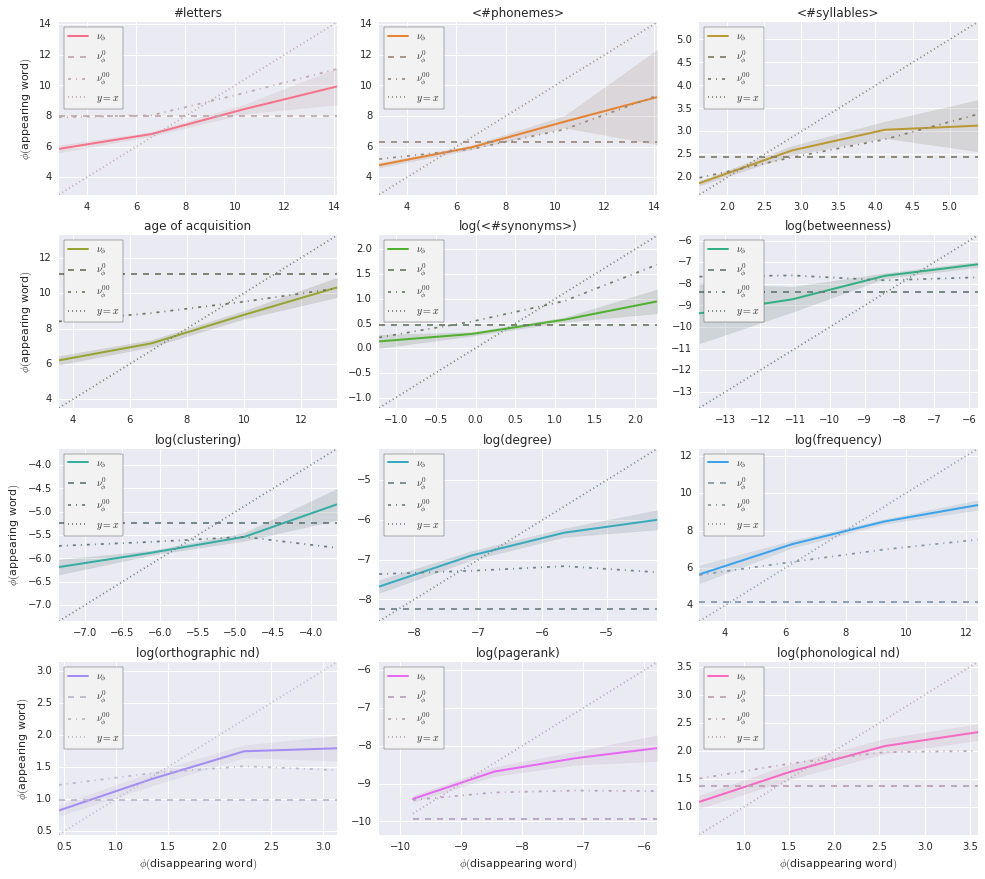

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

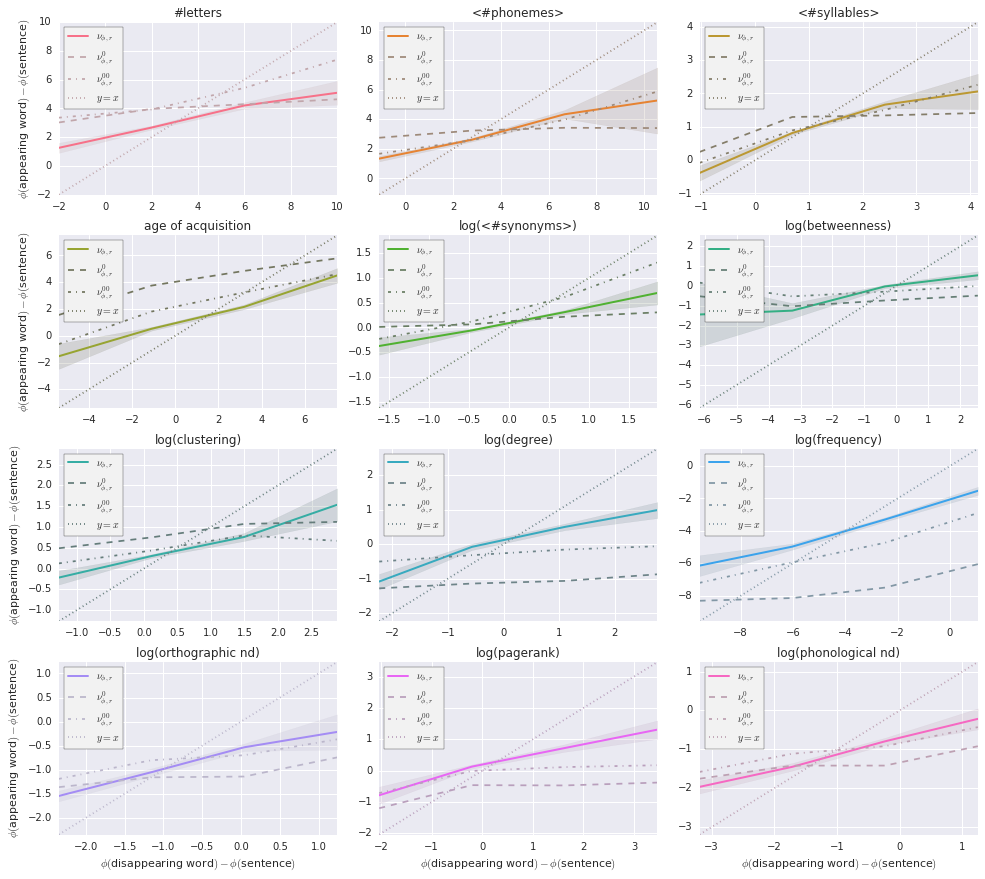

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

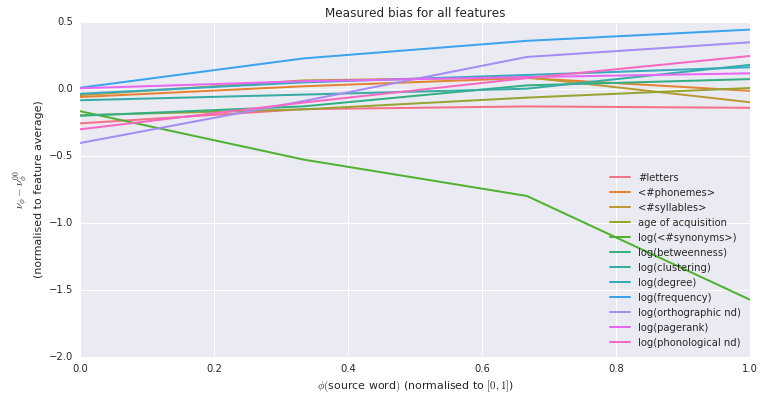

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

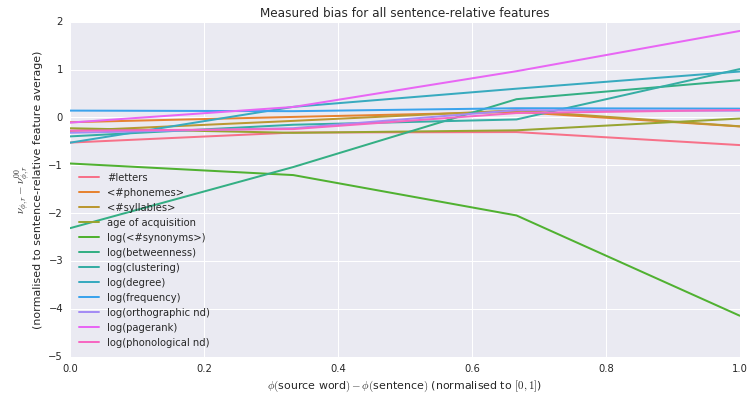

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

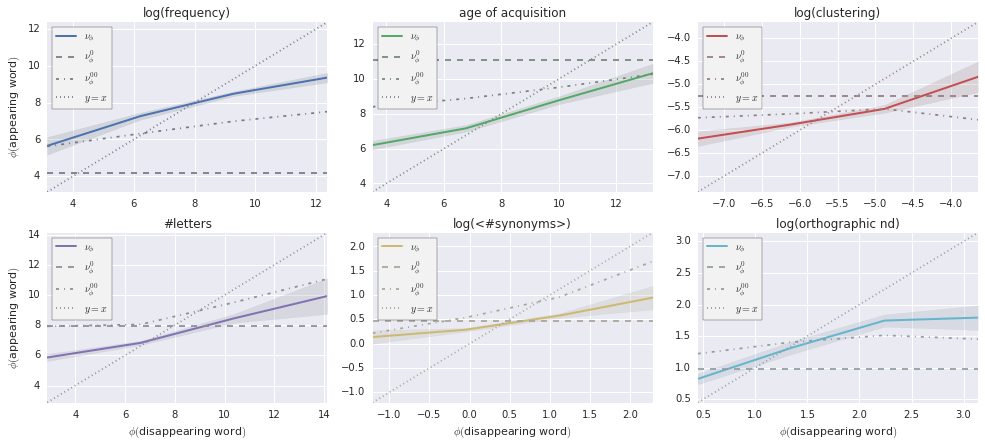

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

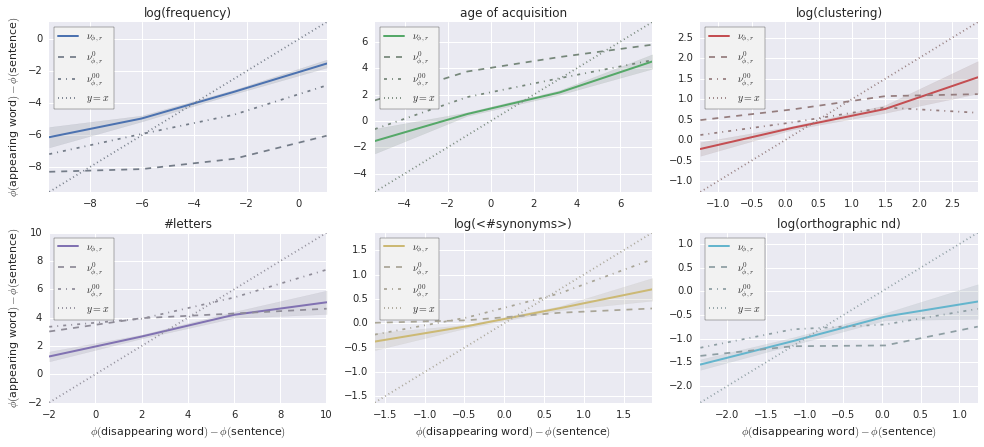

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

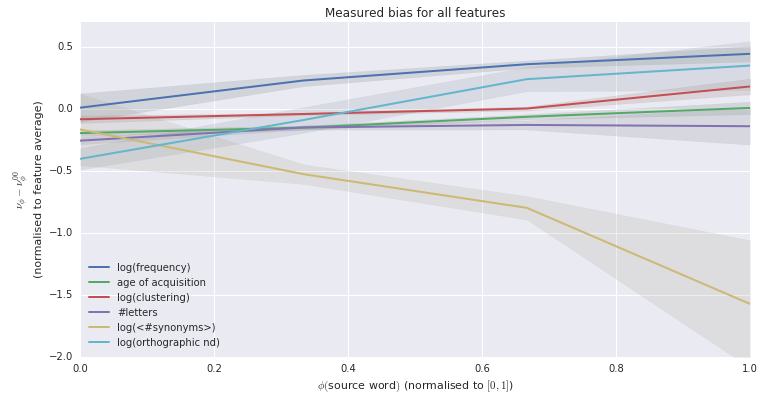

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

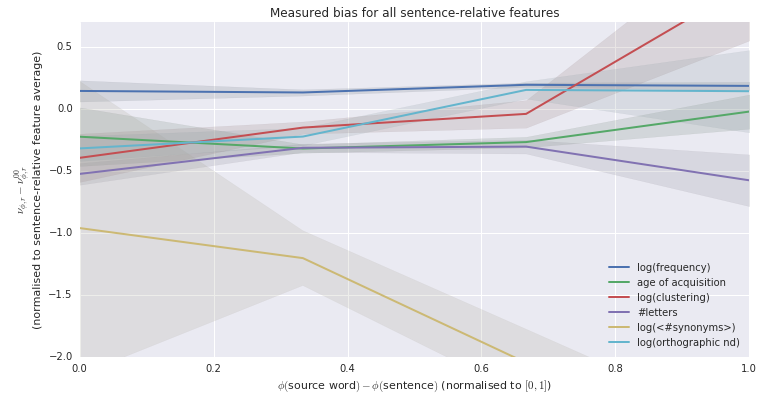

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


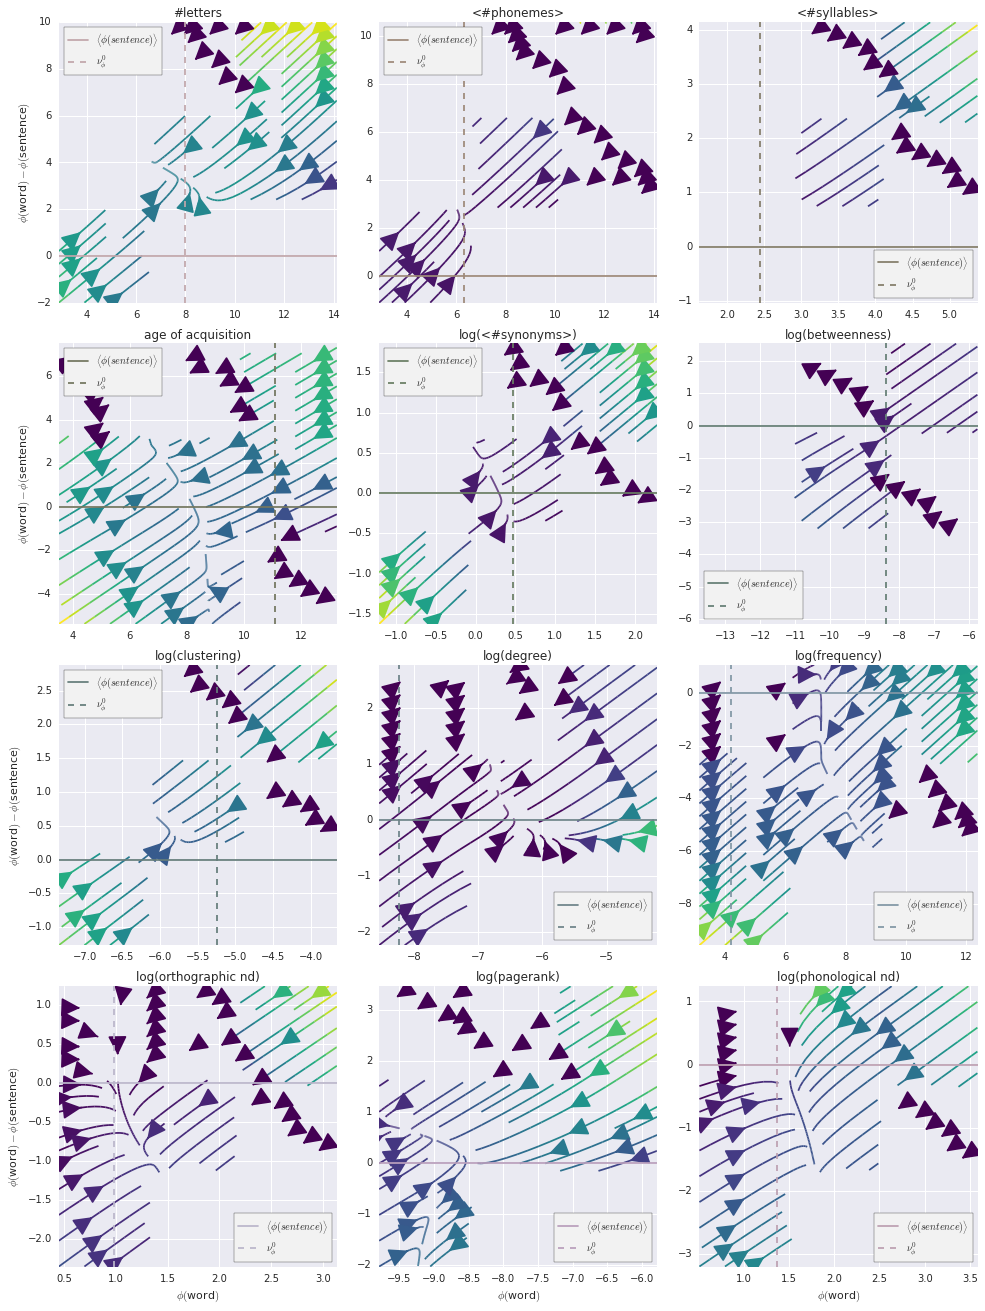

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


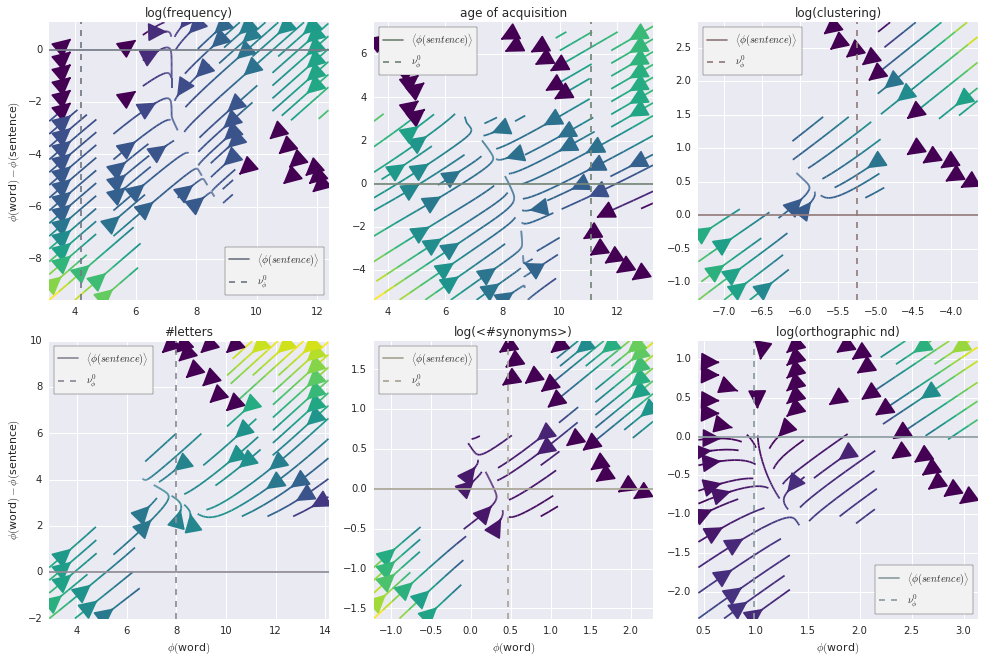

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.51950513  0.16826341  0.09023234  0.07604222  0.03651024  0.02979405
  0.02286237  0.01955091  0.01472483  0.0097574 ]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.475274,0.279314,-0.073600,0.237169,0.225232,-0.434302,0.212419,0.275390,-0.409221,0.281029,-0.166361,-0.002853
Component-1,-0.283358,0.412930,-0.143635,0.297785,0.304490,0.422362,-0.158003,0.290906,0.435593,-0.204134,0.164465,-0.027080
Component-2,0.762911,0.297329,-0.128427,0.080722,0.514473,-0.164728,-0.007867,0.039791,-0.071612,0.076356,-0.020199,-0.041511


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 90911) |          | Elapsed Time: 0:00:45 ETA:  47 days, 17:28:43

  0% (  121 of 90911) |                    | Elapsed Time: 0:00:46 ETA:  0:11:54

  0% (  243 of 90911) |                    | Elapsed Time: 0:00:47 ETA:  0:11:46

  0% (  357 of 90911) |                    | Elapsed Time: 0:00:48 ETA:  0:12:00

  0% (  470 of 90911) |                    | Elapsed Time: 0:00:49 ETA:  0:12:08

  0% (  590 of 90911) |                    | Elapsed Time: 0:00:50 ETA:  0:12:04

  0% (  708 of 90911) |                    | Elapsed Time: 0:00:51 ETA:  0:12:02

  0% (  827 of 90911) |                    | Elapsed Time: 0:00:52 ETA:  0:12:00

  1% (  951 of 90911) |                    | Elapsed Time: 0:00:53 ETA:  0:11:55

  1% ( 1075 of 90911) |                    | Elapsed Time: 0:00:54 ETA:  0:11:50

  1% ( 1137 of 90911) |                    | Elapsed Time: 0:00:54 ETA:  0:11:47

  1% ( 1260 of 90911) |                    | Elapsed Time: 0:00:55 ETA:  0:11:45

  1% ( 1387 of 90911) |                    | Elapsed Time: 0:00:56 ETA:  0:11:34

  1% ( 1517 of 90911) |                    | Elapsed Time: 0:00:57 ETA:  0:11:21

  1% ( 1642 of 90911) |                    | Elapsed Time: 0:00:58 ETA:  0:11:16

  1% ( 1775 of 90911) |                    | Elapsed Time: 0:00:59 ETA:  0:11:05

  2% ( 1920 of 90911) |                    | Elapsed Time: 0:01:00 ETA:  0:10:47

  2% ( 2053 of 90911) |                    | Elapsed Time: 0:01:01 ETA:  0:10:40

  2% ( 2191 of 90911) |                    | Elapsed Time: 0:01:02 ETA:  0:10:30

  2% ( 2273 of 90911) |                    | Elapsed Time: 0:01:03 ETA:  0:10:29

  2% ( 2337 of 90911) |                    | Elapsed Time: 0:01:04 ETA:  0:11:06

  2% ( 2399 of 90911) |                    | Elapsed Time: 0:01:05 ETA:  0:11:53

  2% ( 2460 of 90911) |                    | Elapsed Time: 0:01:06 ETA:  0:12:49

  2% ( 2522 of 90911) |                    | Elapsed Time: 0:01:07 ETA:  0:13:48

  2% ( 2584 of 90911) |                    | Elapsed Time: 0:01:08 ETA:  0:15:06

  2% ( 2653 of 90911) |                    | Elapsed Time: 0:01:09 ETA:  0:16:47

  2% ( 2716 of 90911) |                    | Elapsed Time: 0:01:10 ETA:  0:18:41

  3% ( 2778 of 90911) |                    | Elapsed Time: 0:01:11 ETA:  0:21:14

  3% ( 2841 of 90911) |                    | Elapsed Time: 0:01:12 ETA:  0:22:59

  3% ( 2904 of 90911) |                    | Elapsed Time: 0:01:13 ETA:  0:23:02

  3% ( 2966 of 90911) |                    | Elapsed Time: 0:01:14 ETA:  0:23:00

  3% ( 3036 of 90911) |                    | Elapsed Time: 0:01:15 ETA:  0:22:37

  3% ( 3121 of 90911) |                    | Elapsed Time: 0:01:16 ETA:  0:21:40

  3% ( 3252 of 90911) |                    | Elapsed Time: 0:01:17 ETA:  0:19:17

  3% ( 3410 of 90911) |                    | Elapsed Time: 0:01:18 ETA:  0:16:41

  3% ( 3538 of 90911) |                    | Elapsed Time: 0:01:19 ETA:  0:15:06

  4% ( 3668 of 90911) |                    | Elapsed Time: 0:01:20 ETA:  0:13:44

  4% ( 3797 of 90911) |                    | Elapsed Time: 0:01:21 ETA:  0:12:36

  4% ( 3942 of 90911) |                    | Elapsed Time: 0:01:22 ETA:  0:11:23

  4% ( 4115 of 90911) |                    | Elapsed Time: 0:01:23 ETA:  0:10:08

  4% ( 4281 of 90911) |                    | Elapsed Time: 0:01:24 ETA:  0:09:19

  4% ( 4449 of 90911) |                    | Elapsed Time: 0:01:25 ETA:  0:08:58

  5% ( 4546 of 90911) |#                   | Elapsed Time: 0:01:26 ETA:  0:08:43

  5% ( 4718 of 90911) |#                   | Elapsed Time: 0:01:27 ETA:  0:08:30

  5% ( 4889 of 90911) |#                   | Elapsed Time: 0:01:28 ETA:  0:08:09

  5% ( 5062 of 90911) |#                   | Elapsed Time: 0:01:29 ETA:  0:07:50

  5% ( 5236 of 90911) |#                   | Elapsed Time: 0:01:30 ETA:  0:07:31

  5% ( 5413 of 90911) |#                   | Elapsed Time: 0:01:31 ETA:  0:07:19

  6% ( 5572 of 90911) |#                   | Elapsed Time: 0:01:32 ETA:  0:07:23

  6% ( 5682 of 90911) |#                   | Elapsed Time: 0:01:33 ETA:  0:07:31

  6% ( 5815 of 90911) |#                   | Elapsed Time: 0:01:34 ETA:  0:07:44

  6% ( 5947 of 90911) |#                   | Elapsed Time: 0:01:35 ETA:  0:07:57

  6% ( 6082 of 90911) |#                   | Elapsed Time: 0:01:36 ETA:  0:08:12

  6% ( 6216 of 90911) |#                   | Elapsed Time: 0:01:37 ETA:  0:08:28

  6% ( 6353 of 90911) |#                   | Elapsed Time: 0:01:38 ETA:  0:08:44

  7% ( 6486 of 90911) |#                   | Elapsed Time: 0:01:39 ETA:  0:09:03

  7% ( 6620 of 90911) |#                   | Elapsed Time: 0:01:40 ETA:  0:09:25

  7% ( 6744 of 90911) |#                   | Elapsed Time: 0:01:41 ETA:  0:09:44

  7% ( 6819 of 90911) |#                   | Elapsed Time: 0:01:42 ETA:  0:10:00

  7% ( 6917 of 90911) |#                   | Elapsed Time: 0:01:43 ETA:  0:10:22

  7% ( 6998 of 90911) |#                   | Elapsed Time: 0:01:44 ETA:  0:10:57

  7% ( 7050 of 90911) |#                   | Elapsed Time: 0:01:45 ETA:  0:12:02

  7% ( 7205 of 90911) |#                   | Elapsed Time: 0:01:46 ETA:  0:11:43

  8% ( 7333 of 90911) |#                   | Elapsed Time: 0:01:47 ETA:  0:11:50

  8% ( 7462 of 90911) |#                   | Elapsed Time: 0:01:48 ETA:  0:11:52

  8% ( 7592 of 90911) |#                   | Elapsed Time: 0:01:49 ETA:  0:11:55

  8% ( 7645 of 90911) |#                   | Elapsed Time: 0:01:50 ETA:  0:13:00

  8% ( 7766 of 90911) |#                   | Elapsed Time: 0:01:51 ETA:  0:12:38

  8% ( 7833 of 90911) |#                   | Elapsed Time: 0:01:52 ETA:  0:13:07

  8% ( 7896 of 90911) |#                   | Elapsed Time: 0:01:53 ETA:  0:13:24

  8% ( 7955 of 90911) |#                   | Elapsed Time: 0:01:54 ETA:  0:13:04

  8% ( 8023 of 90911) |#                   | Elapsed Time: 0:01:55 ETA:  0:14:39

  8% ( 8084 of 90911) |#                   | Elapsed Time: 0:01:56 ETA:  0:16:08

  8% ( 8180 of 90911) |#                   | Elapsed Time: 0:01:57 ETA:  0:16:58

  9% ( 8351 of 90911) |#                   | Elapsed Time: 0:01:58 ETA:  0:15:55

  9% ( 8499 of 90911) |#                   | Elapsed Time: 0:01:59 ETA:  0:13:54

  9% ( 8627 of 90911) |#                   | Elapsed Time: 0:02:00 ETA:  0:13:45

  9% ( 8719 of 90911) |#                   | Elapsed Time: 0:02:01 ETA:  0:13:17

  9% ( 8813 of 90911) |#                   | Elapsed Time: 0:02:02 ETA:  0:12:46

  9% ( 8905 of 90911) |#                   | Elapsed Time: 0:02:03 ETA:  0:12:23

  9% ( 8999 of 90911) |#                   | Elapsed Time: 0:02:04 ETA:  0:11:59

 10% ( 9092 of 90911) |##                  | Elapsed Time: 0:02:05 ETA:  0:11:30

 10% ( 9241 of 90911) |##                  | Elapsed Time: 0:02:06 ETA:  0:10:48

 10% ( 9387 of 90911) |##                  | Elapsed Time: 0:02:07 ETA:  0:11:05

 10% ( 9533 of 90911) |##                  | Elapsed Time: 0:02:08 ETA:  0:11:05

 10% ( 9674 of 90911) |##                  | Elapsed Time: 0:02:09 ETA:  0:10:54

 10% ( 9815 of 90911) |##                  | Elapsed Time: 0:02:10 ETA:  0:10:18

 10% ( 9934 of 90911) |##                  | Elapsed Time: 0:02:11 ETA:  0:10:00

 11% (10027 of 90911) |##                  | Elapsed Time: 0:02:12 ETA:  0:09:59

 11% (10132 of 90911) |##                  | Elapsed Time: 0:02:13 ETA:  0:09:51

 11% (10228 of 90911) |##                  | Elapsed Time: 0:02:14 ETA:  0:09:45

 11% (10331 of 90911) |##                  | Elapsed Time: 0:02:15 ETA:  0:10:14

 11% (10432 of 90911) |##                  | Elapsed Time: 0:02:16 ETA:  0:10:46

 11% (10534 of 90911) |##                  | Elapsed Time: 0:02:17 ETA:  0:11:19

 11% (10644 of 90911) |##                  | Elapsed Time: 0:02:18 ETA:  0:11:44

 11% (10748 of 90911) |##                  | Elapsed Time: 0:02:19 ETA:  0:12:16

 11% (10858 of 90911) |##                  | Elapsed Time: 0:02:20 ETA:  0:12:24

 12% (10967 of 90911) |##                  | Elapsed Time: 0:02:21 ETA:  0:12:09

 12% (11074 of 90911) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:05

 12% (11181 of 90911) |##                  | Elapsed Time: 0:02:23 ETA:  0:11:58

 12% (11289 of 90911) |##                  | Elapsed Time: 0:02:24 ETA:  0:11:53

 12% (11364 of 90911) |##                  | Elapsed Time: 0:02:24 ETA:  0:11:44

 12% (11471 of 90911) |##                  | Elapsed Time: 0:02:25 ETA:  0:11:39

 12% (11578 of 90911) |##                  | Elapsed Time: 0:02:26 ETA:  0:11:41

 12% (11685 of 90911) |##                  | Elapsed Time: 0:02:27 ETA:  0:11:38

 12% (11792 of 90911) |##                  | Elapsed Time: 0:02:28 ETA:  0:11:39

 13% (11899 of 90911) |##                  | Elapsed Time: 0:02:29 ETA:  0:11:40

 13% (12007 of 90911) |##                  | Elapsed Time: 0:02:30 ETA:  0:11:38

 13% (12115 of 90911) |##                  | Elapsed Time: 0:02:31 ETA:  0:11:35

 13% (12243 of 90911) |##                  | Elapsed Time: 0:02:32 ETA:  0:11:16

 13% (12366 of 90911) |##                  | Elapsed Time: 0:02:33 ETA:  0:11:06

 13% (12501 of 90911) |##                  | Elapsed Time: 0:02:34 ETA:  0:10:45

 13% (12630 of 90911) |##                  | Elapsed Time: 0:02:35 ETA:  0:10:25

 14% (12758 of 90911) |##                  | Elapsed Time: 0:02:36 ETA:  0:10:07

 14% (12901 of 90911) |##                  | Elapsed Time: 0:02:37 ETA:  0:09:38

 14% (13031 of 90911) |##                  | Elapsed Time: 0:02:38 ETA:  0:09:22

 14% (13157 of 90911) |##                  | Elapsed Time: 0:02:39 ETA:  0:09:09

 14% (13276 of 90911) |##                  | Elapsed Time: 0:02:40 ETA:  0:09:14

 14% (13407 of 90911) |##                  | Elapsed Time: 0:02:41 ETA:  0:09:07

 14% (13552 of 90911) |##                  | Elapsed Time: 0:02:42 ETA:  0:08:51

 15% (13637 of 90911) |###                 | Elapsed Time: 0:02:43 ETA:  0:08:46

 15% (13781 of 90911) |###                 | Elapsed Time: 0:02:44 ETA:  0:08:36

 15% (13928 of 90911) |###                 | Elapsed Time: 0:02:45 ETA:  0:08:24

 15% (14081 of 90911) |###                 | Elapsed Time: 0:02:46 ETA:  0:08:17

 15% (14233 of 90911) |###                 | Elapsed Time: 0:02:47 ETA:  0:08:03

 15% (14385 of 90911) |###                 | Elapsed Time: 0:02:48 ETA:  0:07:48

 15% (14538 of 90911) |###                 | Elapsed Time: 0:02:49 ETA:  0:07:30

 16% (14670 of 90911) |###                 | Elapsed Time: 0:02:50 ETA:  0:07:29

 16% (14774 of 90911) |###                 | Elapsed Time: 0:02:51 ETA:  0:07:37

 16% (14897 of 90911) |###                 | Elapsed Time: 0:02:52 ETA:  0:07:47

 16% (15018 of 90911) |###                 | Elapsed Time: 0:02:53 ETA:  0:07:59

 16% (15141 of 90911) |###                 | Elapsed Time: 0:02:54 ETA:  0:08:11

 16% (15263 of 90911) |###                 | Elapsed Time: 0:02:55 ETA:  0:08:28

 16% (15366 of 90911) |###                 | Elapsed Time: 0:02:56 ETA:  0:08:56

 17% (15467 of 90911) |###                 | Elapsed Time: 0:02:57 ETA:  0:09:29

 17% (15569 of 90911) |###                 | Elapsed Time: 0:02:58 ETA:  0:10:05

 17% (15677 of 90911) |###                 | Elapsed Time: 0:02:59 ETA:  0:10:23

 17% (15783 of 90911) |###                 | Elapsed Time: 0:03:00 ETA:  0:10:35

 17% (15886 of 90911) |###                 | Elapsed Time: 0:03:01 ETA:  0:10:50

 17% (15910 of 90911) |###                 | Elapsed Time: 0:03:01 ETA:  0:11:01

 17% (16015 of 90911) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:17

 17% (16130 of 90911) |###                 | Elapsed Time: 0:03:03 ETA:  0:11:22

 17% (16245 of 90911) |###                 | Elapsed Time: 0:03:04 ETA:  0:11:10

 17% (16352 of 90911) |###                 | Elapsed Time: 0:03:05 ETA:  0:11:03

 18% (16449 of 90911) |###                 | Elapsed Time: 0:03:06 ETA:  0:11:06

 18% (16570 of 90911) |###                 | Elapsed Time: 0:03:07 ETA:  0:10:53

 18% (16693 of 90911) |###                 | Elapsed Time: 0:03:08 ETA:  0:10:35

 18% (16807 of 90911) |###                 | Elapsed Time: 0:03:09 ETA:  0:10:24

 18% (16932 of 90911) |###                 | Elapsed Time: 0:03:10 ETA:  0:10:12

 18% (17046 of 90911) |###                 | Elapsed Time: 0:03:11 ETA:  0:09:57

 18% (17170 of 90911) |###                 | Elapsed Time: 0:03:12 ETA:  0:09:49

 19% (17285 of 90911) |###                 | Elapsed Time: 0:03:13 ETA:  0:09:48

 19% (17414 of 90911) |###                 | Elapsed Time: 0:03:14 ETA:  0:09:32

 19% (17539 of 90911) |###                 | Elapsed Time: 0:03:15 ETA:  0:09:11

 19% (17664 of 90911) |###                 | Elapsed Time: 0:03:16 ETA:  0:09:08

 19% (17784 of 90911) |###                 | Elapsed Time: 0:03:17 ETA:  0:09:09

 19% (17878 of 90911) |###                 | Elapsed Time: 0:03:18 ETA:  0:09:24

 19% (17968 of 90911) |###                 | Elapsed Time: 0:03:19 ETA:  0:09:48

 19% (18075 of 90911) |###                 | Elapsed Time: 0:03:20 ETA:  0:10:00

 19% (18165 of 90911) |###                 | Elapsed Time: 0:03:21 ETA:  0:10:26

 20% (18183 of 90911) |####                | Elapsed Time: 0:03:22 ETA:  0:10:41

 20% (18245 of 90911) |####                | Elapsed Time: 0:03:23 ETA:  0:11:49

 20% (18312 of 90911) |####                | Elapsed Time: 0:03:24 ETA:  0:12:57

 20% (18404 of 90911) |####                | Elapsed Time: 0:03:25 ETA:  0:13:40

 20% (18521 of 90911) |####                | Elapsed Time: 0:03:26 ETA:  0:13:42

 20% (18636 of 90911) |####                | Elapsed Time: 0:03:27 ETA:  0:13:11

 20% (18754 of 90911) |####                | Elapsed Time: 0:03:28 ETA:  0:12:34

 20% (18871 of 90911) |####                | Elapsed Time: 0:03:29 ETA:  0:12:20

 20% (18989 of 90911) |####                | Elapsed Time: 0:03:30 ETA:  0:11:48

 20% (19081 of 90911) |####                | Elapsed Time: 0:03:31 ETA:  0:11:46

 21% (19215 of 90911) |####                | Elapsed Time: 0:03:32 ETA:  0:10:36

 21% (19319 of 90911) |####                | Elapsed Time: 0:03:32 ETA:  0:09:35

 21% (19467 of 90911) |####                | Elapsed Time: 0:03:33 ETA:  0:08:52

 21% (19613 of 90911) |####                | Elapsed Time: 0:03:34 ETA:  0:08:31

 21% (19758 of 90911) |####                | Elapsed Time: 0:03:35 ETA:  0:08:11

 21% (19925 of 90911) |####                | Elapsed Time: 0:03:36 ETA:  0:07:41

 22% (20091 of 90911) |####                | Elapsed Time: 0:03:37 ETA:  0:07:13

 22% (20251 of 90911) |####                | Elapsed Time: 0:03:38 ETA:  0:06:50

 22% (20345 of 90911) |####                | Elapsed Time: 0:03:39 ETA:  0:06:47

 22% (20455 of 90911) |####                | Elapsed Time: 0:03:40 ETA:  0:07:17

 22% (20547 of 90911) |####                | Elapsed Time: 0:03:42 ETA:  0:07:51

 22% (20642 of 90911) |####                | Elapsed Time: 0:03:43 ETA:  0:08:24

 22% (20794 of 90911) |####                | Elapsed Time: 0:03:44 ETA:  0:08:18

 23% (20932 of 90911) |####                | Elapsed Time: 0:03:45 ETA:  0:08:37

 23% (21081 of 90911) |####                | Elapsed Time: 0:03:46 ETA:  0:08:49

 23% (21226 of 90911) |####                | Elapsed Time: 0:03:47 ETA:  0:08:59

 23% (21356 of 90911) |####                | Elapsed Time: 0:03:48 ETA:  0:08:30

 23% (21495 of 90911) |####                | Elapsed Time: 0:03:49 ETA:  0:07:57

 23% (21592 of 90911) |####                | Elapsed Time: 0:03:49 ETA:  0:07:51

 23% (21733 of 90911) |####                | Elapsed Time: 0:03:50 ETA:  0:07:21

 24% (21874 of 90911) |####                | Elapsed Time: 0:03:51 ETA:  0:06:55

 24% (22010 of 90911) |####                | Elapsed Time: 0:03:52 ETA:  0:07:02

 24% (22129 of 90911) |####                | Elapsed Time: 0:03:53 ETA:  0:07:11

 24% (22234 of 90911) |####                | Elapsed Time: 0:03:54 ETA:  0:07:36

 24% (22339 of 90911) |####                | Elapsed Time: 0:03:55 ETA:  0:08:00

 24% (22450 of 90911) |####                | Elapsed Time: 0:03:56 ETA:  0:08:12

 24% (22609 of 90911) |####                | Elapsed Time: 0:03:57 ETA:  0:07:58

 25% (22728 of 90911) |#####               | Elapsed Time: 0:03:58 ETA:  0:07:47

 25% (22873 of 90911) |#####               | Elapsed Time: 0:03:59 ETA:  0:07:43

 25% (23031 of 90911) |#####               | Elapsed Time: 0:04:00 ETA:  0:07:31

 25% (23175 of 90911) |#####               | Elapsed Time: 0:04:01 ETA:  0:07:26

 25% (23277 of 90911) |#####               | Elapsed Time: 0:04:02 ETA:  0:07:36

 25% (23391 of 90911) |#####               | Elapsed Time: 0:04:03 ETA:  0:07:29

 25% (23500 of 90911) |#####               | Elapsed Time: 0:04:04 ETA:  0:07:27

 25% (23618 of 90911) |#####               | Elapsed Time: 0:04:05 ETA:  0:07:22

 26% (23735 of 90911) |#####               | Elapsed Time: 0:04:06 ETA:  0:07:46

 26% (23865 of 90911) |#####               | Elapsed Time: 0:04:07 ETA:  0:07:56

 26% (24034 of 90911) |#####               | Elapsed Time: 0:04:08 ETA:  0:07:40

 26% (24161 of 90911) |#####               | Elapsed Time: 0:04:09 ETA:  0:07:59

 26% (24287 of 90911) |#####               | Elapsed Time: 0:04:10 ETA:  0:08:09

 26% (24410 of 90911) |#####               | Elapsed Time: 0:04:11 ETA:  0:07:54

 26% (24536 of 90911) |#####               | Elapsed Time: 0:04:12 ETA:  0:07:45

 27% (24678 of 90911) |#####               | Elapsed Time: 0:04:13 ETA:  0:07:23

 27% (24831 of 90911) |#####               | Elapsed Time: 0:04:14 ETA:  0:07:02

 27% (24961 of 90911) |#####               | Elapsed Time: 0:04:15 ETA:  0:06:54

 27% (25001 of 90911) |#####               | Elapsed Time: 0:04:16 ETA:  0:07:00

 27% (25167 of 90911) |#####               | Elapsed Time: 0:04:17 ETA:  0:07:01

 27% (25332 of 90911) |#####               | Elapsed Time: 0:04:18 ETA:  0:06:38

 28% (25488 of 90911) |#####               | Elapsed Time: 0:04:19 ETA:  0:06:20

 28% (25624 of 90911) |#####               | Elapsed Time: 0:04:20 ETA:  0:06:12

 28% (25791 of 90911) |#####               | Elapsed Time: 0:04:21 ETA:  0:05:51

 28% (25954 of 90911) |#####               | Elapsed Time: 0:04:22 ETA:  0:05:40

 28% (26137 of 90911) |#####               | Elapsed Time: 0:04:23 ETA:  0:05:21

 28% (26300 of 90911) |#####               | Elapsed Time: 0:04:24 ETA:  0:05:06

 29% (26448 of 90911) |#####               | Elapsed Time: 0:04:25 ETA:  0:05:13

 29% (26576 of 90911) |#####               | Elapsed Time: 0:04:26 ETA:  0:05:29

 29% (26732 of 90911) |#####               | Elapsed Time: 0:04:27 ETA:  0:05:28

 29% (26897 of 90911) |#####               | Elapsed Time: 0:04:28 ETA:  0:05:13

 29% (27018 of 90911) |#####               | Elapsed Time: 0:04:29 ETA:  0:05:34

 29% (27137 of 90911) |#####               | Elapsed Time: 0:04:30 ETA:  0:05:55

 30% (27274 of 90911) |######              | Elapsed Time: 0:04:31 ETA:  0:06:14

 30% (27429 of 90911) |######              | Elapsed Time: 0:04:32 ETA:  0:06:17

 30% (27573 of 90911) |######              | Elapsed Time: 0:04:33 ETA:  0:06:19

 30% (27716 of 90911) |######              | Elapsed Time: 0:04:34 ETA:  0:06:09

 30% (27874 of 90911) |######              | Elapsed Time: 0:04:35 ETA:  0:06:07

 30% (28006 of 90911) |######              | Elapsed Time: 0:04:36 ETA:  0:06:26

 30% (28139 of 90911) |######              | Elapsed Time: 0:04:37 ETA:  0:06:18

 31% (28244 of 90911) |######              | Elapsed Time: 0:04:38 ETA:  0:06:25

 31% (28410 of 90911) |######              | Elapsed Time: 0:04:39 ETA:  0:06:16

 31% (28581 of 90911) |######              | Elapsed Time: 0:04:40 ETA:  0:06:05

 31% (28753 of 90911) |######              | Elapsed Time: 0:04:41 ETA:  0:05:49

 31% (28914 of 90911) |######              | Elapsed Time: 0:04:42 ETA:  0:05:38

 31% (29079 of 90911) |######              | Elapsed Time: 0:04:43 ETA:  0:05:34

 32% (29232 of 90911) |######              | Elapsed Time: 0:04:44 ETA:  0:05:22

 32% (29361 of 90911) |######              | Elapsed Time: 0:04:45 ETA:  0:05:22

 32% (29477 of 90911) |######              | Elapsed Time: 0:04:46 ETA:  0:05:16

 32% (29547 of 90911) |######              | Elapsed Time: 0:04:47 ETA:  0:05:31

 32% (29622 of 90911) |######              | Elapsed Time: 0:04:48 ETA:  0:06:09

 32% (29713 of 90911) |######              | Elapsed Time: 0:04:49 ETA:  0:06:54

 32% (29834 of 90911) |######              | Elapsed Time: 0:04:50 ETA:  0:07:28

 32% (29954 of 90911) |######              | Elapsed Time: 0:04:51 ETA:  0:07:56

 33% (30050 of 90911) |######              | Elapsed Time: 0:04:52 ETA:  0:08:49

 33% (30148 of 90911) |######              | Elapsed Time: 0:04:53 ETA:  0:09:38

 33% (30265 of 90911) |######              | Elapsed Time: 0:04:54 ETA:  0:09:49

 33% (30390 of 90911) |######              | Elapsed Time: 0:04:55 ETA:  0:09:40

 33% (30512 of 90911) |######              | Elapsed Time: 0:04:56 ETA:  0:09:16

 33% (30630 of 90911) |######              | Elapsed Time: 0:04:57 ETA:  0:08:38

 33% (30683 of 90911) |######              | Elapsed Time: 0:04:57 ETA:  0:08:08

 33% (30833 of 90911) |######              | Elapsed Time: 0:04:58 ETA:  0:07:44

 34% (30984 of 90911) |######              | Elapsed Time: 0:04:59 ETA:  0:07:20

 34% (31135 of 90911) |######              | Elapsed Time: 0:05:00 ETA:  0:06:42

 34% (31255 of 90911) |######              | Elapsed Time: 0:05:01 ETA:  0:06:27

 34% (31356 of 90911) |######              | Elapsed Time: 0:05:02 ETA:  0:06:35

 34% (31471 of 90911) |######              | Elapsed Time: 0:05:03 ETA:  0:06:40

 34% (31627 of 90911) |######              | Elapsed Time: 0:05:04 ETA:  0:06:17

 34% (31786 of 90911) |######              | Elapsed Time: 0:05:05 ETA:  0:05:56

 35% (31819 of 90911) |#######             | Elapsed Time: 0:05:06 ETA:  0:06:16

 35% (31920 of 90911) |#######             | Elapsed Time: 0:05:07 ETA:  0:06:46

 35% (32041 of 90911) |#######             | Elapsed Time: 0:05:08 ETA:  0:07:06

 35% (32099 of 90911) |#######             | Elapsed Time: 0:05:09 ETA:  0:08:17

 35% (32192 of 90911) |#######             | Elapsed Time: 0:05:10 ETA:  0:08:39

 35% (32338 of 90911) |#######             | Elapsed Time: 0:05:11 ETA:  0:08:01

 35% (32480 of 90911) |#######             | Elapsed Time: 0:05:12 ETA:  0:07:39

 35% (32581 of 90911) |#######             | Elapsed Time: 0:05:13 ETA:  0:08:23

 35% (32689 of 90911) |#######             | Elapsed Time: 0:05:14 ETA:  0:09:04

 36% (32796 of 90911) |#######             | Elapsed Time: 0:05:15 ETA:  0:08:49

 36% (32956 of 90911) |#######             | Elapsed Time: 0:05:16 ETA:  0:08:19

 36% (33105 of 90911) |#######             | Elapsed Time: 0:05:17 ETA:  0:07:03

 36% (33224 of 90911) |#######             | Elapsed Time: 0:05:18 ETA:  0:06:43

 36% (33376 of 90911) |#######             | Elapsed Time: 0:05:19 ETA:  0:06:38

 36% (33526 of 90911) |#######             | Elapsed Time: 0:05:20 ETA:  0:06:31

 37% (33649 of 90911) |#######             | Elapsed Time: 0:05:21 ETA:  0:06:15

 37% (33790 of 90911) |#######             | Elapsed Time: 0:05:22 ETA:  0:05:54

 37% (33903 of 90911) |#######             | Elapsed Time: 0:05:23 ETA:  0:05:49

 37% (34014 of 90911) |#######             | Elapsed Time: 0:05:24 ETA:  0:06:04

 37% (34092 of 90911) |#######             | Elapsed Time: 0:05:25 ETA:  0:06:15

 37% (34202 of 90911) |#######             | Elapsed Time: 0:05:26 ETA:  0:06:39

 37% (34314 of 90911) |#######             | Elapsed Time: 0:05:27 ETA:  0:06:43

 37% (34449 of 90911) |#######             | Elapsed Time: 0:05:28 ETA:  0:06:53

 38% (34575 of 90911) |#######             | Elapsed Time: 0:05:29 ETA:  0:07:09

 38% (34711 of 90911) |#######             | Elapsed Time: 0:05:30 ETA:  0:06:58

 38% (34839 of 90911) |#######             | Elapsed Time: 0:05:31 ETA:  0:07:06

 38% (34961 of 90911) |#######             | Elapsed Time: 0:05:32 ETA:  0:06:58

 38% (35129 of 90911) |#######             | Elapsed Time: 0:05:33 ETA:  0:06:19

 38% (35229 of 90911) |#######             | Elapsed Time: 0:05:33 ETA:  0:06:07

 38% (35309 of 90911) |#######             | Elapsed Time: 0:05:34 ETA:  0:06:25

 38% (35416 of 90911) |#######             | Elapsed Time: 0:05:35 ETA:  0:06:27

 39% (35547 of 90911) |#######             | Elapsed Time: 0:05:36 ETA:  0:06:29

 39% (35645 of 90911) |#######             | Elapsed Time: 0:05:37 ETA:  0:06:47

 39% (35751 of 90911) |#######             | Elapsed Time: 0:05:38 ETA:  0:07:08

 39% (35889 of 90911) |#######             | Elapsed Time: 0:05:39 ETA:  0:07:00

 39% (36041 of 90911) |#######             | Elapsed Time: 0:05:40 ETA:  0:06:38

 39% (36184 of 90911) |#######             | Elapsed Time: 0:05:42 ETA:  0:06:55

 39% (36323 of 90911) |#######             | Elapsed Time: 0:05:43 ETA:  0:06:48

 40% (36365 of 90911) |########            | Elapsed Time: 0:05:43 ETA:  0:06:15

 40% (36501 of 90911) |########            | Elapsed Time: 0:05:44 ETA:  0:05:55

 40% (36638 of 90911) |########            | Elapsed Time: 0:05:45 ETA:  0:05:50

 40% (36787 of 90911) |########            | Elapsed Time: 0:05:46 ETA:  0:05:17

 40% (36902 of 90911) |########            | Elapsed Time: 0:05:47 ETA:  0:05:12

 40% (37026 of 90911) |########            | Elapsed Time: 0:05:48 ETA:  0:05:19

 40% (37175 of 90911) |########            | Elapsed Time: 0:05:49 ETA:  0:05:19

 41% (37293 of 90911) |########            | Elapsed Time: 0:05:50 ETA:  0:05:33

 41% (37421 of 90911) |########            | Elapsed Time: 0:05:51 ETA:  0:05:39

 41% (37501 of 90911) |########            | Elapsed Time: 0:05:52 ETA:  0:05:50

 41% (37623 of 90911) |########            | Elapsed Time: 0:05:53 ETA:  0:05:57

 41% (37745 of 90911) |########            | Elapsed Time: 0:05:54 ETA:  0:06:06

 41% (37874 of 90911) |########            | Elapsed Time: 0:05:55 ETA:  0:06:18

 41% (38019 of 90911) |########            | Elapsed Time: 0:05:56 ETA:  0:05:57

 41% (38156 of 90911) |########            | Elapsed Time: 0:05:57 ETA:  0:05:48

 42% (38291 of 90911) |########            | Elapsed Time: 0:05:58 ETA:  0:05:56

 42% (38434 of 90911) |########            | Elapsed Time: 0:05:59 ETA:  0:05:39

 42% (38567 of 90911) |########            | Elapsed Time: 0:06:00 ETA:  0:05:35

 42% (38638 of 90911) |########            | Elapsed Time: 0:06:00 ETA:  0:05:29

 42% (38757 of 90911) |########            | Elapsed Time: 0:06:01 ETA:  0:05:30

 42% (38876 of 90911) |########            | Elapsed Time: 0:06:02 ETA:  0:05:31

 42% (38991 of 90911) |########            | Elapsed Time: 0:06:03 ETA:  0:05:39

 43% (39127 of 90911) |########            | Elapsed Time: 0:06:04 ETA:  0:05:43

 43% (39261 of 90911) |########            | Elapsed Time: 0:06:05 ETA:  0:05:45

 43% (39404 of 90911) |########            | Elapsed Time: 0:06:06 ETA:  0:05:38

 43% (39526 of 90911) |########            | Elapsed Time: 0:06:07 ETA:  0:05:51

 43% (39623 of 90911) |########            | Elapsed Time: 0:06:08 ETA:  0:06:14

 43% (39722 of 90911) |########            | Elapsed Time: 0:06:09 ETA:  0:06:28

 43% (39774 of 90911) |########            | Elapsed Time: 0:06:10 ETA:  0:06:28

 43% (39926 of 90911) |########            | Elapsed Time: 0:06:11 ETA:  0:06:03

 44% (40049 of 90911) |########            | Elapsed Time: 0:06:12 ETA:  0:05:56

 44% (40152 of 90911) |########            | Elapsed Time: 0:06:13 ETA:  0:06:19

 44% (40231 of 90911) |########            | Elapsed Time: 0:06:14 ETA:  0:07:01

 44% (40356 of 90911) |########            | Elapsed Time: 0:06:15 ETA:  0:07:15

 44% (40476 of 90911) |########            | Elapsed Time: 0:06:16 ETA:  0:07:16

 44% (40601 of 90911) |########            | Elapsed Time: 0:06:17 ETA:  0:06:52

 44% (40722 of 90911) |########            | Elapsed Time: 0:06:18 ETA:  0:06:33

 44% (40846 of 90911) |########            | Elapsed Time: 0:06:19 ETA:  0:06:27

 45% (40910 of 90911) |#########           | Elapsed Time: 0:06:19 ETA:  0:06:54

 45% (41057 of 90911) |#########           | Elapsed Time: 0:06:20 ETA:  0:06:34

 45% (41175 of 90911) |#########           | Elapsed Time: 0:06:21 ETA:  0:06:22

 45% (41268 of 90911) |#########           | Elapsed Time: 0:06:22 ETA:  0:06:10

 45% (41394 of 90911) |#########           | Elapsed Time: 0:06:23 ETA:  0:06:08

 45% (41494 of 90911) |#########           | Elapsed Time: 0:06:24 ETA:  0:06:22

 45% (41604 of 90911) |#########           | Elapsed Time: 0:06:25 ETA:  0:06:32

 45% (41739 of 90911) |#########           | Elapsed Time: 0:06:26 ETA:  0:06:21

 46% (41863 of 90911) |#########           | Elapsed Time: 0:06:27 ETA:  0:06:20

 46% (41991 of 90911) |#########           | Elapsed Time: 0:06:28 ETA:  0:06:11

 46% (42047 of 90911) |#########           | Elapsed Time: 0:06:29 ETA:  0:06:32

 46% (42136 of 90911) |#########           | Elapsed Time: 0:06:30 ETA:  0:06:54

 46% (42257 of 90911) |#########           | Elapsed Time: 0:06:31 ETA:  0:06:30

 46% (42375 of 90911) |#########           | Elapsed Time: 0:06:32 ETA:  0:06:36

 46% (42500 of 90911) |#########           | Elapsed Time: 0:06:33 ETA:  0:06:15

 46% (42629 of 90911) |#########           | Elapsed Time: 0:06:34 ETA:  0:06:00

 47% (42761 of 90911) |#########           | Elapsed Time: 0:06:35 ETA:  0:06:01

 47% (42908 of 90911) |#########           | Elapsed Time: 0:06:36 ETA:  0:05:43

 47% (43038 of 90911) |#########           | Elapsed Time: 0:06:37 ETA:  0:05:41

 47% (43147 of 90911) |#########           | Elapsed Time: 0:06:38 ETA:  0:05:48

 47% (43183 of 90911) |#########           | Elapsed Time: 0:06:38 ETA:  0:05:26

 47% (43289 of 90911) |#########           | Elapsed Time: 0:06:39 ETA:  0:05:36

 47% (43391 of 90911) |#########           | Elapsed Time: 0:06:40 ETA:  0:05:47

 47% (43484 of 90911) |#########           | Elapsed Time: 0:06:41 ETA:  0:06:12

 48% (43643 of 90911) |#########           | Elapsed Time: 0:06:42 ETA:  0:05:48

 48% (43761 of 90911) |#########           | Elapsed Time: 0:06:43 ETA:  0:05:57

 48% (43879 of 90911) |#########           | Elapsed Time: 0:06:44 ETA:  0:06:19

 48% (43996 of 90911) |#########           | Elapsed Time: 0:06:45 ETA:  0:06:29

 48% (44116 of 90911) |#########           | Elapsed Time: 0:06:46 ETA:  0:06:19

 48% (44249 of 90911) |#########           | Elapsed Time: 0:06:47 ETA:  0:06:05

 48% (44320 of 90911) |#########           | Elapsed Time: 0:06:48 ETA:  0:05:48

 48% (44453 of 90911) |#########           | Elapsed Time: 0:06:49 ETA:  0:05:24

 49% (44590 of 90911) |#########           | Elapsed Time: 0:06:50 ETA:  0:04:53

 49% (44732 of 90911) |#########           | Elapsed Time: 0:06:51 ETA:  0:05:03

 49% (44875 of 90911) |#########           | Elapsed Time: 0:06:52 ETA:  0:04:46

 49% (45027 of 90911) |#########           | Elapsed Time: 0:06:53 ETA:  0:04:24

 49% (45148 of 90911) |#########           | Elapsed Time: 0:06:54 ETA:  0:04:21

 49% (45261 of 90911) |#########           | Elapsed Time: 0:06:55 ETA:  0:04:24

 49% (45360 of 90911) |#########           | Elapsed Time: 0:06:56 ETA:  0:04:44

 50% (45456 of 90911) |##########          | Elapsed Time: 0:06:57 ETA:  0:05:18

 50% (45587 of 90911) |##########          | Elapsed Time: 0:06:58 ETA:  0:05:21

 50% (45734 of 90911) |##########          | Elapsed Time: 0:06:59 ETA:  0:05:16

 50% (45872 of 90911) |##########          | Elapsed Time: 0:07:00 ETA:  0:05:19

 50% (46030 of 90911) |##########          | Elapsed Time: 0:07:01 ETA:  0:05:13

 50% (46193 of 90911) |##########          | Elapsed Time: 0:07:02 ETA:  0:04:43

 50% (46343 of 90911) |##########          | Elapsed Time: 0:07:03 ETA:  0:04:18

 51% (46486 of 90911) |##########          | Elapsed Time: 0:07:04 ETA:  0:03:50

 51% (46592 of 90911) |##########          | Elapsed Time: 0:07:05 ETA:  0:03:40

 51% (46657 of 90911) |##########          | Elapsed Time: 0:07:06 ETA:  0:04:20

 51% (46755 of 90911) |##########          | Elapsed Time: 0:07:07 ETA:  0:04:51

 51% (46869 of 90911) |##########          | Elapsed Time: 0:07:08 ETA:  0:05:07

 51% (46983 of 90911) |##########          | Elapsed Time: 0:07:09 ETA:  0:05:41

 51% (47094 of 90911) |##########          | Elapsed Time: 0:07:10 ETA:  0:06:24

 51% (47204 of 90911) |##########          | Elapsed Time: 0:07:11 ETA:  0:07:01

 52% (47324 of 90911) |##########          | Elapsed Time: 0:07:12 ETA:  0:07:24

 52% (47446 of 90911) |##########          | Elapsed Time: 0:07:13 ETA:  0:07:04

 52% (47570 of 90911) |##########          | Elapsed Time: 0:07:14 ETA:  0:06:46

 52% (47687 of 90911) |##########          | Elapsed Time: 0:07:15 ETA:  0:06:02

 52% (47729 of 90911) |##########          | Elapsed Time: 0:07:15 ETA:  0:05:44

 52% (47859 of 90911) |##########          | Elapsed Time: 0:07:16 ETA:  0:05:30

 52% (47999 of 90911) |##########          | Elapsed Time: 0:07:17 ETA:  0:05:10

 52% (48160 of 90911) |##########          | Elapsed Time: 0:07:18 ETA:  0:04:34

 53% (48298 of 90911) |##########          | Elapsed Time: 0:07:19 ETA:  0:04:14

 53% (48406 of 90911) |##########          | Elapsed Time: 0:07:20 ETA:  0:04:21

 53% (48516 of 90911) |##########          | Elapsed Time: 0:07:21 ETA:  0:04:28

 53% (48627 of 90911) |##########          | Elapsed Time: 0:07:22 ETA:  0:04:36

 53% (48756 of 90911) |##########          | Elapsed Time: 0:07:23 ETA:  0:04:27

 53% (48865 of 90911) |##########          | Elapsed Time: 0:07:24 ETA:  0:04:30

 53% (49014 of 90911) |##########          | Elapsed Time: 0:07:25 ETA:  0:04:17

 54% (49149 of 90911) |##########          | Elapsed Time: 0:07:26 ETA:  0:04:19

 54% (49282 of 90911) |##########          | Elapsed Time: 0:07:27 ETA:  0:04:35

 54% (49427 of 90911) |##########          | Elapsed Time: 0:07:28 ETA:  0:04:30

 54% (49576 of 90911) |##########          | Elapsed Time: 0:07:29 ETA:  0:04:03

 54% (49689 of 90911) |##########          | Elapsed Time: 0:07:30 ETA:  0:04:00

 54% (49827 of 90911) |##########          | Elapsed Time: 0:07:31 ETA:  0:03:44

 54% (49957 of 90911) |##########          | Elapsed Time: 0:07:32 ETA:  0:03:42

 55% (50002 of 90911) |###########         | Elapsed Time: 0:07:33 ETA:  0:03:42

 55% (50153 of 90911) |###########         | Elapsed Time: 0:07:34 ETA:  0:03:40

 55% (50279 of 90911) |###########         | Elapsed Time: 0:07:35 ETA:  0:03:44

 55% (50410 of 90911) |###########         | Elapsed Time: 0:07:36 ETA:  0:03:44

 55% (50554 of 90911) |###########         | Elapsed Time: 0:07:37 ETA:  0:03:44

 55% (50702 of 90911) |###########         | Elapsed Time: 0:07:38 ETA:  0:03:43

 55% (50819 of 90911) |###########         | Elapsed Time: 0:07:39 ETA:  0:03:40

 56% (50977 of 90911) |###########         | Elapsed Time: 0:07:40 ETA:  0:03:27

 56% (51138 of 90911) |###########         | Elapsed Time: 0:07:41 ETA:  0:03:07

 56% (51262 of 90911) |###########         | Elapsed Time: 0:07:42 ETA:  0:03:22

 56% (51404 of 90911) |###########         | Elapsed Time: 0:07:43 ETA:  0:03:12

 56% (51557 of 90911) |###########         | Elapsed Time: 0:07:44 ETA:  0:02:58

 56% (51681 of 90911) |###########         | Elapsed Time: 0:07:45 ETA:  0:03:09

 56% (51805 of 90911) |###########         | Elapsed Time: 0:07:46 ETA:  0:03:22

 57% (51924 of 90911) |###########         | Elapsed Time: 0:07:47 ETA:  0:03:20

 57% (52051 of 90911) |###########         | Elapsed Time: 0:07:48 ETA:  0:03:39

 57% (52132 of 90911) |###########         | Elapsed Time: 0:07:49 ETA:  0:04:25

 57% (52274 of 90911) |###########         | Elapsed Time: 0:07:50 ETA:  0:04:25

 57% (52426 of 90911) |###########         | Elapsed Time: 0:07:51 ETA:  0:04:17

 57% (52532 of 90911) |###########         | Elapsed Time: 0:07:52 ETA:  0:04:52

 57% (52706 of 90911) |###########         | Elapsed Time: 0:07:53 ETA:  0:04:13

 58% (52864 of 90911) |###########         | Elapsed Time: 0:07:54 ETA:  0:03:49

 58% (52999 of 90911) |###########         | Elapsed Time: 0:07:55 ETA:  0:03:38

 58% (53130 of 90911) |###########         | Elapsed Time: 0:07:56 ETA:  0:03:33

 58% (53248 of 90911) |###########         | Elapsed Time: 0:07:57 ETA:  0:03:09

 58% (53411 of 90911) |###########         | Elapsed Time: 0:07:58 ETA:  0:02:46

 58% (53548 of 90911) |###########         | Elapsed Time: 0:07:59 ETA:  0:02:53

 59% (53672 of 90911) |###########         | Elapsed Time: 0:08:00 ETA:  0:02:41

 59% (53840 of 90911) |###########         | Elapsed Time: 0:08:01 ETA:  0:02:44

 59% (53977 of 90911) |###########         | Elapsed Time: 0:08:02 ETA:  0:02:55

 59% (54120 of 90911) |###########         | Elapsed Time: 0:08:03 ETA:  0:02:49

 59% (54259 of 90911) |###########         | Elapsed Time: 0:08:04 ETA:  0:02:43

 59% (54400 of 90911) |###########         | Elapsed Time: 0:08:05 ETA:  0:02:29

 59% (54514 of 90911) |###########         | Elapsed Time: 0:08:06 ETA:  0:02:53

 60% (54547 of 90911) |############        | Elapsed Time: 0:08:06 ETA:  0:02:54

 60% (54686 of 90911) |############        | Elapsed Time: 0:08:07 ETA:  0:02:52

 60% (54832 of 90911) |############        | Elapsed Time: 0:08:08 ETA:  0:02:39

 60% (54943 of 90911) |############        | Elapsed Time: 0:08:09 ETA:  0:03:11

 60% (55080 of 90911) |############        | Elapsed Time: 0:08:10 ETA:  0:03:10

 60% (55221 of 90911) |############        | Elapsed Time: 0:08:11 ETA:  0:03:11

 60% (55365 of 90911) |############        | Elapsed Time: 0:08:12 ETA:  0:03:07

 61% (55511 of 90911) |############        | Elapsed Time: 0:08:13 ETA:  0:03:03

 61% (55683 of 90911) |############        | Elapsed Time: 0:08:15 ETA:  0:02:36

 61% (55793 of 90911) |############        | Elapsed Time: 0:08:16 ETA:  0:02:52

 61% (55896 of 90911) |############        | Elapsed Time: 0:08:17 ETA:  0:03:19

 61% (55975 of 90911) |############        | Elapsed Time: 0:08:18 ETA:  0:03:40

 61% (56049 of 90911) |############        | Elapsed Time: 0:08:19 ETA:  0:04:26

 61% (56126 of 90911) |############        | Elapsed Time: 0:08:20 ETA:  0:05:20

 61% (56202 of 90911) |############        | Elapsed Time: 0:08:21 ETA:  0:06:26

 61% (56311 of 90911) |############        | Elapsed Time: 0:08:22 ETA:  0:07:06

 62% (56415 of 90911) |############        | Elapsed Time: 0:08:23 ETA:  0:08:11

 62% (56520 of 90911) |############        | Elapsed Time: 0:08:24 ETA:  0:08:00

 62% (56654 of 90911) |############        | Elapsed Time: 0:08:25 ETA:  0:07:31

 62% (56820 of 90911) |############        | Elapsed Time: 0:08:26 ETA:  0:06:17

 62% (56918 of 90911) |############        | Elapsed Time: 0:08:27 ETA:  0:05:52

 62% (57008 of 90911) |############        | Elapsed Time: 0:08:28 ETA:  0:05:38

 62% (57142 of 90911) |############        | Elapsed Time: 0:08:29 ETA:  0:04:45

 62% (57250 of 90911) |############        | Elapsed Time: 0:08:30 ETA:  0:04:46

 63% (57393 of 90911) |############        | Elapsed Time: 0:08:31 ETA:  0:04:12

 63% (57548 of 90911) |############        | Elapsed Time: 0:08:32 ETA:  0:03:34

 63% (57622 of 90911) |############        | Elapsed Time: 0:08:33 ETA:  0:04:19

 63% (57683 of 90911) |############        | Elapsed Time: 0:08:34 ETA:  0:05:25

 63% (57818 of 90911) |############        | Elapsed Time: 0:08:35 ETA:  0:05:10

 63% (57956 of 90911) |############        | Elapsed Time: 0:08:36 ETA:  0:04:26

 63% (58091 of 90911) |############        | Elapsed Time: 0:08:37 ETA:  0:04:24

 64% (58237 of 90911) |############        | Elapsed Time: 0:08:38 ETA:  0:03:52

 64% (58374 of 90911) |############        | Elapsed Time: 0:08:39 ETA:  0:03:57

 64% (58447 of 90911) |############        | Elapsed Time: 0:08:40 ETA:  0:05:13

 64% (58536 of 90911) |############        | Elapsed Time: 0:08:41 ETA:  0:04:59

 64% (58665 of 90911) |############        | Elapsed Time: 0:08:42 ETA:  0:04:00

 64% (58737 of 90911) |############        | Elapsed Time: 0:08:43 ETA:  0:04:52

 64% (58813 of 90911) |############        | Elapsed Time: 0:08:44 ETA:  0:05:38

 64% (58943 of 90911) |############        | Elapsed Time: 0:08:45 ETA:  0:05:17

 64% (59061 of 90911) |############        | Elapsed Time: 0:08:46 ETA:  0:05:31

 65% (59093 of 90911) |#############       | Elapsed Time: 0:08:46 ETA:  0:06:06

 65% (59215 of 90911) |#############       | Elapsed Time: 0:08:47 ETA:  0:06:19

 65% (59338 of 90911) |#############       | Elapsed Time: 0:08:48 ETA:  0:05:19

 65% (59477 of 90911) |#############       | Elapsed Time: 0:08:49 ETA:  0:04:33

 65% (59616 of 90911) |#############       | Elapsed Time: 0:08:50 ETA:  0:04:23

 65% (59742 of 90911) |#############       | Elapsed Time: 0:08:51 ETA:  0:03:38

 65% (59876 of 90911) |#############       | Elapsed Time: 0:08:52 ETA:  0:02:56

 66% (60002 of 90911) |#############       | Elapsed Time: 0:08:53 ETA:  0:02:57

 66% (60113 of 90911) |#############       | Elapsed Time: 0:08:54 ETA:  0:03:01

 66% (60229 of 90911) |#############       | Elapsed Time: 0:08:55 ETA:  0:03:06

 66% (60354 of 90911) |#############       | Elapsed Time: 0:08:56 ETA:  0:03:04

 66% (60467 of 90911) |#############       | Elapsed Time: 0:08:57 ETA:  0:03:09

 66% (60595 of 90911) |#############       | Elapsed Time: 0:08:58 ETA:  0:03:15

 66% (60707 of 90911) |#############       | Elapsed Time: 0:08:59 ETA:  0:03:33

 66% (60801 of 90911) |#############       | Elapsed Time: 0:09:00 ETA:  0:03:55

 67% (60917 of 90911) |#############       | Elapsed Time: 0:09:01 ETA:  0:04:07

 67% (61076 of 90911) |#############       | Elapsed Time: 0:09:02 ETA:  0:03:42

 67% (61241 of 90911) |#############       | Elapsed Time: 0:09:03 ETA:  0:03:04

 67% (61321 of 90911) |#############       | Elapsed Time: 0:09:04 ETA:  0:03:28

 67% (61365 of 90911) |#############       | Elapsed Time: 0:09:05 ETA:  0:03:31

 67% (61461 of 90911) |#############       | Elapsed Time: 0:09:06 ETA:  0:03:43

 67% (61552 of 90911) |#############       | Elapsed Time: 0:09:07 ETA:  0:04:11

 67% (61694 of 90911) |#############       | Elapsed Time: 0:09:08 ETA:  0:03:46

 68% (61852 of 90911) |#############       | Elapsed Time: 0:09:09 ETA:  0:02:58

 68% (61993 of 90911) |#############       | Elapsed Time: 0:09:10 ETA:  0:02:40

 68% (62141 of 90911) |#############       | Elapsed Time: 0:09:11 ETA:  0:02:46

 68% (62272 of 90911) |#############       | Elapsed Time: 0:09:12 ETA:  0:03:09

 68% (62395 of 90911) |#############       | Elapsed Time: 0:09:13 ETA:  0:02:39

 68% (62502 of 90911) |#############       | Elapsed Time: 0:09:14 ETA:  0:02:28

 68% (62626 of 90911) |#############       | Elapsed Time: 0:09:15 ETA:  0:02:10

 68% (62723 of 90911) |#############       | Elapsed Time: 0:09:16 ETA:  0:02:05

 69% (62863 of 90911) |#############       | Elapsed Time: 0:09:17 ETA:  0:02:06

 69% (62988 of 90911) |#############       | Elapsed Time: 0:09:18 ETA:  0:02:25

 69% (63087 of 90911) |#############       | Elapsed Time: 0:09:19 ETA:  0:02:51

 69% (63198 of 90911) |#############       | Elapsed Time: 0:09:20 ETA:  0:03:16

 69% (63299 of 90911) |#############       | Elapsed Time: 0:09:21 ETA:  0:03:37

 69% (63437 of 90911) |#############       | Elapsed Time: 0:09:22 ETA:  0:03:24

 69% (63572 of 90911) |#############       | Elapsed Time: 0:09:23 ETA:  0:03:24

 70% (63638 of 90911) |##############      | Elapsed Time: 0:09:23 ETA:  0:03:19

 70% (63770 of 90911) |##############      | Elapsed Time: 0:09:24 ETA:  0:02:52

 70% (63892 of 90911) |##############      | Elapsed Time: 0:09:25 ETA:  0:03:04

 70% (64001 of 90911) |##############      | Elapsed Time: 0:09:26 ETA:  0:03:15

 70% (64106 of 90911) |##############      | Elapsed Time: 0:09:27 ETA:  0:03:09

 70% (64239 of 90911) |##############      | Elapsed Time: 0:09:28 ETA:  0:02:52

 70% (64349 of 90911) |##############      | Elapsed Time: 0:09:29 ETA:  0:02:45

 70% (64485 of 90911) |##############      | Elapsed Time: 0:09:30 ETA:  0:02:45

 71% (64617 of 90911) |##############      | Elapsed Time: 0:09:31 ETA:  0:02:46

 71% (64724 of 90911) |##############      | Elapsed Time: 0:09:32 ETA:  0:03:03

 71% (64775 of 90911) |##############      | Elapsed Time: 0:09:33 ETA:  0:03:38

 71% (64868 of 90911) |##############      | Elapsed Time: 0:09:34 ETA:  0:04:01

 71% (65038 of 90911) |##############      | Elapsed Time: 0:09:35 ETA:  0:03:11

 71% (65129 of 90911) |##############      | Elapsed Time: 0:09:36 ETA:  0:03:23

 71% (65204 of 90911) |##############      | Elapsed Time: 0:09:37 ETA:  0:04:09

 71% (65321 of 90911) |##############      | Elapsed Time: 0:09:38 ETA:  0:04:02

 71% (65445 of 90911) |##############      | Elapsed Time: 0:09:39 ETA:  0:04:12

 72% (65610 of 90911) |##############      | Elapsed Time: 0:09:40 ETA:  0:03:44

 72% (65691 of 90911) |##############      | Elapsed Time: 0:09:41 ETA:  0:04:05

 72% (65822 of 90911) |##############      | Elapsed Time: 0:09:42 ETA:  0:03:25

 72% (65911 of 90911) |##############      | Elapsed Time: 0:09:42 ETA:  0:02:50

 72% (66032 of 90911) |##############      | Elapsed Time: 0:09:43 ETA:  0:03:26

 72% (66191 of 90911) |##############      | Elapsed Time: 0:09:44 ETA:  0:02:32

 72% (66311 of 90911) |##############      | Elapsed Time: 0:09:46 ETA:  0:02:01

 73% (66430 of 90911) |##############      | Elapsed Time: 0:09:47 ETA:  0:01:59

 73% (66559 of 90911) |##############      | Elapsed Time: 0:09:48 ETA:  0:01:54

 73% (66695 of 90911) |##############      | Elapsed Time: 0:09:49 ETA:  0:02:11

 73% (66827 of 90911) |##############      | Elapsed Time: 0:09:50 ETA:  0:01:39

 73% (66951 of 90911) |##############      | Elapsed Time: 0:09:51 ETA:  0:01:42

 73% (67047 of 90911) |##############      | Elapsed Time: 0:09:52 ETA:  0:02:08

 73% (67176 of 90911) |##############      | Elapsed Time: 0:09:53 ETA:  0:02:02

 74% (67323 of 90911) |##############      | Elapsed Time: 0:09:54 ETA:  0:02:09

 74% (67462 of 90911) |##############      | Elapsed Time: 0:09:55 ETA:  0:01:56

 74% (67617 of 90911) |##############      | Elapsed Time: 0:09:56 ETA:  0:01:33

 74% (67707 of 90911) |##############      | Elapsed Time: 0:09:57 ETA:  0:01:56

 74% (67824 of 90911) |##############      | Elapsed Time: 0:09:58 ETA:  0:02:08

 74% (67898 of 90911) |##############      | Elapsed Time: 0:09:59 ETA:  0:02:45

 74% (68043 of 90911) |##############      | Elapsed Time: 0:10:00 ETA:  0:02:29

 75% (68184 of 90911) |###############     | Elapsed Time: 0:10:01 ETA:  0:02:12

 75% (68332 of 90911) |###############     | Elapsed Time: 0:10:02 ETA:  0:02:11

 75% (68487 of 90911) |###############     | Elapsed Time: 0:10:03 ETA:  0:01:58

 75% (68621 of 90911) |###############     | Elapsed Time: 0:10:04 ETA:  0:02:13

 75% (68740 of 90911) |###############     | Elapsed Time: 0:10:05 ETA:  0:01:51

 75% (68845 of 90911) |###############     | Elapsed Time: 0:10:06 ETA:  0:01:58

 75% (68920 of 90911) |###############     | Elapsed Time: 0:10:07 ETA:  0:01:57

 75% (69007 of 90911) |###############     | Elapsed Time: 0:10:08 ETA:  0:02:40

 76% (69119 of 90911) |###############     | Elapsed Time: 0:10:09 ETA:  0:02:51

 76% (69253 of 90911) |###############     | Elapsed Time: 0:10:10 ETA:  0:02:39

 76% (69320 of 90911) |###############     | Elapsed Time: 0:10:10 ETA:  0:02:56

 76% (69450 of 90911) |###############     | Elapsed Time: 0:10:11 ETA:  0:03:15

 76% (69590 of 90911) |###############     | Elapsed Time: 0:10:12 ETA:  0:03:11

 76% (69718 of 90911) |###############     | Elapsed Time: 0:10:13 ETA:  0:03:03

 76% (69818 of 90911) |###############     | Elapsed Time: 0:10:14 ETA:  0:03:06

 76% (69937 of 90911) |###############     | Elapsed Time: 0:10:15 ETA:  0:02:29

 77% (70070 of 90911) |###############     | Elapsed Time: 0:10:16 ETA:  0:01:55

 77% (70193 of 90911) |###############     | Elapsed Time: 0:10:17 ETA:  0:01:47

 77% (70292 of 90911) |###############     | Elapsed Time: 0:10:18 ETA:  0:02:10

 77% (70457 of 90911) |###############     | Elapsed Time: 0:10:19 ETA:  0:02:04

 77% (70571 of 90911) |###############     | Elapsed Time: 0:10:20 ETA:  0:02:21

 77% (70675 of 90911) |###############     | Elapsed Time: 0:10:21 ETA:  0:02:39

 77% (70788 of 90911) |###############     | Elapsed Time: 0:10:22 ETA:  0:02:28

 77% (70893 of 90911) |###############     | Elapsed Time: 0:10:23 ETA:  0:02:38

 78% (70997 of 90911) |###############     | Elapsed Time: 0:10:24 ETA:  0:03:02

 78% (71104 of 90911) |###############     | Elapsed Time: 0:10:25 ETA:  0:03:15

 78% (71254 of 90911) |###############     | Elapsed Time: 0:10:26 ETA:  0:02:30

 78% (71373 of 90911) |###############     | Elapsed Time: 0:10:27 ETA:  0:02:46

 78% (71499 of 90911) |###############     | Elapsed Time: 0:10:28 ETA:  0:02:39

 78% (71593 of 90911) |###############     | Elapsed Time: 0:10:29 ETA:  0:02:37

 78% (71710 of 90911) |###############     | Elapsed Time: 0:10:30 ETA:  0:02:26

 79% (71831 of 90911) |###############     | Elapsed Time: 0:10:31 ETA:  0:02:19

 79% (71954 of 90911) |###############     | Elapsed Time: 0:10:32 ETA:  0:02:06

 79% (72085 of 90911) |###############     | Elapsed Time: 0:10:33 ETA:  0:01:45

 79% (72235 of 90911) |###############     | Elapsed Time: 0:10:34 ETA:  0:01:17

 79% (72353 of 90911) |###############     | Elapsed Time: 0:10:35 ETA:  0:01:37

 79% (72403 of 90911) |###############     | Elapsed Time: 0:10:36 ETA:  0:02:25

 79% (72534 of 90911) |###############     | Elapsed Time: 0:10:37 ETA:  0:02:20

 79% (72647 of 90911) |###############     | Elapsed Time: 0:10:38 ETA:  0:02:20

 80% (72729 of 90911) |################    | Elapsed Time: 0:10:39 ETA:  0:02:39

 80% (72840 of 90911) |################    | Elapsed Time: 0:10:40 ETA:  0:02:46

 80% (72944 of 90911) |################    | Elapsed Time: 0:10:41 ETA:  0:02:59

 80% (73029 of 90911) |################    | Elapsed Time: 0:10:42 ETA:  0:03:38

 80% (73149 of 90911) |################    | Elapsed Time: 0:10:43 ETA:  0:04:05

 80% (73259 of 90911) |################    | Elapsed Time: 0:10:44 ETA:  0:04:11

 80% (73353 of 90911) |################    | Elapsed Time: 0:10:45 ETA:  0:03:29

 80% (73480 of 90911) |################    | Elapsed Time: 0:10:46 ETA:  0:03:31

 80% (73566 of 90911) |################    | Elapsed Time: 0:10:47 ETA:  0:04:03

 81% (73678 of 90911) |################    | Elapsed Time: 0:10:48 ETA:  0:03:42

 81% (73783 of 90911) |################    | Elapsed Time: 0:10:49 ETA:  0:03:47

 81% (73866 of 90911) |################    | Elapsed Time: 0:10:50 ETA:  0:03:52

 81% (73998 of 90911) |################    | Elapsed Time: 0:10:51 ETA:  0:03:08

 81% (74091 of 90911) |################    | Elapsed Time: 0:10:52 ETA:  0:03:31

 81% (74225 of 90911) |################    | Elapsed Time: 0:10:53 ETA:  0:03:09

 81% (74343 of 90911) |################    | Elapsed Time: 0:10:54 ETA:  0:02:48

 81% (74462 of 90911) |################    | Elapsed Time: 0:10:55 ETA:  0:02:53

 82% (74585 of 90911) |################    | Elapsed Time: 0:10:56 ETA:  0:02:15

 82% (74708 of 90911) |################    | Elapsed Time: 0:10:57 ETA:  0:02:09

 82% (74856 of 90911) |################    | Elapsed Time: 0:10:58 ETA:  0:01:36

 82% (74969 of 90911) |################    | Elapsed Time: 0:10:59 ETA:  0:01:27

 82% (75002 of 90911) |################    | Elapsed Time: 0:11:00 ETA:  0:01:33

 82% (75140 of 90911) |################    | Elapsed Time: 0:11:01 ETA:  0:01:00

 82% (75199 of 90911) |################    | Elapsed Time: 0:11:02 ETA:  0:01:54

 82% (75308 of 90911) |################    | Elapsed Time: 0:11:03 ETA:  0:02:00

 82% (75452 of 90911) |################    | Elapsed Time: 0:11:04 ETA:  0:01:40

 83% (75593 of 90911) |################    | Elapsed Time: 0:11:05 ETA:  0:01:25

 83% (75724 of 90911) |################    | Elapsed Time: 0:11:06 ETA:  0:01:15

 83% (75847 of 90911) |################    | Elapsed Time: 0:11:07 ETA:  0:01:33

 83% (75976 of 90911) |################    | Elapsed Time: 0:11:08 ETA:  0:01:20

 83% (76095 of 90911) |################    | Elapsed Time: 0:11:09 ETA:  0:01:22

 83% (76138 of 90911) |################    | Elapsed Time: 0:11:09 ETA:  0:01:37

 83% (76263 of 90911) |################    | Elapsed Time: 0:11:10 ETA:  0:00:49

 84% (76403 of 90911) |################    | Elapsed Time: 0:11:11 ETA:  0:00:28

 84% (76534 of 90911) |################    | Elapsed Time: 0:11:12 ETA:  0:00:35

 84% (76609 of 90911) |################    | Elapsed Time: 0:11:13 ETA:  0:01:20

 84% (76736 of 90911) |################    | Elapsed Time: 0:11:14 ETA:  0:01:21

 84% (76878 of 90911) |################    | Elapsed Time: 0:11:15 ETA:  0:01:07

 84% (77049 of 90911) |################    | Elapsed Time: 0:11:16 ETA:  0:00:36

 84% (77176 of 90911) |################    | Elapsed Time: 0:11:17 ETA:  0:00:30

 85% (77275 of 90911) |#################   | Elapsed Time: 0:11:18 ETA:  0:00:55

 85% (77387 of 90911) |#################   | Elapsed Time: 0:11:19 ETA:  0:01:15

 85% (77513 of 90911) |#################   | Elapsed Time: 0:11:20 ETA:  0:01:18

 85% (77636 of 90911) |#################   | Elapsed Time: 0:11:21 ETA:  0:00:42

 85% (77740 of 90911) |#################   | Elapsed Time: 0:11:22 ETA:  0:01:00

 85% (77848 of 90911) |#################   | Elapsed Time: 0:11:23 ETA:  0:01:25

 85% (77974 of 90911) |#################   | Elapsed Time: 0:11:24 ETA:  0:02:02

 85% (78085 of 90911) |#################   | Elapsed Time: 0:11:25 ETA:  0:02:17

 86% (78184 of 90911) |#################   | Elapsed Time: 0:11:26 ETA:  0:02:02

 86% (78307 of 90911) |#################   | Elapsed Time: 0:11:27 ETA:  0:01:53

 86% (78411 of 90911) |#################   | Elapsed Time: 0:11:28 ETA:  0:01:39

 86% (78530 of 90911) |#################   | Elapsed Time: 0:11:29 ETA:  0:01:44

 86% (78646 of 90911) |#################   | Elapsed Time: 0:11:30 ETA:  0:01:49

 86% (78789 of 90911) |#################   | Elapsed Time: 0:11:31 ETA:  0:01:15

 86% (78869 of 90911) |#################   | Elapsed Time: 0:11:32 ETA:  0:01:35

 86% (78987 of 90911) |#################   | Elapsed Time: 0:11:33 ETA:  0:01:41

 87% (79104 of 90911) |#################   | Elapsed Time: 0:11:34 ETA:  0:01:34

 87% (79211 of 90911) |#################   | Elapsed Time: 0:11:35 ETA:  0:01:26

 87% (79317 of 90911) |#################   | Elapsed Time: 0:11:36 ETA:  0:01:38

 87% (79432 of 90911) |#################   | Elapsed Time: 0:11:37 ETA:  0:01:47

 87% (79548 of 90911) |#################   | Elapsed Time: 0:11:38 ETA:  0:01:49

 87% (79665 of 90911) |#################   | Elapsed Time: 0:11:39 ETA:  0:01:47

 87% (79777 of 90911) |#################   | Elapsed Time: 0:11:40 ETA:  0:02:11

 87% (79913 of 90911) |#################   | Elapsed Time: 0:11:41 ETA:  0:01:25

 88% (80048 of 90911) |#################   | Elapsed Time: 0:11:42 ETA:  0:01:11

 88% (80152 of 90911) |#################   | Elapsed Time: 0:11:43 ETA:  0:01:20

 88% (80270 of 90911) |#################   | Elapsed Time: 0:11:44 ETA:  0:01:10

 88% (80361 of 90911) |#################   | Elapsed Time: 0:11:45 ETA:  0:01:22

 88% (80488 of 90911) |#################   | Elapsed Time: 0:11:46 ETA:  0:01:12

 88% (80565 of 90911) |#################   | Elapsed Time: 0:11:47 ETA:  0:01:41

 88% (80662 of 90911) |#################   | Elapsed Time: 0:11:48 ETA:  0:01:56

 88% (80684 of 90911) |#################   | Elapsed Time: 0:11:48 ETA:  0:02:00

 88% (80777 of 90911) |#################   | Elapsed Time: 0:11:49 ETA:  0:02:40

 88% (80866 of 90911) |#################   | Elapsed Time: 0:11:50 ETA:  0:03:28

 89% (80976 of 90911) |#################   | Elapsed Time: 0:11:51 ETA:  0:03:22

 89% (81111 of 90911) |#################   | Elapsed Time: 0:11:52 ETA:  0:03:03

 89% (81237 of 90911) |#################   | Elapsed Time: 0:11:53 ETA:  0:02:23

 89% (81352 of 90911) |#################   | Elapsed Time: 0:11:54 ETA:  0:02:34

 89% (81501 of 90911) |#################   | Elapsed Time: 0:11:55 ETA:  0:01:26

 89% (81626 of 90911) |#################   | Elapsed Time: 0:11:56 ETA:  0:01:01

 89% (81737 of 90911) |#################   | Elapsed Time: 0:11:57 ETA:  0:01:02

 90% (81820 of 90911) |##################  | Elapsed Time: 0:11:58 ETA:  0:00:56

 90% (81930 of 90911) |##################  | Elapsed Time: 0:18:37 ETA:  9:20:34

 90% (82004 of 90911) |##################  | Elapsed Time: 0:18:38 ETA:  9:40:49

 90% (82084 of 90911) |#################  | Elapsed Time: 0:18:39 ETA:  10:14:40

 90% (82183 of 90911) |#################  | Elapsed Time: 0:18:40 ETA:  10:32:44

 90% (82287 of 90911) |#################  | Elapsed Time: 0:18:41 ETA:  10:40:23

 90% (82381 of 90911) |#################  | Elapsed Time: 0:18:42 ETA:  11:21:34

 90% (82461 of 90911) |#################  | Elapsed Time: 0:18:43 ETA:  11:59:17

 90% (82545 of 90911) |#################  | Elapsed Time: 0:18:44 ETA:  12:23:57

 90% (82657 of 90911) |#################  | Elapsed Time: 0:18:45 ETA:  11:57:46

 90% (82724 of 90911) |##################  | Elapsed Time: 0:18:46 ETA:  0:00:00

 91% (82835 of 90911) |##################  | Elapsed Time: 0:18:47 ETA:  0:00:00

 91% (82918 of 90911) |##################  | Elapsed Time: 0:18:48 ETA:  0:00:00

 91% (82957 of 90911) |##################  | Elapsed Time: 0:18:49 ETA:  0:00:00

 91% (83067 of 90911) |##################  | Elapsed Time: 0:18:50 ETA:  0:00:00

 91% (83155 of 90911) |##################  | Elapsed Time: 0:18:51 ETA:  0:00:00

 91% (83248 of 90911) |##################  | Elapsed Time: 0:18:52 ETA:  0:00:00

 91% (83353 of 90911) |##################  | Elapsed Time: 0:18:53 ETA:  0:00:00

 91% (83436 of 90911) |##################  | Elapsed Time: 0:18:54 ETA:  0:00:00

 91% (83493 of 90911) |##################  | Elapsed Time: 0:18:55 ETA:  0:00:00

 91% (83544 of 90911) |##################  | Elapsed Time: 0:18:56 ETA:  0:00:00

 91% (83569 of 90911) |##################  | Elapsed Time: 0:18:57 ETA:  0:01:14

 91% (83607 of 90911) |##################  | Elapsed Time: 0:18:58 ETA:  0:02:10

 92% (83646 of 90911) |##################  | Elapsed Time: 0:18:59 ETA:  0:04:46

 92% (83685 of 90911) |##################  | Elapsed Time: 0:19:00 ETA:  0:06:58

 92% (83733 of 90911) |##################  | Elapsed Time: 0:19:01 ETA:  0:09:23

 92% (83773 of 90911) |##################  | Elapsed Time: 0:19:02 ETA:  0:13:48

 92% (83826 of 90911) |##################  | Elapsed Time: 0:19:03 ETA:  0:16:16

 92% (83883 of 90911) |##################  | Elapsed Time: 0:19:04 ETA:  0:16:14

 92% (83921 of 90911) |##################  | Elapsed Time: 0:19:05 ETA:  0:17:22

 92% (83955 of 90911) |##################  | Elapsed Time: 0:19:06 ETA:  0:16:38

 92% (84014 of 90911) |##################  | Elapsed Time: 0:19:07 ETA:  0:14:46

 92% (84093 of 90911) |##################  | Elapsed Time: 0:19:08 ETA:  0:11:06

 92% (84184 of 90911) |##################  | Elapsed Time: 0:19:09 ETA:  0:08:14

 92% (84283 of 90911) |##################  | Elapsed Time: 0:19:10 ETA:  0:05:01

 92% (84348 of 90911) |##################  | Elapsed Time: 0:19:11 ETA:  0:04:27

 92% (84437 of 90911) |##################  | Elapsed Time: 0:19:12 ETA:  0:03:04

 92% (84539 of 90911) |##################  | Elapsed Time: 0:19:13 ETA:  0:00:45

 93% (84648 of 90911) |##################  | Elapsed Time: 0:19:14 ETA:  0:00:00

 93% (84759 of 90911) |##################  | Elapsed Time: 0:19:15 ETA:  0:00:00

 93% (84812 of 90911) |##################  | Elapsed Time: 0:19:16 ETA:  0:00:00

 93% (84924 of 90911) |##################  | Elapsed Time: 0:19:17 ETA:  0:00:00

 93% (85006 of 90911) |##################  | Elapsed Time: 0:19:18 ETA:  0:00:00

 93% (85119 of 90911) |##################  | Elapsed Time: 0:19:19 ETA:  0:00:00

 93% (85230 of 90911) |##################  | Elapsed Time: 0:19:20 ETA:  0:00:00

 93% (85325 of 90911) |##################  | Elapsed Time: 0:19:21 ETA:  0:00:00

 93% (85431 of 90911) |##################  | Elapsed Time: 0:19:22 ETA:  0:00:00

 94% (85512 of 90911) |##################  | Elapsed Time: 0:19:23 ETA:  0:00:00

 94% (85614 of 90911) |##################  | Elapsed Time: 0:19:24 ETA:  0:00:00

 94% (85718 of 90911) |##################  | Elapsed Time: 0:19:25 ETA:  0:00:00

 94% (85836 of 90911) |##################  | Elapsed Time: 0:19:26 ETA:  0:00:00

 94% (85953 of 90911) |##################  | Elapsed Time: 0:19:27 ETA:  0:00:00

 94% (86069 of 90911) |##################  | Elapsed Time: 0:19:28 ETA:  0:00:00

 94% (86173 of 90911) |##################  | Elapsed Time: 0:19:29 ETA:  0:00:00

 94% (86281 of 90911) |##################  | Elapsed Time: 0:19:30 ETA:  0:00:00

 95% (86366 of 90911) |################### | Elapsed Time: 0:19:31 ETA:  0:00:00

 95% (86481 of 90911) |################### | Elapsed Time: 0:19:32 ETA:  0:00:00

 95% (86569 of 90911) |################### | Elapsed Time: 0:19:33 ETA:  0:00:00

 95% (86669 of 90911) |################### | Elapsed Time: 0:19:34 ETA:  0:00:00

 95% (86773 of 90911) |################### | Elapsed Time: 0:19:35 ETA:  0:00:00

 95% (86890 of 90911) |################### | Elapsed Time: 0:19:36 ETA:  0:00:00

 95% (86986 of 90911) |################### | Elapsed Time: 0:19:37 ETA:  0:00:00

 95% (87071 of 90911) |################### | Elapsed Time: 0:19:38 ETA:  0:00:00

 95% (87168 of 90911) |################### | Elapsed Time: 0:19:39 ETA:  0:00:00

 95% (87267 of 90911) |################### | Elapsed Time: 0:19:40 ETA:  0:00:00

 96% (87362 of 90911) |################### | Elapsed Time: 0:19:41 ETA:  0:00:00

 96% (87472 of 90911) |################### | Elapsed Time: 0:19:42 ETA:  0:00:00

 96% (87502 of 90911) |################### | Elapsed Time: 0:19:42 ETA:  0:00:00

 96% (87610 of 90911) |################### | Elapsed Time: 0:19:43 ETA:  0:00:00

 96% (87700 of 90911) |################### | Elapsed Time: 0:19:44 ETA:  0:00:00

 96% (87818 of 90911) |################### | Elapsed Time: 0:19:45 ETA:  0:00:00

 96% (87937 of 90911) |################### | Elapsed Time: 0:19:46 ETA:  0:00:00

 96% (88058 of 90911) |################### | Elapsed Time: 0:19:47 ETA:  0:00:00

 96% (88132 of 90911) |################### | Elapsed Time: 0:19:48 ETA:  0:00:00

 97% (88243 of 90911) |################### | Elapsed Time: 0:19:49 ETA:  0:00:00

 97% (88353 of 90911) |################### | Elapsed Time: 0:19:50 ETA:  0:00:00

 97% (88481 of 90911) |################### | Elapsed Time: 0:19:51 ETA:  0:00:00

 97% (88607 of 90911) |################### | Elapsed Time: 0:19:52 ETA:  0:00:00

 97% (88639 of 90911) |################### | Elapsed Time: 0:19:52 ETA:  0:00:00

 97% (88767 of 90911) |################### | Elapsed Time: 0:19:53 ETA:  0:00:00

 97% (88901 of 90911) |################### | Elapsed Time: 0:19:54 ETA:  0:00:00

 97% (89034 of 90911) |################### | Elapsed Time: 0:19:55 ETA:  0:00:00

 98% (89144 of 90911) |################### | Elapsed Time: 0:19:56 ETA:  0:00:00

 98% (89283 of 90911) |################### | Elapsed Time: 0:19:57 ETA:  0:00:00

 98% (89397 of 90911) |################### | Elapsed Time: 0:19:58 ETA:  0:00:00

 98% (89523 of 90911) |################### | Elapsed Time: 0:19:59 ETA:  0:00:00

 98% (89629 of 90911) |################### | Elapsed Time: 0:20:00 ETA:  0:00:00

 98% (89720 of 90911) |################### | Elapsed Time: 0:20:01 ETA:  0:00:00

 98% (89775 of 90911) |################### | Elapsed Time: 0:20:02 ETA:  0:00:00

 98% (89906 of 90911) |################### | Elapsed Time: 0:20:03 ETA:  0:00:00

 99% (90024 of 90911) |################### | Elapsed Time: 0:20:04 ETA:  0:00:00

 99% (90146 of 90911) |################### | Elapsed Time: 0:20:05 ETA:  0:00:00

 99% (90263 of 90911) |################### | Elapsed Time: 0:20:06 ETA:  0:00:00

 99% (90349 of 90911) |################### | Elapsed Time: 0:20:07 ETA:  0:00:00

 99% (90458 of 90911) |################### | Elapsed Time: 0:20:08 ETA:  0:00:00

 99% (90585 of 90911) |################### | Elapsed Time: 0:20:09 ETA:  0:00:00

 99% (90707 of 90911) |################### | Elapsed Time: 0:20:10 ETA:  0:00:00

 99% (90831 of 90911) |################### | Elapsed Time: 0:20:11 ETA:  0:00:00

100% (90911 of 90911) |####################| Elapsed Time: 0:20:12 Time: 0:20:12


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

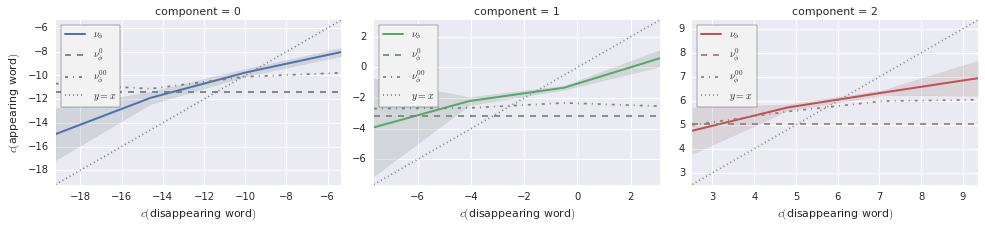

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.54959912  0.18331366  0.15850714  0.04269275  0.03738519]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.710917,-0.082936,0.332377,-0.552327,0.268650,-0.002405
Component-1,0.443363,0.104058,-0.444320,-0.723802,0.267006,0.000101
Component-2,-0.537783,0.109427,-0.814030,0.186905,0.002378,0.035087


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 90911) |          | Elapsed Time: 0:00:13 ETA:  13 days, 21:58:34

  0% (  132 of 90911) |                    | Elapsed Time: 0:00:14 ETA:  0:11:24

  0% (  243 of 90911) |                    | Elapsed Time: 0:00:15 ETA:  0:12:21

  0% (  353 of 90911) |                    | Elapsed Time: 0:00:16 ETA:  0:12:43

  0% (  464 of 90911) |                    | Elapsed Time: 0:00:17 ETA:  0:12:52

  0% (  589 of 90911) |                    | Elapsed Time: 0:00:18 ETA:  0:12:38

  0% (  706 of 90911) |                    | Elapsed Time: 0:00:19 ETA:  0:12:37

  0% (  827 of 90911) |                    | Elapsed Time: 0:00:20 ETA:  0:12:33

  1% (  959 of 90911) |                    | Elapsed Time: 0:00:21 ETA:  0:12:21

  1% ( 1093 of 90911) |                    | Elapsed Time: 0:00:22 ETA:  0:12:10

  1% ( 1137 of 90911) |                    | Elapsed Time: 0:00:22 ETA:  0:12:13

  1% ( 1270 of 90911) |                    | Elapsed Time: 0:00:23 ETA:  0:11:55

  1% ( 1411 of 90911) |                    | Elapsed Time: 0:00:24 ETA:  0:11:32

  1% ( 1558 of 90911) |                    | Elapsed Time: 0:00:25 ETA:  0:11:07

  1% ( 1685 of 90911) |                    | Elapsed Time: 0:00:26 ETA:  0:11:05

  2% ( 1828 of 90911) |                    | Elapsed Time: 0:00:27 ETA:  0:10:48

  2% ( 1984 of 90911) |                    | Elapsed Time: 0:00:28 ETA:  0:10:27

  2% ( 2135 of 90911) |                    | Elapsed Time: 0:00:29 ETA:  0:10:15

  2% ( 2273 of 90911) |                    | Elapsed Time: 0:00:30 ETA:  0:10:09

  2% ( 2351 of 90911) |                    | Elapsed Time: 0:00:31 ETA:  0:10:41

  2% ( 2426 of 90911) |                    | Elapsed Time: 0:00:32 ETA:  0:11:15

  2% ( 2499 of 90911) |                    | Elapsed Time: 0:00:33 ETA:  0:11:58

  2% ( 2574 of 90911) |                    | Elapsed Time: 0:00:34 ETA:  0:12:51

  2% ( 2653 of 90911) |                    | Elapsed Time: 0:00:35 ETA:  0:13:30

  3% ( 2728 of 90911) |                    | Elapsed Time: 0:00:36 ETA:  0:14:33

  3% ( 2804 of 90911) |                    | Elapsed Time: 0:00:37 ETA:  0:16:02

  3% ( 2878 of 90911) |                    | Elapsed Time: 0:00:38 ETA:  0:17:44

  3% ( 2952 of 90911) |                    | Elapsed Time: 0:00:39 ETA:  0:19:31

  3% ( 3034 of 90911) |                    | Elapsed Time: 0:00:40 ETA:  0:19:23

  3% ( 3132 of 90911) |                    | Elapsed Time: 0:00:41 ETA:  0:18:41

  3% ( 3267 of 90911) |                    | Elapsed Time: 0:00:42 ETA:  0:17:07

  3% ( 3410 of 90911) |                    | Elapsed Time: 0:00:43 ETA:  0:15:37

  3% ( 3528 of 90911) |                    | Elapsed Time: 0:00:44 ETA:  0:14:53

  4% ( 3658 of 90911) |                    | Elapsed Time: 0:00:45 ETA:  0:13:56

  4% ( 3788 of 90911) |                    | Elapsed Time: 0:00:46 ETA:  0:13:06

  4% ( 3927 of 90911) |                    | Elapsed Time: 0:00:47 ETA:  0:12:13

  4% ( 4101 of 90911) |                    | Elapsed Time: 0:00:48 ETA:  0:11:04

  4% ( 4268 of 90911) |                    | Elapsed Time: 0:00:49 ETA:  0:10:14

  4% ( 4434 of 90911) |                    | Elapsed Time: 0:00:50 ETA:  0:09:39

  5% ( 4546 of 90911) |#                   | Elapsed Time: 0:00:51 ETA:  0:09:26

  5% ( 4713 of 90911) |#                   | Elapsed Time: 0:00:52 ETA:  0:09:15

  5% ( 4879 of 90911) |#                   | Elapsed Time: 0:00:53 ETA:  0:08:52

  5% ( 5046 of 90911) |#                   | Elapsed Time: 0:00:54 ETA:  0:08:36

  5% ( 5216 of 90911) |#                   | Elapsed Time: 0:00:55 ETA:  0:08:19

  5% ( 5384 of 90911) |#                   | Elapsed Time: 0:00:56 ETA:  0:08:07

  6% ( 5550 of 90911) |#                   | Elapsed Time: 0:00:57 ETA:  0:08:09

  6% ( 5682 of 90911) |#                   | Elapsed Time: 0:00:58 ETA:  0:08:16

  6% ( 5826 of 90911) |#                   | Elapsed Time: 0:00:59 ETA:  0:08:23

  6% ( 5970 of 90911) |#                   | Elapsed Time: 0:01:00 ETA:  0:08:30

  6% ( 6115 of 90911) |#                   | Elapsed Time: 0:01:01 ETA:  0:08:38

  6% ( 6253 of 90911) |#                   | Elapsed Time: 0:01:02 ETA:  0:08:49

  7% ( 6401 of 90911) |#                   | Elapsed Time: 0:01:03 ETA:  0:08:56

  7% ( 6543 of 90911) |#                   | Elapsed Time: 0:01:04 ETA:  0:09:08

  7% ( 6688 of 90911) |#                   | Elapsed Time: 0:01:05 ETA:  0:09:18

  7% ( 6819 of 90911) |#                   | Elapsed Time: 0:01:06 ETA:  0:09:47

  7% ( 6927 of 90911) |#                   | Elapsed Time: 0:01:07 ETA:  0:10:08

  7% ( 7011 of 90911) |#                   | Elapsed Time: 0:01:08 ETA:  0:10:46

  7% ( 7106 of 90911) |#                   | Elapsed Time: 0:01:09 ETA:  0:11:22

  7% ( 7253 of 90911) |#                   | Elapsed Time: 0:01:10 ETA:  0:11:15

  8% ( 7387 of 90911) |#                   | Elapsed Time: 0:01:11 ETA:  0:11:24

  8% ( 7523 of 90911) |#                   | Elapsed Time: 0:01:12 ETA:  0:11:27

  8% ( 7624 of 90911) |#                   | Elapsed Time: 0:01:13 ETA:  0:12:02

  8% ( 7725 of 90911) |#                   | Elapsed Time: 0:01:14 ETA:  0:12:14

  8% ( 7819 of 90911) |#                   | Elapsed Time: 0:01:15 ETA:  0:12:28

  8% ( 7897 of 90911) |#                   | Elapsed Time: 0:01:16 ETA:  0:12:53

  8% ( 7955 of 90911) |#                   | Elapsed Time: 0:01:17 ETA:  0:12:50

  8% ( 8037 of 90911) |#                   | Elapsed Time: 0:01:18 ETA:  0:13:01

  8% ( 8123 of 90911) |#                   | Elapsed Time: 0:01:19 ETA:  0:13:59

  9% ( 8258 of 90911) |#                   | Elapsed Time: 0:01:20 ETA:  0:13:57

  9% ( 8424 of 90911) |#                   | Elapsed Time: 0:01:21 ETA:  0:13:25

  9% ( 8571 of 90911) |#                   | Elapsed Time: 0:01:22 ETA:  0:12:41

  9% ( 8676 of 90911) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:37

  9% ( 8777 of 90911) |#                   | Elapsed Time: 0:01:24 ETA:  0:12:29

  9% ( 8877 of 90911) |#                   | Elapsed Time: 0:01:25 ETA:  0:12:09

  9% ( 8975 of 90911) |#                   | Elapsed Time: 0:01:26 ETA:  0:11:59

 10% ( 9092 of 90911) |##                  | Elapsed Time: 0:01:27 ETA:  0:11:20

 10% ( 9243 of 90911) |##                  | Elapsed Time: 0:01:28 ETA:  0:11:07

 10% ( 9386 of 90911) |##                  | Elapsed Time: 0:01:29 ETA:  0:11:25

 10% ( 9528 of 90911) |##                  | Elapsed Time: 0:01:30 ETA:  0:11:28

 10% ( 9667 of 90911) |##                  | Elapsed Time: 0:01:31 ETA:  0:11:00

 10% ( 9810 of 90911) |##                  | Elapsed Time: 0:01:32 ETA:  0:10:28

 10% ( 9938 of 90911) |##                  | Elapsed Time: 0:01:33 ETA:  0:10:08

 11% (10042 of 90911) |##                  | Elapsed Time: 0:01:34 ETA:  0:10:03

 11% (10158 of 90911) |##                  | Elapsed Time: 0:01:35 ETA:  0:09:51

 11% (10228 of 90911) |##                  | Elapsed Time: 0:01:36 ETA:  0:09:54

 11% (10345 of 90911) |##                  | Elapsed Time: 0:01:37 ETA:  0:10:14

 11% (10463 of 90911) |##                  | Elapsed Time: 0:01:38 ETA:  0:10:30

 11% (10576 of 90911) |##                  | Elapsed Time: 0:01:39 ETA:  0:10:49

 11% (10699 of 90911) |##                  | Elapsed Time: 0:01:40 ETA:  0:10:59

 11% (10821 of 90911) |##                  | Elapsed Time: 0:01:41 ETA:  0:11:14

 12% (10943 of 90911) |##                  | Elapsed Time: 0:01:42 ETA:  0:11:17

 12% (11065 of 90911) |##                  | Elapsed Time: 0:01:43 ETA:  0:11:03

 12% (11186 of 90911) |##                  | Elapsed Time: 0:01:44 ETA:  0:10:58

 12% (11307 of 90911) |##                  | Elapsed Time: 0:01:45 ETA:  0:10:55

 12% (11364 of 90911) |##                  | Elapsed Time: 0:01:45 ETA:  0:10:51

 12% (11479 of 90911) |##                  | Elapsed Time: 0:01:48 ETA:  0:13:48

 12% (11567 of 90911) |##                  | Elapsed Time: 0:01:49 ETA:  0:14:11

 12% (11681 of 90911) |##                  | Elapsed Time: 0:01:50 ETA:  0:14:19

 12% (11800 of 90911) |##                  | Elapsed Time: 0:01:51 ETA:  0:14:22

 13% (11905 of 90911) |##                  | Elapsed Time: 0:01:52 ETA:  0:14:44

 13% (12020 of 90911) |##                  | Elapsed Time: 0:01:53 ETA:  0:14:50

 13% (12143 of 90911) |##                  | Elapsed Time: 0:01:54 ETA:  0:14:47

 13% (12279 of 90911) |##                  | Elapsed Time: 0:01:55 ETA:  0:14:31

 13% (12414 of 90911) |##                  | Elapsed Time: 0:01:56 ETA:  0:14:04

 13% (12501 of 90911) |##                  | Elapsed Time: 0:01:57 ETA:  0:11:03

 13% (12642 of 90911) |##                  | Elapsed Time: 0:01:58 ETA:  0:10:23

 14% (12783 of 90911) |##                  | Elapsed Time: 0:01:59 ETA:  0:10:04

 14% (12935 of 90911) |##                  | Elapsed Time: 0:02:00 ETA:  0:09:42

 14% (13077 of 90911) |##                  | Elapsed Time: 0:02:01 ETA:  0:09:14

 14% (13209 of 90911) |##                  | Elapsed Time: 0:02:02 ETA:  0:09:03

 14% (13340 of 90911) |##                  | Elapsed Time: 0:02:03 ETA:  0:08:57

 14% (13482 of 90911) |##                  | Elapsed Time: 0:02:04 ETA:  0:08:53

 15% (13637 of 90911) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:43

 15% (13783 of 90911) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:39

 15% (13929 of 90911) |###                 | Elapsed Time: 0:02:07 ETA:  0:08:35

 15% (14077 of 90911) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:36

 15% (14227 of 90911) |###                 | Elapsed Time: 0:02:09 ETA:  0:08:31

 15% (14376 of 90911) |###                 | Elapsed Time: 0:02:10 ETA:  0:08:20

 15% (14526 of 90911) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:09

 16% (14664 of 90911) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:10

 16% (14774 of 90911) |###                 | Elapsed Time: 0:02:13 ETA:  0:08:14

 16% (14909 of 90911) |###                 | Elapsed Time: 0:02:14 ETA:  0:08:19

 16% (15044 of 90911) |###                 | Elapsed Time: 0:02:15 ETA:  0:08:23

 16% (15177 of 90911) |###                 | Elapsed Time: 0:02:16 ETA:  0:08:29

 16% (15308 of 90911) |###                 | Elapsed Time: 0:02:17 ETA:  0:08:37

 16% (15417 of 90911) |###                 | Elapsed Time: 0:02:18 ETA:  0:08:59

 17% (15534 of 90911) |###                 | Elapsed Time: 0:02:19 ETA:  0:09:17

 17% (15644 of 90911) |###                 | Elapsed Time: 0:02:20 ETA:  0:09:41

 17% (15761 of 90911) |###                 | Elapsed Time: 0:02:21 ETA:  0:09:54

 17% (15878 of 90911) |###                 | Elapsed Time: 0:02:22 ETA:  0:10:02

 17% (15910 of 90911) |###                 | Elapsed Time: 0:02:22 ETA:  0:10:12

 17% (16028 of 90911) |###                 | Elapsed Time: 0:02:23 ETA:  0:10:24

 17% (16151 of 90911) |###                 | Elapsed Time: 0:02:24 ETA:  0:10:31

 17% (16281 of 90911) |###                 | Elapsed Time: 0:02:25 ETA:  0:10:31

 18% (16396 of 90911) |###                 | Elapsed Time: 0:02:26 ETA:  0:10:25

 18% (16521 of 90911) |###                 | Elapsed Time: 0:02:27 ETA:  0:10:18

 18% (16653 of 90911) |###                 | Elapsed Time: 0:02:28 ETA:  0:10:00

 18% (16776 of 90911) |###                 | Elapsed Time: 0:02:29 ETA:  0:09:54

 18% (16903 of 90911) |###                 | Elapsed Time: 0:02:30 ETA:  0:09:46

 18% (17046 of 90911) |###                 | Elapsed Time: 0:02:31 ETA:  0:09:35

 18% (17177 of 90911) |###                 | Elapsed Time: 0:02:32 ETA:  0:09:28

 19% (17307 of 90911) |###                 | Elapsed Time: 0:02:33 ETA:  0:09:27

 19% (17444 of 90911) |###                 | Elapsed Time: 0:02:34 ETA:  0:09:11

 19% (17572 of 90911) |###                 | Elapsed Time: 0:02:35 ETA:  0:09:08

 19% (17700 of 90911) |###                 | Elapsed Time: 0:02:36 ETA:  0:09:10

 19% (17814 of 90911) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:16

 19% (17919 of 90911) |###                 | Elapsed Time: 0:02:38 ETA:  0:09:30

 19% (18041 of 90911) |###                 | Elapsed Time: 0:02:39 ETA:  0:09:33

 19% (18157 of 90911) |###                 | Elapsed Time: 0:02:40 ETA:  0:09:39

 20% (18183 of 90911) |####                | Elapsed Time: 0:02:41 ETA:  0:09:55

 20% (18259 of 90911) |####                | Elapsed Time: 0:02:42 ETA:  0:10:38

 20% (18343 of 90911) |####                | Elapsed Time: 0:02:43 ETA:  0:11:24

 20% (18470 of 90911) |####                | Elapsed Time: 0:02:44 ETA:  0:11:24

 20% (18600 of 90911) |####                | Elapsed Time: 0:02:45 ETA:  0:11:21

 20% (18732 of 90911) |####                | Elapsed Time: 0:02:46 ETA:  0:11:03

 20% (18865 of 90911) |####                | Elapsed Time: 0:02:47 ETA:  0:10:38

 20% (19001 of 90911) |####                | Elapsed Time: 0:02:48 ETA:  0:10:25

 21% (19109 of 90911) |####                | Elapsed Time: 0:02:49 ETA:  0:10:30

 21% (19271 of 90911) |####                | Elapsed Time: 0:02:50 ETA:  0:09:45

 21% (19319 of 90911) |####                | Elapsed Time: 0:02:50 ETA:  0:09:04

 21% (19474 of 90911) |####                | Elapsed Time: 0:02:51 ETA:  0:08:18

 21% (19623 of 90911) |####                | Elapsed Time: 0:02:52 ETA:  0:08:04

 21% (19771 of 90911) |####                | Elapsed Time: 0:02:53 ETA:  0:07:53

 21% (19944 of 90911) |####                | Elapsed Time: 0:02:54 ETA:  0:07:31

 22% (20116 of 90911) |####                | Elapsed Time: 0:02:55 ETA:  0:07:10

 22% (20280 of 90911) |####                | Elapsed Time: 0:02:56 ETA:  0:06:56

 22% (20387 of 90911) |####                | Elapsed Time: 0:02:57 ETA:  0:06:54

 22% (20455 of 90911) |####                | Elapsed Time: 0:02:58 ETA:  0:07:15

 22% (20556 of 90911) |####                | Elapsed Time: 0:02:59 ETA:  0:07:39

 22% (20671 of 90911) |####                | Elapsed Time: 0:03:00 ETA:  0:08:00

 22% (20828 of 90911) |####                | Elapsed Time: 0:03:01 ETA:  0:07:54

 23% (20983 of 90911) |####                | Elapsed Time: 0:03:02 ETA:  0:07:49

 23% (21140 of 90911) |####                | Elapsed Time: 0:03:03 ETA:  0:07:57

 23% (21293 of 90911) |####                | Elapsed Time: 0:03:04 ETA:  0:08:07

 23% (21447 of 90911) |####                | Elapsed Time: 0:03:05 ETA:  0:08:11

 23% (21592 of 90911) |####                | Elapsed Time: 0:03:06 ETA:  0:07:47

 23% (21744 of 90911) |####                | Elapsed Time: 0:03:07 ETA:  0:07:27

 24% (21895 of 90911) |####                | Elapsed Time: 0:03:08 ETA:  0:07:03

 24% (22042 of 90911) |####                | Elapsed Time: 0:03:09 ETA:  0:06:47

 24% (22163 of 90911) |####                | Elapsed Time: 0:03:10 ETA:  0:07:03

 24% (22274 of 90911) |####                | Elapsed Time: 0:03:11 ETA:  0:07:23

 24% (22378 of 90911) |####                | Elapsed Time: 0:03:12 ETA:  0:07:49

 24% (22502 of 90911) |####                | Elapsed Time: 0:03:13 ETA:  0:08:04

 24% (22667 of 90911) |####                | Elapsed Time: 0:03:14 ETA:  0:07:57

 25% (22728 of 90911) |#####               | Elapsed Time: 0:03:14 ETA:  0:07:56

 25% (22897 of 90911) |#####               | Elapsed Time: 0:03:15 ETA:  0:07:45

 25% (23068 of 90911) |#####               | Elapsed Time: 0:03:16 ETA:  0:07:33

 25% (23203 of 90911) |#####               | Elapsed Time: 0:03:17 ETA:  0:07:39

 25% (23323 of 90911) |#####               | Elapsed Time: 0:03:18 ETA:  0:07:38

 25% (23452 of 90911) |#####               | Elapsed Time: 0:03:19 ETA:  0:07:27

 25% (23584 of 90911) |#####               | Elapsed Time: 0:03:20 ETA:  0:07:11

 26% (23714 of 90911) |#####               | Elapsed Time: 0:03:21 ETA:  0:07:07

 26% (23865 of 90911) |#####               | Elapsed Time: 0:03:22 ETA:  0:07:23

 26% (24041 of 90911) |#####               | Elapsed Time: 0:03:23 ETA:  0:07:18

 26% (24181 of 90911) |#####               | Elapsed Time: 0:03:24 ETA:  0:07:34

 26% (24313 of 90911) |#####               | Elapsed Time: 0:03:25 ETA:  0:07:35

 26% (24443 of 90911) |#####               | Elapsed Time: 0:03:26 ETA:  0:07:29

 27% (24580 of 90911) |#####               | Elapsed Time: 0:03:27 ETA:  0:07:23

 27% (24743 of 90911) |#####               | Elapsed Time: 0:03:28 ETA:  0:07:04

 27% (24901 of 90911) |#####               | Elapsed Time: 0:03:29 ETA:  0:06:48

 27% (25001 of 90911) |#####               | Elapsed Time: 0:03:30 ETA:  0:06:51

 27% (25165 of 90911) |#####               | Elapsed Time: 0:03:31 ETA:  0:06:41

 27% (25324 of 90911) |#####               | Elapsed Time: 0:03:32 ETA:  0:06:48

 28% (25475 of 90911) |#####               | Elapsed Time: 0:03:33 ETA:  0:06:42

 28% (25630 of 90911) |#####               | Elapsed Time: 0:03:34 ETA:  0:06:30

 28% (25796 of 90911) |#####               | Elapsed Time: 0:03:35 ETA:  0:06:13

 28% (25953 of 90911) |#####               | Elapsed Time: 0:03:36 ETA:  0:06:04

 28% (26137 of 90911) |#####               | Elapsed Time: 0:03:37 ETA:  0:06:04

 28% (26300 of 90911) |#####               | Elapsed Time: 0:03:38 ETA:  0:05:53

 29% (26448 of 90911) |#####               | Elapsed Time: 0:03:39 ETA:  0:05:59

 29% (26590 of 90911) |#####               | Elapsed Time: 0:03:40 ETA:  0:06:06

 29% (26755 of 90911) |#####               | Elapsed Time: 0:03:41 ETA:  0:05:59

 29% (26918 of 90911) |#####               | Elapsed Time: 0:03:42 ETA:  0:05:54

 29% (27051 of 90911) |#####               | Elapsed Time: 0:03:43 ETA:  0:06:08

 29% (27180 of 90911) |#####               | Elapsed Time: 0:03:44 ETA:  0:06:21

 30% (27274 of 90911) |######              | Elapsed Time: 0:03:45 ETA:  0:06:24

 30% (27436 of 90911) |######              | Elapsed Time: 0:03:46 ETA:  0:06:18

 30% (27590 of 90911) |######              | Elapsed Time: 0:03:47 ETA:  0:06:22

 30% (27755 of 90911) |######              | Elapsed Time: 0:03:48 ETA:  0:06:13

 30% (27922 of 90911) |######              | Elapsed Time: 0:03:49 ETA:  0:06:00

 30% (28066 of 90911) |######              | Elapsed Time: 0:03:50 ETA:  0:06:09

 31% (28195 of 90911) |######              | Elapsed Time: 0:03:51 ETA:  0:06:24

 31% (28323 of 90911) |######              | Elapsed Time: 0:03:52 ETA:  0:06:25

 31% (28410 of 90911) |######              | Elapsed Time: 0:03:52 ETA:  0:06:09

 31% (28581 of 90911) |######              | Elapsed Time: 0:03:53 ETA:  0:05:59

 31% (28756 of 90911) |######              | Elapsed Time: 0:03:54 ETA:  0:05:53

 31% (28921 of 90911) |######              | Elapsed Time: 0:03:55 ETA:  0:05:47

 32% (29098 of 90911) |######              | Elapsed Time: 0:03:56 ETA:  0:05:41

 32% (29254 of 90911) |######              | Elapsed Time: 0:03:57 ETA:  0:05:44

 32% (29393 of 90911) |######              | Elapsed Time: 0:03:58 ETA:  0:05:45

 32% (29508 of 90911) |######              | Elapsed Time: 0:03:59 ETA:  0:05:50

 32% (29547 of 90911) |######              | Elapsed Time: 0:04:00 ETA:  0:05:47

 32% (29632 of 90911) |######              | Elapsed Time: 0:04:01 ETA:  0:06:24

 32% (29730 of 90911) |######              | Elapsed Time: 0:04:02 ETA:  0:07:03

 32% (29848 of 90911) |######              | Elapsed Time: 0:04:03 ETA:  0:07:37

 32% (29979 of 90911) |######              | Elapsed Time: 0:04:04 ETA:  0:07:58

 33% (30086 of 90911) |######              | Elapsed Time: 0:04:05 ETA:  0:08:49

 33% (30195 of 90911) |######              | Elapsed Time: 0:04:06 ETA:  0:09:27

 33% (30360 of 90911) |######              | Elapsed Time: 0:04:07 ETA:  0:09:04

 33% (30483 of 90911) |######              | Elapsed Time: 0:04:08 ETA:  0:08:57

 33% (30612 of 90911) |######              | Elapsed Time: 0:04:09 ETA:  0:08:42

 33% (30683 of 90911) |######              | Elapsed Time: 0:04:09 ETA:  0:08:04

 33% (30838 of 90911) |######              | Elapsed Time: 0:04:10 ETA:  0:07:25

 34% (30996 of 90911) |######              | Elapsed Time: 0:04:11 ETA:  0:07:00

 34% (31153 of 90911) |######              | Elapsed Time: 0:04:12 ETA:  0:06:44

 34% (31279 of 90911) |######              | Elapsed Time: 0:04:13 ETA:  0:06:32

 34% (31393 of 90911) |######              | Elapsed Time: 0:04:14 ETA:  0:06:29

 34% (31532 of 90911) |######              | Elapsed Time: 0:04:15 ETA:  0:06:42

 34% (31693 of 90911) |######              | Elapsed Time: 0:04:16 ETA:  0:06:20

 35% (31819 of 90911) |#######             | Elapsed Time: 0:04:17 ETA:  0:06:15

 35% (31942 of 90911) |#######             | Elapsed Time: 0:04:18 ETA:  0:06:28

 35% (32062 of 90911) |#######             | Elapsed Time: 0:04:19 ETA:  0:06:46

 35% (32135 of 90911) |#######             | Elapsed Time: 0:04:20 ETA:  0:07:35

 35% (32294 of 90911) |#######             | Elapsed Time: 0:04:21 ETA:  0:07:32

 35% (32455 of 90911) |#######             | Elapsed Time: 0:04:22 ETA:  0:07:10

 35% (32574 of 90911) |#######             | Elapsed Time: 0:04:23 ETA:  0:07:06

 35% (32700 of 90911) |#######             | Elapsed Time: 0:04:24 ETA:  0:07:13

 36% (32822 of 90911) |#######             | Elapsed Time: 0:04:25 ETA:  0:07:35

 36% (32956 of 90911) |#######             | Elapsed Time: 0:04:26 ETA:  0:07:24

 36% (33109 of 90911) |#######             | Elapsed Time: 0:04:27 ETA:  0:07:05

 36% (33241 of 90911) |#######             | Elapsed Time: 0:04:28 ETA:  0:06:56

 36% (33403 of 90911) |#######             | Elapsed Time: 0:04:29 ETA:  0:06:07

 36% (33555 of 90911) |#######             | Elapsed Time: 0:04:30 ETA:  0:06:09

 37% (33696 of 90911) |#######             | Elapsed Time: 0:04:31 ETA:  0:06:19

 37% (33841 of 90911) |#######             | Elapsed Time: 0:04:32 ETA:  0:06:05

 37% (33966 of 90911) |#######             | Elapsed Time: 0:04:33 ETA:  0:06:04

 37% (34092 of 90911) |#######             | Elapsed Time: 0:04:34 ETA:  0:06:09

 37% (34216 of 90911) |#######             | Elapsed Time: 0:04:35 ETA:  0:06:25

 37% (34342 of 90911) |#######             | Elapsed Time: 0:04:36 ETA:  0:06:27

 37% (34481 of 90911) |#######             | Elapsed Time: 0:04:37 ETA:  0:06:40

 38% (34621 of 90911) |#######             | Elapsed Time: 0:04:38 ETA:  0:06:47

 38% (34773 of 90911) |#######             | Elapsed Time: 0:04:39 ETA:  0:06:39

 38% (34892 of 90911) |#######             | Elapsed Time: 0:04:40 ETA:  0:06:55

 38% (35054 of 90911) |#######             | Elapsed Time: 0:04:41 ETA:  0:06:30

 38% (35229 of 90911) |#######             | Elapsed Time: 0:04:42 ETA:  0:06:09

 38% (35325 of 90911) |#######             | Elapsed Time: 0:04:43 ETA:  0:06:25

 39% (35456 of 90911) |#######             | Elapsed Time: 0:04:44 ETA:  0:06:21

 39% (35585 of 90911) |#######             | Elapsed Time: 0:04:45 ETA:  0:06:26

 39% (35701 of 90911) |#######             | Elapsed Time: 0:04:46 ETA:  0:06:40

 39% (35840 of 90911) |#######             | Elapsed Time: 0:04:47 ETA:  0:06:47

 39% (35998 of 90911) |#######             | Elapsed Time: 0:04:48 ETA:  0:06:21

 39% (36152 of 90911) |#######             | Elapsed Time: 0:04:49 ETA:  0:06:25

 39% (36300 of 90911) |#######             | Elapsed Time: 0:04:50 ETA:  0:06:31

 40% (36365 of 90911) |########            | Elapsed Time: 0:04:51 ETA:  0:06:26

 40% (36514 of 90911) |########            | Elapsed Time: 0:04:52 ETA:  0:05:55

 40% (36664 of 90911) |########            | Elapsed Time: 0:04:53 ETA:  0:05:43

 40% (36817 of 90911) |########            | Elapsed Time: 0:04:54 ETA:  0:05:30

 40% (36950 of 90911) |########            | Elapsed Time: 0:04:55 ETA:  0:05:20

 40% (37091 of 90911) |########            | Elapsed Time: 0:04:56 ETA:  0:05:18

 40% (37231 of 90911) |########            | Elapsed Time: 0:04:57 ETA:  0:05:26

 41% (37399 of 90911) |########            | Elapsed Time: 0:04:58 ETA:  0:05:18

 41% (37501 of 90911) |########            | Elapsed Time: 0:04:59 ETA:  0:05:33

 41% (37631 of 90911) |########            | Elapsed Time: 0:05:00 ETA:  0:05:40

 41% (37764 of 90911) |########            | Elapsed Time: 0:05:01 ETA:  0:05:47

 41% (37909 of 90911) |########            | Elapsed Time: 0:05:02 ETA:  0:05:49

 41% (38059 of 90911) |########            | Elapsed Time: 0:05:03 ETA:  0:05:50

 42% (38204 of 90911) |########            | Elapsed Time: 0:05:04 ETA:  0:05:42

 42% (38348 of 90911) |########            | Elapsed Time: 0:05:05 ETA:  0:05:40

 42% (38508 of 90911) |########            | Elapsed Time: 0:05:06 ETA:  0:05:29

 42% (38638 of 90911) |########            | Elapsed Time: 0:05:07 ETA:  0:05:45

 42% (38772 of 90911) |########            | Elapsed Time: 0:05:08 ETA:  0:05:35

 42% (38910 of 90911) |########            | Elapsed Time: 0:05:09 ETA:  0:05:30

 42% (39043 of 90911) |########            | Elapsed Time: 0:05:10 ETA:  0:05:29

 43% (39190 of 90911) |########            | Elapsed Time: 0:05:11 ETA:  0:05:27

 43% (39338 of 90911) |########            | Elapsed Time: 0:05:12 ETA:  0:05:27

 43% (39490 of 90911) |########            | Elapsed Time: 0:05:13 ETA:  0:05:23

 43% (39600 of 90911) |########            | Elapsed Time: 0:05:14 ETA:  0:05:39

 43% (39710 of 90911) |########            | Elapsed Time: 0:05:15 ETA:  0:06:05

 43% (39774 of 90911) |########            | Elapsed Time: 0:05:15 ETA:  0:06:08

 43% (39933 of 90911) |########            | Elapsed Time: 0:05:16 ETA:  0:05:53

 44% (40073 of 90911) |########            | Elapsed Time: 0:05:17 ETA:  0:05:51

 44% (40174 of 90911) |########            | Elapsed Time: 0:05:18 ETA:  0:06:09

 44% (40287 of 90911) |########            | Elapsed Time: 0:05:19 ETA:  0:06:30

 44% (40426 of 90911) |########            | Elapsed Time: 0:05:20 ETA:  0:06:35

 44% (40569 of 90911) |########            | Elapsed Time: 0:05:21 ETA:  0:06:39

 44% (40710 of 90911) |########            | Elapsed Time: 0:05:22 ETA:  0:06:18

 44% (40849 of 90911) |########            | Elapsed Time: 0:05:23 ETA:  0:05:59

 45% (40910 of 90911) |#########           | Elapsed Time: 0:05:24 ETA:  0:05:56

 45% (41064 of 90911) |#########           | Elapsed Time: 0:05:25 ETA:  0:05:58

 45% (41185 of 90911) |#########           | Elapsed Time: 0:05:26 ETA:  0:06:09

 45% (41288 of 90911) |#########           | Elapsed Time: 0:05:27 ETA:  0:06:06

 45% (41432 of 90911) |#########           | Elapsed Time: 0:05:28 ETA:  0:05:47

 45% (41545 of 90911) |#########           | Elapsed Time: 0:05:29 ETA:  0:06:01

 45% (41687 of 90911) |#########           | Elapsed Time: 0:05:30 ETA:  0:06:01

 46% (41823 of 90911) |#########           | Elapsed Time: 0:05:31 ETA:  0:06:04

 46% (41963 of 90911) |#########           | Elapsed Time: 0:05:32 ETA:  0:06:02

 46% (42047 of 90911) |#########           | Elapsed Time: 0:05:32 ETA:  0:06:03

 46% (42162 of 90911) |#########           | Elapsed Time: 0:05:33 ETA:  0:06:27

 46% (42278 of 90911) |#########           | Elapsed Time: 0:05:34 ETA:  0:06:31

 46% (42299 of 90911) |#########           | Elapsed Time: 0:05:35 ETA:  0:07:30

 46% (42388 of 90911) |#########           | Elapsed Time: 0:05:36 ETA:  0:08:14

 46% (42522 of 90911) |#########           | Elapsed Time: 0:05:37 ETA:  0:07:54

 46% (42661 of 90911) |#########           | Elapsed Time: 0:05:38 ETA:  0:07:56

 47% (42803 of 90911) |#########           | Elapsed Time: 0:05:39 ETA:  0:07:49

 47% (42927 of 90911) |#########           | Elapsed Time: 0:05:40 ETA:  0:08:01

 47% (43007 of 90911) |#########           | Elapsed Time: 0:05:41 ETA:  0:08:36

 47% (43126 of 90911) |#########           | Elapsed Time: 0:05:42 ETA:  0:08:32

 47% (43183 of 90911) |#########           | Elapsed Time: 0:05:43 ETA:  0:08:26

 47% (43291 of 90911) |#########           | Elapsed Time: 0:05:44 ETA:  0:07:09

 47% (43397 of 90911) |#########           | Elapsed Time: 0:05:45 ETA:  0:06:55

 47% (43471 of 90911) |#########           | Elapsed Time: 0:05:46 ETA:  0:07:42

 47% (43547 of 90911) |#########           | Elapsed Time: 0:05:47 ETA:  0:08:39

 47% (43635 of 90911) |#########           | Elapsed Time: 0:05:48 ETA:  0:09:35

 48% (43709 of 90911) |#########           | Elapsed Time: 0:05:49 ETA:  0:10:33

 48% (43780 of 90911) |#########           | Elapsed Time: 0:05:50 ETA:  0:10:46

 48% (43853 of 90911) |#########           | Elapsed Time: 0:05:51 ETA:  0:11:48

 48% (43911 of 90911) |#########           | Elapsed Time: 0:05:52 ETA:  0:13:01

 48% (43984 of 90911) |#########           | Elapsed Time: 0:05:53 ETA:  0:13:59

 48% (44063 of 90911) |#########           | Elapsed Time: 0:05:54 ETA:  0:14:47

 48% (44154 of 90911) |#########           | Elapsed Time: 0:05:55 ETA:  0:14:15

 48% (44251 of 90911) |#########           | Elapsed Time: 0:05:56 ETA:  0:13:41

 48% (44320 of 90911) |#########           | Elapsed Time: 0:05:57 ETA:  0:13:42

 48% (44403 of 90911) |#########           | Elapsed Time: 0:05:58 ETA:  0:13:25

 48% (44489 of 90911) |#########           | Elapsed Time: 0:05:59 ETA:  0:12:56

 49% (44556 of 90911) |#########           | Elapsed Time: 0:06:00 ETA:  0:13:07

 49% (44621 of 90911) |#########           | Elapsed Time: 0:06:01 ETA:  0:12:54

 49% (44696 of 90911) |#########           | Elapsed Time: 0:06:02 ETA:  0:12:50

 49% (44772 of 90911) |#########           | Elapsed Time: 0:06:03 ETA:  0:12:54

 49% (44854 of 90911) |#########           | Elapsed Time: 0:06:04 ETA:  0:13:08

 49% (44925 of 90911) |#########           | Elapsed Time: 0:06:05 ETA:  0:13:49

 49% (45001 of 90911) |#########           | Elapsed Time: 0:06:06 ETA:  0:14:07

 49% (45092 of 90911) |#########           | Elapsed Time: 0:06:07 ETA:  0:13:52

 49% (45161 of 90911) |#########           | Elapsed Time: 0:06:08 ETA:  0:14:22

 49% (45240 of 90911) |#########           | Elapsed Time: 0:06:09 ETA:  0:13:58

 49% (45314 of 90911) |#########           | Elapsed Time: 0:06:10 ETA:  0:13:40

 49% (45383 of 90911) |#########           | Elapsed Time: 0:06:11 ETA:  0:13:49

 50% (45456 of 90911) |##########          | Elapsed Time: 0:06:12 ETA:  0:14:34

 50% (45525 of 90911) |##########          | Elapsed Time: 0:06:13 ETA:  0:14:35

 50% (45623 of 90911) |##########          | Elapsed Time: 0:06:14 ETA:  0:13:49

 50% (45733 of 90911) |##########          | Elapsed Time: 0:06:15 ETA:  0:13:13

 50% (45838 of 90911) |##########          | Elapsed Time: 0:06:16 ETA:  0:12:10

 50% (45955 of 90911) |##########          | Elapsed Time: 0:06:17 ETA:  0:11:08

 50% (46085 of 90911) |##########          | Elapsed Time: 0:06:18 ETA:  0:09:51

 50% (46204 of 90911) |##########          | Elapsed Time: 0:06:19 ETA:  0:08:50

 50% (46311 of 90911) |##########          | Elapsed Time: 0:06:20 ETA:  0:08:02

 51% (46401 of 90911) |##########          | Elapsed Time: 0:06:21 ETA:  0:08:08

 51% (46505 of 90911) |##########          | Elapsed Time: 0:06:22 ETA:  0:07:36

 51% (46592 of 90911) |##########          | Elapsed Time: 0:06:23 ETA:  0:07:41

 51% (46658 of 90911) |##########          | Elapsed Time: 0:06:24 ETA:  0:08:22

 51% (46744 of 90911) |##########          | Elapsed Time: 0:06:25 ETA:  0:08:39

 51% (46875 of 90911) |##########          | Elapsed Time: 0:06:26 ETA:  0:08:25

 51% (47003 of 90911) |##########          | Elapsed Time: 0:06:27 ETA:  0:08:25

 51% (47129 of 90911) |##########          | Elapsed Time: 0:06:28 ETA:  0:08:17

 51% (47257 of 90911) |##########          | Elapsed Time: 0:06:29 ETA:  0:07:56

 52% (47390 of 90911) |##########          | Elapsed Time: 0:06:30 ETA:  0:07:18

 52% (47526 of 90911) |##########          | Elapsed Time: 0:06:31 ETA:  0:06:50

 52% (47659 of 90911) |##########          | Elapsed Time: 0:06:32 ETA:  0:06:18

 52% (47729 of 90911) |##########          | Elapsed Time: 0:06:33 ETA:  0:05:28

 52% (47877 of 90911) |##########          | Elapsed Time: 0:06:34 ETA:  0:04:48

 52% (48043 of 90911) |##########          | Elapsed Time: 0:06:35 ETA:  0:04:26

 53% (48217 of 90911) |##########          | Elapsed Time: 0:06:36 ETA:  0:04:01

 53% (48356 of 90911) |##########          | Elapsed Time: 0:06:37 ETA:  0:03:53

 53% (48480 of 90911) |##########          | Elapsed Time: 0:06:38 ETA:  0:03:53

 53% (48604 of 90911) |##########          | Elapsed Time: 0:06:39 ETA:  0:03:57

 53% (48743 of 90911) |##########          | Elapsed Time: 0:06:40 ETA:  0:03:55

 53% (48865 of 90911) |##########          | Elapsed Time: 0:06:41 ETA:  0:03:50

 53% (49021 of 90911) |##########          | Elapsed Time: 0:06:42 ETA:  0:03:44

 54% (49170 of 90911) |##########          | Elapsed Time: 0:06:43 ETA:  0:03:43

 54% (49310 of 90911) |##########          | Elapsed Time: 0:06:44 ETA:  0:03:54

 54% (49467 of 90911) |##########          | Elapsed Time: 0:06:45 ETA:  0:04:02

 54% (49620 of 90911) |##########          | Elapsed Time: 0:06:46 ETA:  0:03:54

 54% (49744 of 90911) |##########          | Elapsed Time: 0:06:47 ETA:  0:03:53

 54% (49910 of 90911) |##########          | Elapsed Time: 0:06:48 ETA:  0:03:32

 55% (50002 of 90911) |###########         | Elapsed Time: 0:06:48 ETA:  0:03:39

 55% (50165 of 90911) |###########         | Elapsed Time: 0:06:49 ETA:  0:03:26

 55% (50310 of 90911) |###########         | Elapsed Time: 0:06:50 ETA:  0:03:30

 55% (50461 of 90911) |###########         | Elapsed Time: 0:06:51 ETA:  0:03:29

 55% (50629 of 90911) |###########         | Elapsed Time: 0:06:52 ETA:  0:03:14

 55% (50757 of 90911) |###########         | Elapsed Time: 0:06:53 ETA:  0:03:27

 56% (50927 of 90911) |###########         | Elapsed Time: 0:06:54 ETA:  0:03:18

 56% (51090 of 90911) |###########         | Elapsed Time: 0:06:55 ETA:  0:02:59

 56% (51138 of 90911) |###########         | Elapsed Time: 0:06:56 ETA:  0:03:05

 56% (51265 of 90911) |###########         | Elapsed Time: 0:06:57 ETA:  0:03:03

 56% (51413 of 90911) |###########         | Elapsed Time: 0:06:58 ETA:  0:03:09

 56% (51571 of 90911) |###########         | Elapsed Time: 0:06:59 ETA:  0:03:02

 56% (51715 of 90911) |###########         | Elapsed Time: 0:07:00 ETA:  0:03:05

 57% (51846 of 90911) |###########         | Elapsed Time: 0:07:01 ETA:  0:03:23

 57% (51982 of 90911) |###########         | Elapsed Time: 0:07:02 ETA:  0:03:17

 57% (52093 of 90911) |###########         | Elapsed Time: 0:07:03 ETA:  0:03:48

 57% (52194 of 90911) |###########         | Elapsed Time: 0:07:04 ETA:  0:04:23

 57% (52274 of 90911) |###########         | Elapsed Time: 0:07:04 ETA:  0:04:15

 57% (52436 of 90911) |###########         | Elapsed Time: 0:07:05 ETA:  0:03:54

 57% (52574 of 90911) |###########         | Elapsed Time: 0:07:06 ETA:  0:03:58

 58% (52756 of 90911) |###########         | Elapsed Time: 0:07:07 ETA:  0:03:43

 58% (52921 of 90911) |###########         | Elapsed Time: 0:07:08 ETA:  0:03:31

 58% (53066 of 90911) |###########         | Elapsed Time: 0:07:09 ETA:  0:03:22

 58% (53204 of 90911) |###########         | Elapsed Time: 0:07:10 ETA:  0:03:20

 58% (53352 of 90911) |###########         | Elapsed Time: 0:07:11 ETA:  0:03:01

 58% (53411 of 90911) |###########         | Elapsed Time: 0:07:12 ETA:  0:02:31

 58% (53560 of 90911) |###########         | Elapsed Time: 0:07:13 ETA:  0:02:37

 59% (53709 of 90911) |###########         | Elapsed Time: 0:07:14 ETA:  0:02:42

 59% (53873 of 90911) |###########         | Elapsed Time: 0:07:15 ETA:  0:02:29

 59% (54025 of 90911) |###########         | Elapsed Time: 0:07:16 ETA:  0:02:42

 59% (54177 of 90911) |###########         | Elapsed Time: 0:07:17 ETA:  0:02:47

 59% (54334 of 90911) |###########         | Elapsed Time: 0:07:18 ETA:  0:02:41

 59% (54479 of 90911) |###########         | Elapsed Time: 0:07:19 ETA:  0:02:36

 60% (54547 of 90911) |############        | Elapsed Time: 0:07:19 ETA:  0:02:36

 60% (54705 of 90911) |############        | Elapsed Time: 0:07:20 ETA:  0:02:37

 60% (54864 of 90911) |############        | Elapsed Time: 0:07:21 ETA:  0:02:32

 60% (54995 of 90911) |############        | Elapsed Time: 0:07:22 ETA:  0:02:39

 60% (55154 of 90911) |############        | Elapsed Time: 0:07:23 ETA:  0:02:40

 60% (55314 of 90911) |############        | Elapsed Time: 0:07:24 ETA:  0:02:36

 61% (55464 of 90911) |############        | Elapsed Time: 0:07:25 ETA:  0:02:35

 61% (55635 of 90911) |############        | Elapsed Time: 0:07:26 ETA:  0:02:28

 61% (55683 of 90911) |############        | Elapsed Time: 0:07:26 ETA:  0:02:25

 61% (55807 of 90911) |############        | Elapsed Time: 0:07:27 ETA:  0:02:35

 61% (55924 of 90911) |############        | Elapsed Time: 0:07:28 ETA:  0:02:55

 61% (56013 of 90911) |############        | Elapsed Time: 0:07:29 ETA:  0:03:32

 61% (56103 of 90911) |############        | Elapsed Time: 0:07:31 ETA:  0:03:56

 61% (56190 of 90911) |############        | Elapsed Time: 0:07:32 ETA:  0:04:43

 61% (56303 of 90911) |############        | Elapsed Time: 0:07:33 ETA:  0:05:18

 62% (56423 of 90911) |############        | Elapsed Time: 0:07:34 ETA:  0:05:41

 62% (56557 of 90911) |############        | Elapsed Time: 0:07:35 ETA:  0:06:12

 62% (56693 of 90911) |############        | Elapsed Time: 0:07:36 ETA:  0:05:59

 62% (56820 of 90911) |############        | Elapsed Time: 0:07:36 ETA:  0:05:40

 62% (56933 of 90911) |############        | Elapsed Time: 0:07:37 ETA:  0:05:42

 62% (57057 of 90911) |############        | Elapsed Time: 0:07:38 ETA:  0:05:14

 62% (57193 of 90911) |############        | Elapsed Time: 0:07:39 ETA:  0:04:39

 63% (57325 of 90911) |############        | Elapsed Time: 0:07:40 ETA:  0:04:09

 63% (57501 of 90911) |############        | Elapsed Time: 0:07:41 ETA:  0:03:30

 63% (57596 of 90911) |############        | Elapsed Time: 0:07:42 ETA:  0:03:43

 63% (57655 of 90911) |############        | Elapsed Time: 0:07:43 ETA:  0:04:29

 63% (57743 of 90911) |############        | Elapsed Time: 0:07:44 ETA:  0:05:01

 63% (57894 of 90911) |############        | Elapsed Time: 0:07:45 ETA:  0:04:58

 63% (57956 of 90911) |############        | Elapsed Time: 0:07:46 ETA:  0:04:48

 63% (58102 of 90911) |############        | Elapsed Time: 0:07:47 ETA:  0:04:31

 64% (58253 of 90911) |############        | Elapsed Time: 0:07:48 ETA:  0:04:20

 64% (58399 of 90911) |############        | Elapsed Time: 0:07:49 ETA:  0:04:09

 64% (58514 of 90911) |############        | Elapsed Time: 0:07:50 ETA:  0:04:52

 64% (58657 of 90911) |############        | Elapsed Time: 0:07:51 ETA:  0:04:17

 64% (58744 of 90911) |############        | Elapsed Time: 0:07:52 ETA:  0:03:57

 64% (58856 of 90911) |############        | Elapsed Time: 0:07:53 ETA:  0:03:41

 64% (58988 of 90911) |############        | Elapsed Time: 0:07:54 ETA:  0:03:52

 65% (59093 of 90911) |#############       | Elapsed Time: 0:07:55 ETA:  0:03:46

 65% (59232 of 90911) |#############       | Elapsed Time: 0:07:56 ETA:  0:03:49

 65% (59378 of 90911) |#############       | Elapsed Time: 0:07:57 ETA:  0:03:52

 65% (59523 of 90911) |#############       | Elapsed Time: 0:07:58 ETA:  0:03:51

 65% (59677 of 90911) |#############       | Elapsed Time: 0:07:59 ETA:  0:03:26

 65% (59834 of 90911) |#############       | Elapsed Time: 0:08:00 ETA:  0:03:17

 65% (59966 of 90911) |#############       | Elapsed Time: 0:08:01 ETA:  0:02:51

 66% (60109 of 90911) |#############       | Elapsed Time: 0:08:02 ETA:  0:02:35

 66% (60229 of 90911) |#############       | Elapsed Time: 0:08:03 ETA:  0:02:33

 66% (60370 of 90911) |#############       | Elapsed Time: 0:08:04 ETA:  0:02:32

 66% (60510 of 90911) |#############       | Elapsed Time: 0:08:05 ETA:  0:02:31

 66% (60640 of 90911) |#############       | Elapsed Time: 0:08:06 ETA:  0:02:38

 66% (60773 of 90911) |#############       | Elapsed Time: 0:08:07 ETA:  0:02:43

 66% (60899 of 90911) |#############       | Elapsed Time: 0:08:08 ETA:  0:02:57

 67% (61075 of 90911) |#############       | Elapsed Time: 0:08:09 ETA:  0:02:46

 67% (61249 of 90911) |#############       | Elapsed Time: 0:08:10 ETA:  0:02:23

 67% (61365 of 90911) |#############       | Elapsed Time: 0:08:11 ETA:  0:02:39

 67% (61470 of 90911) |#############       | Elapsed Time: 0:08:12 ETA:  0:02:58

 67% (61590 of 90911) |#############       | Elapsed Time: 0:08:13 ETA:  0:03:10

 67% (61757 of 90911) |#############       | Elapsed Time: 0:08:14 ETA:  0:02:46

 68% (61916 of 90911) |#############       | Elapsed Time: 0:08:15 ETA:  0:02:30

 68% (62088 of 90911) |#############       | Elapsed Time: 0:08:16 ETA:  0:02:04

 68% (62247 of 90911) |#############       | Elapsed Time: 0:08:17 ETA:  0:02:12

 68% (62379 of 90911) |#############       | Elapsed Time: 0:08:18 ETA:  0:02:35

 68% (62502 of 90911) |#############       | Elapsed Time: 0:08:19 ETA:  0:02:06

 68% (62639 of 90911) |#############       | Elapsed Time: 0:08:20 ETA:  0:02:09

 69% (62779 of 90911) |#############       | Elapsed Time: 0:08:21 ETA:  0:01:51

 69% (62918 of 90911) |#############       | Elapsed Time: 0:08:22 ETA:  0:01:42

 69% (63054 of 90911) |#############       | Elapsed Time: 0:08:23 ETA:  0:01:55

 69% (63173 of 90911) |#############       | Elapsed Time: 0:08:24 ETA:  0:02:14

 69% (63300 of 90911) |#############       | Elapsed Time: 0:08:25 ETA:  0:02:37

 69% (63467 of 90911) |#############       | Elapsed Time: 0:08:26 ETA:  0:02:32

 70% (63638 of 90911) |##############      | Elapsed Time: 0:08:27 ETA:  0:02:24

 70% (63781 of 90911) |##############      | Elapsed Time: 0:08:28 ETA:  0:02:20

 70% (63924 of 90911) |##############      | Elapsed Time: 0:08:29 ETA:  0:02:17

 70% (64039 of 90911) |##############      | Elapsed Time: 0:08:30 ETA:  0:02:30

 70% (64188 of 90911) |##############      | Elapsed Time: 0:08:31 ETA:  0:02:21

 70% (64322 of 90911) |##############      | Elapsed Time: 0:08:32 ETA:  0:02:12

 70% (64476 of 90911) |##############      | Elapsed Time: 0:08:33 ETA:  0:01:55

 71% (64630 of 90911) |##############      | Elapsed Time: 0:08:34 ETA:  0:02:01

 71% (64758 of 90911) |##############      | Elapsed Time: 0:08:35 ETA:  0:02:14

 71% (64775 of 90911) |##############      | Elapsed Time: 0:08:35 ETA:  0:02:27

 71% (64895 of 90911) |##############      | Elapsed Time: 0:08:36 ETA:  0:02:40

 71% (65063 of 90911) |##############      | Elapsed Time: 0:08:37 ETA:  0:02:24

 71% (65180 of 90911) |##############      | Elapsed Time: 0:08:38 ETA:  0:02:22

 71% (65264 of 90911) |##############      | Elapsed Time: 0:08:39 ETA:  0:03:01

 71% (65393 of 90911) |##############      | Elapsed Time: 0:08:40 ETA:  0:03:03

 72% (65546 of 90911) |##############      | Elapsed Time: 0:08:41 ETA:  0:03:03

 72% (65668 of 90911) |##############      | Elapsed Time: 0:08:42 ETA:  0:03:23

 72% (65800 of 90911) |##############      | Elapsed Time: 0:08:43 ETA:  0:03:19

 72% (65911 of 90911) |##############      | Elapsed Time: 0:08:44 ETA:  0:03:03

 72% (66041 of 90911) |##############      | Elapsed Time: 0:08:45 ETA:  0:02:56

 72% (66191 of 90911) |##############      | Elapsed Time: 0:08:46 ETA:  0:03:07

 72% (66283 of 90911) |##############      | Elapsed Time: 0:08:47 ETA:  0:03:22

 72% (66361 of 90911) |##############      | Elapsed Time: 0:08:48 ETA:  0:03:25

 73% (66465 of 90911) |##############      | Elapsed Time: 0:08:49 ETA:  0:03:42

 73% (66567 of 90911) |##############      | Elapsed Time: 0:08:50 ETA:  0:04:19

 73% (66669 of 90911) |##############      | Elapsed Time: 0:08:51 ETA:  0:04:35

 73% (66756 of 90911) |##############      | Elapsed Time: 0:08:52 ETA:  0:05:13

 73% (66805 of 90911) |##############      | Elapsed Time: 0:08:53 ETA:  0:06:28

 73% (66871 of 90911) |##############      | Elapsed Time: 0:08:54 ETA:  0:07:38

 73% (66963 of 90911) |##############      | Elapsed Time: 0:08:55 ETA:  0:08:52

 73% (67032 of 90911) |##############      | Elapsed Time: 0:08:56 ETA:  0:09:25

 73% (67047 of 90911) |##############      | Elapsed Time: 0:08:56 ETA:  0:09:28

 73% (67131 of 90911) |##############      | Elapsed Time: 0:08:57 ETA:  0:10:00

 73% (67222 of 90911) |##############      | Elapsed Time: 0:08:58 ETA:  0:10:17

 74% (67314 of 90911) |##############      | Elapsed Time: 0:08:59 ETA:  0:10:36

 74% (67398 of 90911) |##############      | Elapsed Time: 0:09:00 ETA:  0:10:41

 74% (67449 of 90911) |##############      | Elapsed Time: 0:09:01 ETA:  0:10:49

 74% (67523 of 90911) |##############      | Elapsed Time: 0:09:02 ETA:  0:10:32

 74% (67608 of 90911) |##############      | Elapsed Time: 0:09:03 ETA:  0:10:46

 74% (67681 of 90911) |##############      | Elapsed Time: 0:09:04 ETA:  0:10:37

 74% (67732 of 90911) |##############      | Elapsed Time: 0:09:05 ETA:  0:11:12

 74% (67813 of 90911) |##############      | Elapsed Time: 0:09:06 ETA:  0:11:15

 74% (67870 of 90911) |##############      | Elapsed Time: 0:09:07 ETA:  0:12:17

 74% (67949 of 90911) |##############      | Elapsed Time: 0:09:08 ETA:  0:12:40

 74% (68019 of 90911) |##############      | Elapsed Time: 0:09:09 ETA:  0:13:16

 74% (68103 of 90911) |##############      | Elapsed Time: 0:09:10 ETA:  0:11:54

 74% (68151 of 90911) |##############      | Elapsed Time: 0:09:11 ETA:  0:12:45

 75% (68184 of 90911) |###############     | Elapsed Time: 0:09:12 ETA:  0:12:59

 75% (68290 of 90911) |###############     | Elapsed Time: 0:09:13 ETA:  0:11:46

 75% (68389 of 90911) |###############     | Elapsed Time: 0:09:14 ETA:  0:10:13

 75% (68508 of 90911) |###############     | Elapsed Time: 0:09:15 ETA:  0:09:09

 75% (68642 of 90911) |###############     | Elapsed Time: 0:09:16 ETA:  0:07:17

 75% (68766 of 90911) |###############     | Elapsed Time: 0:09:17 ETA:  0:06:22

 75% (68889 of 90911) |###############     | Elapsed Time: 0:09:18 ETA:  0:05:18

 75% (68982 of 90911) |###############     | Elapsed Time: 0:09:19 ETA:  0:05:08

 76% (69097 of 90911) |###############     | Elapsed Time: 0:09:20 ETA:  0:04:05

 76% (69249 of 90911) |###############     | Elapsed Time: 0:09:21 ETA:  0:03:30

 76% (69320 of 90911) |###############     | Elapsed Time: 0:09:21 ETA:  0:03:11

 76% (69463 of 90911) |###############     | Elapsed Time: 0:09:22 ETA:  0:02:39

 76% (69621 of 90911) |###############     | Elapsed Time: 0:09:23 ETA:  0:02:13

 76% (69760 of 90911) |###############     | Elapsed Time: 0:09:24 ETA:  0:02:09

 76% (69893 of 90911) |###############     | Elapsed Time: 0:09:25 ETA:  0:02:02

 77% (70037 of 90911) |###############     | Elapsed Time: 0:09:26 ETA:  0:01:48

 77% (70179 of 90911) |###############     | Elapsed Time: 0:09:27 ETA:  0:01:19

 77% (70313 of 90911) |###############     | Elapsed Time: 0:09:28 ETA:  0:01:08

 77% (70457 of 90911) |###############     | Elapsed Time: 0:09:29 ETA:  0:01:02

 77% (70595 of 90911) |###############     | Elapsed Time: 0:09:30 ETA:  0:01:04

 77% (70724 of 90911) |###############     | Elapsed Time: 0:09:31 ETA:  0:01:10

 77% (70857 of 90911) |###############     | Elapsed Time: 0:09:32 ETA:  0:01:22

 78% (70975 of 90911) |###############     | Elapsed Time: 0:09:33 ETA:  0:01:32

 78% (71099 of 90911) |###############     | Elapsed Time: 0:09:34 ETA:  0:01:36

 78% (71270 of 90911) |###############     | Elapsed Time: 0:09:35 ETA:  0:01:21

 78% (71405 of 90911) |###############     | Elapsed Time: 0:09:36 ETA:  0:01:23

 78% (71551 of 90911) |###############     | Elapsed Time: 0:09:37 ETA:  0:01:16

 78% (71593 of 90911) |###############     | Elapsed Time: 0:09:37 ETA:  0:01:24

 78% (71731 of 90911) |###############     | Elapsed Time: 0:09:38 ETA:  0:01:22

 79% (71882 of 90911) |###############     | Elapsed Time: 0:09:39 ETA:  0:01:09

 79% (72031 of 90911) |###############     | Elapsed Time: 0:09:40 ETA:  0:00:59

 79% (72195 of 90911) |###############     | Elapsed Time: 0:09:41 ETA:  0:00:34

 79% (72346 of 90911) |###############     | Elapsed Time: 0:09:43 ETA:  0:00:20

 79% (72407 of 90911) |###############     | Elapsed Time: 0:09:44 ETA:  0:01:18

 79% (72559 of 90911) |###############     | Elapsed Time: 0:09:45 ETA:  0:01:07

 79% (72670 of 90911) |###############     | Elapsed Time: 0:09:46 ETA:  0:01:27

 80% (72729 of 90911) |################    | Elapsed Time: 0:09:46 ETA:  0:01:35

 80% (72856 of 90911) |################    | Elapsed Time: 0:09:47 ETA:  0:01:41

 80% (72971 of 90911) |################    | Elapsed Time: 0:09:48 ETA:  0:02:03

 80% (73092 of 90911) |################    | Elapsed Time: 0:09:49 ETA:  0:02:20

 80% (73224 of 90911) |################    | Elapsed Time: 0:09:50 ETA:  0:02:42

 80% (73354 of 90911) |################    | Elapsed Time: 0:09:51 ETA:  0:02:56

 80% (73504 of 90911) |################    | Elapsed Time: 0:09:52 ETA:  0:01:52

 81% (73660 of 90911) |################    | Elapsed Time: 0:09:53 ETA:  0:01:48

 81% (73803 of 90911) |################    | Elapsed Time: 0:09:54 ETA:  0:01:27

 81% (73866 of 90911) |################    | Elapsed Time: 0:09:55 ETA:  0:01:25

 81% (74017 of 90911) |################    | Elapsed Time: 0:09:56 ETA:  0:01:10

 81% (74144 of 90911) |################    | Elapsed Time: 0:09:57 ETA:  0:01:01

 81% (74300 of 90911) |################    | Elapsed Time: 0:09:58 ETA:  0:00:42

 81% (74438 of 90911) |################    | Elapsed Time: 0:09:59 ETA:  0:00:38

 82% (74577 of 90911) |################    | Elapsed Time: 0:10:00 ETA:  0:00:32

 82% (74731 of 90911) |################    | Elapsed Time: 0:10:01 ETA:  0:00:29

 82% (74894 of 90911) |################    | Elapsed Time: 0:10:02 ETA:  0:00:25

 82% (75002 of 90911) |################    | Elapsed Time: 0:10:02 ETA:  0:00:23

 82% (75160 of 90911) |################    | Elapsed Time: 0:10:03 ETA:  0:00:13

 82% (75317 of 90911) |################    | Elapsed Time: 0:10:04 ETA:  0:00:10

 83% (75494 of 90911) |################    | Elapsed Time: 0:10:05 ETA:  0:00:00

 83% (75646 of 90911) |################    | Elapsed Time: 0:10:06 ETA:  0:00:00

 83% (75796 of 90911) |################    | Elapsed Time: 0:10:07 ETA:  0:00:00

 83% (75943 of 90911) |################    | Elapsed Time: 0:10:08 ETA:  0:00:00

 83% (76093 of 90911) |################    | Elapsed Time: 0:10:09 ETA:  0:00:00

 83% (76138 of 90911) |################    | Elapsed Time: 0:10:10 ETA:  0:00:00

 83% (76290 of 90911) |################    | Elapsed Time: 0:10:11 ETA:  0:00:00

 84% (76436 of 90911) |################    | Elapsed Time: 0:10:12 ETA:  0:00:00

 84% (76577 of 90911) |################    | Elapsed Time: 0:10:13 ETA:  0:00:00

 84% (76718 of 90911) |################    | Elapsed Time: 0:10:14 ETA:  0:00:01

 84% (76868 of 90911) |################    | Elapsed Time: 0:10:15 ETA:  0:00:01

 84% (77033 of 90911) |################    | Elapsed Time: 0:10:16 ETA:  0:00:00

 84% (77177 of 90911) |################    | Elapsed Time: 0:10:17 ETA:  0:00:00

 85% (77275 of 90911) |#################   | Elapsed Time: 0:10:17 ETA:  0:00:10

 85% (77409 of 90911) |#################   | Elapsed Time: 0:10:18 ETA:  0:00:18

 85% (77562 of 90911) |#################   | Elapsed Time: 0:10:19 ETA:  0:00:16

 85% (77700 of 90911) |#################   | Elapsed Time: 0:10:20 ETA:  0:00:19

 85% (77853 of 90911) |#################   | Elapsed Time: 0:10:21 ETA:  0:00:12

 85% (78002 of 90911) |#################   | Elapsed Time: 0:10:23 ETA:  0:00:08

 85% (78108 of 90911) |#################   | Elapsed Time: 0:10:24 ETA:  0:00:29

 86% (78259 of 90911) |#################   | Elapsed Time: 0:10:25 ETA:  0:00:36

 86% (78411 of 90911) |#################   | Elapsed Time: 0:10:26 ETA:  0:00:20

 86% (78553 of 90911) |#################   | Elapsed Time: 0:10:27 ETA:  0:00:15

 86% (78703 of 90911) |#################   | Elapsed Time: 0:10:28 ETA:  0:00:16

 86% (78847 of 90911) |#################   | Elapsed Time: 0:10:29 ETA:  0:00:11

 86% (78977 of 90911) |#################   | Elapsed Time: 0:10:30 ETA:  0:00:23

 87% (79105 of 90911) |#################   | Elapsed Time: 0:10:31 ETA:  0:00:35

 87% (79251 of 90911) |#################   | Elapsed Time: 0:10:32 ETA:  0:00:10

 87% (79384 of 90911) |#################   | Elapsed Time: 0:10:33 ETA:  0:00:20

 87% (79548 of 90911) |#################   | Elapsed Time: 0:10:34 ETA:  0:00:19

 87% (79699 of 90911) |#################   | Elapsed Time: 0:10:35 ETA:  0:00:14

 87% (79851 of 90911) |#################   | Elapsed Time: 0:10:36 ETA:  0:00:11

 88% (80008 of 90911) |#################   | Elapsed Time: 0:10:37 ETA:  0:00:03

 88% (80148 of 90911) |#################   | Elapsed Time: 0:10:38 ETA:  0:00:00

 88% (80293 of 90911) |#################   | Elapsed Time: 0:10:39 ETA:  0:00:00

 88% (80431 of 90911) |#################   | Elapsed Time: 0:10:40 ETA:  0:00:00

 88% (80563 of 90911) |#################   | Elapsed Time: 0:10:41 ETA:  0:00:00

 88% (80684 of 90911) |#################   | Elapsed Time: 0:10:42 ETA:  0:00:00

 88% (80805 of 90911) |#################   | Elapsed Time: 0:10:43 ETA:  0:00:00

 89% (80929 of 90911) |#################   | Elapsed Time: 0:10:44 ETA:  0:00:13

 89% (81086 of 90911) |#################   | Elapsed Time: 0:10:45 ETA:  0:00:10

 89% (81236 of 90911) |#################   | Elapsed Time: 0:10:46 ETA:  0:00:13

 89% (81391 of 90911) |#################   | Elapsed Time: 0:10:47 ETA:  0:00:04

 89% (81569 of 90911) |#################   | Elapsed Time: 0:10:48 ETA:  0:00:00

 89% (81703 of 90911) |#################   | Elapsed Time: 0:10:49 ETA:  0:00:00

 90% (81820 of 90911) |##################  | Elapsed Time: 0:10:50 ETA:  0:00:02

 90% (81994 of 90911) |##################  | Elapsed Time: 0:10:51 ETA:  0:00:00

 90% (82124 of 90911) |##################  | Elapsed Time: 0:10:52 ETA:  0:00:00

 90% (82262 of 90911) |##################  | Elapsed Time: 0:10:53 ETA:  0:00:00

 90% (82375 of 90911) |##################  | Elapsed Time: 0:10:54 ETA:  0:00:03

 90% (82453 of 90911) |##################  | Elapsed Time: 0:10:55 ETA:  0:00:49

 90% (82535 of 90911) |##################  | Elapsed Time: 0:10:56 ETA:  0:01:59

 90% (82622 of 90911) |##################  | Elapsed Time: 0:10:57 ETA:  0:02:37

 90% (82668 of 90911) |##################  | Elapsed Time: 0:10:58 ETA:  0:03:26

 90% (82689 of 90911) |##################  | Elapsed Time: 0:10:59 ETA:  0:04:57

 91% (82734 of 90911) |##################  | Elapsed Time: 0:11:00 ETA:  0:07:45

 91% (82806 of 90911) |##################  | Elapsed Time: 0:11:01 ETA:  0:09:10

 91% (82906 of 90911) |##################  | Elapsed Time: 0:11:02 ETA:  0:10:23

 91% (82957 of 90911) |##################  | Elapsed Time: 0:11:03 ETA:  0:11:54

 91% (83040 of 90911) |##################  | Elapsed Time: 0:11:04 ETA:  0:11:42

 91% (83095 of 90911) |##################  | Elapsed Time: 0:11:05 ETA:  0:12:45

 91% (83177 of 90911) |##################  | Elapsed Time: 0:11:06 ETA:  0:12:57

 91% (83244 of 90911) |##################  | Elapsed Time: 0:11:07 ETA:  0:12:02

 91% (83325 of 90911) |##################  | Elapsed Time: 0:11:08 ETA:  0:09:52

 91% (83384 of 90911) |##################  | Elapsed Time: 0:11:09 ETA:  0:09:21

 91% (83446 of 90911) |##################  | Elapsed Time: 0:11:10 ETA:  0:09:40

 91% (83524 of 90911) |##################  | Elapsed Time: 0:11:11 ETA:  0:10:22

 91% (83601 of 90911) |##################  | Elapsed Time: 0:11:12 ETA:  0:10:09

 92% (83687 of 90911) |##################  | Elapsed Time: 0:11:13 ETA:  0:10:02

 92% (83766 of 90911) |##################  | Elapsed Time: 0:11:14 ETA:  0:09:16

 92% (83863 of 90911) |##################  | Elapsed Time: 0:11:15 ETA:  0:08:49

 92% (83937 of 90911) |##################  | Elapsed Time: 0:11:16 ETA:  0:08:34

 92% (84023 of 90911) |##################  | Elapsed Time: 0:11:17 ETA:  0:08:23

 92% (84093 of 90911) |##################  | Elapsed Time: 0:11:18 ETA:  0:08:01

 92% (84161 of 90911) |##################  | Elapsed Time: 0:11:19 ETA:  0:07:51

 92% (84226 of 90911) |##################  | Elapsed Time: 0:11:20 ETA:  0:08:10

 92% (84303 of 90911) |##################  | Elapsed Time: 0:11:21 ETA:  0:08:12

 92% (84370 of 90911) |##################  | Elapsed Time: 0:11:22 ETA:  0:08:44

 92% (84439 of 90911) |##################  | Elapsed Time: 0:11:23 ETA:  0:09:03

 92% (84536 of 90911) |##################  | Elapsed Time: 0:11:24 ETA:  0:09:02

 93% (84699 of 90911) |##################  | Elapsed Time: 0:11:25 ETA:  0:06:38

 93% (84865 of 90911) |##################  | Elapsed Time: 0:11:26 ETA:  0:04:53

 93% (85000 of 90911) |##################  | Elapsed Time: 0:11:27 ETA:  0:03:44

 93% (85148 of 90911) |##################  | Elapsed Time: 0:11:28 ETA:  0:02:27

 93% (85230 of 90911) |##################  | Elapsed Time: 0:11:28 ETA:  0:01:26

 93% (85379 of 90911) |##################  | Elapsed Time: 0:11:29 ETA:  0:00:31

 94% (85524 of 90911) |##################  | Elapsed Time: 0:11:30 ETA:  0:00:00

 94% (85661 of 90911) |##################  | Elapsed Time: 0:11:31 ETA:  0:00:00

 94% (85807 of 90911) |##################  | Elapsed Time: 0:11:32 ETA:  0:00:00

 94% (85958 of 90911) |##################  | Elapsed Time: 0:11:33 ETA:  0:00:00

 94% (86102 of 90911) |##################  | Elapsed Time: 0:11:34 ETA:  0:00:00

 94% (86248 of 90911) |##################  | Elapsed Time: 0:11:35 ETA:  0:00:00

 95% (86366 of 90911) |################### | Elapsed Time: 0:11:36 ETA:  0:00:00

 95% (86517 of 90911) |################### | Elapsed Time: 0:11:37 ETA:  0:00:00

 95% (86669 of 90911) |################### | Elapsed Time: 0:11:38 ETA:  0:00:00

 95% (86810 of 90911) |################### | Elapsed Time: 0:11:39 ETA:  0:00:00

 95% (86961 of 90911) |################### | Elapsed Time: 0:11:40 ETA:  0:00:00

 95% (87097 of 90911) |################### | Elapsed Time: 0:11:41 ETA:  0:00:00

 95% (87227 of 90911) |################### | Elapsed Time: 0:11:42 ETA:  0:00:00

 96% (87370 of 90911) |################### | Elapsed Time: 0:11:43 ETA:  0:00:00

 96% (87502 of 90911) |################### | Elapsed Time: 0:11:44 ETA:  0:00:00

 96% (87639 of 90911) |################### | Elapsed Time: 0:11:45 ETA:  0:00:00

 96% (87777 of 90911) |################### | Elapsed Time: 0:11:46 ETA:  0:00:00

 96% (87916 of 90911) |################### | Elapsed Time: 0:11:47 ETA:  0:00:00

 96% (88058 of 90911) |################### | Elapsed Time: 0:11:48 ETA:  0:00:00

 96% (88171 of 90911) |################### | Elapsed Time: 0:11:49 ETA:  0:00:00

 97% (88307 of 90911) |################### | Elapsed Time: 0:11:50 ETA:  0:00:00

 97% (88452 of 90911) |################### | Elapsed Time: 0:11:51 ETA:  0:00:00

 97% (88603 of 90911) |################### | Elapsed Time: 0:11:52 ETA:  0:00:00

 97% (88639 of 90911) |################### | Elapsed Time: 0:11:52 ETA:  0:00:00

 97% (88797 of 90911) |################### | Elapsed Time: 0:11:53 ETA:  0:00:00

 97% (88964 of 90911) |################### | Elapsed Time: 0:11:54 ETA:  0:00:00

 98% (89107 of 90911) |################### | Elapsed Time: 0:11:55 ETA:  0:00:00

 98% (89266 of 90911) |################### | Elapsed Time: 0:11:56 ETA:  0:00:00

 98% (89410 of 90911) |################### | Elapsed Time: 0:11:57 ETA:  0:00:00

 98% (89548 of 90911) |################### | Elapsed Time: 0:11:58 ETA:  0:00:00

 98% (89679 of 90911) |################### | Elapsed Time: 0:11:59 ETA:  0:00:00

 98% (89775 of 90911) |################### | Elapsed Time: 0:12:00 ETA:  0:00:00

 98% (89930 of 90911) |################### | Elapsed Time: 0:12:01 ETA:  0:00:00

 99% (90079 of 90911) |################### | Elapsed Time: 0:12:02 ETA:  0:00:00

 99% (90223 of 90911) |################### | Elapsed Time: 0:12:03 ETA:  0:00:00

 99% (90364 of 90911) |################### | Elapsed Time: 0:12:04 ETA:  0:00:00

 99% (90502 of 90911) |################### | Elapsed Time: 0:12:05 ETA:  0:00:00

 99% (90659 of 90911) |################### | Elapsed Time: 0:12:06 ETA:  0:00:00

 99% (90813 of 90911) |################### | Elapsed Time: 0:12:07 ETA:  0:00:00

100% (90911 of 90911) |####################| Elapsed Time: 0:12:08 Time: 0:12:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

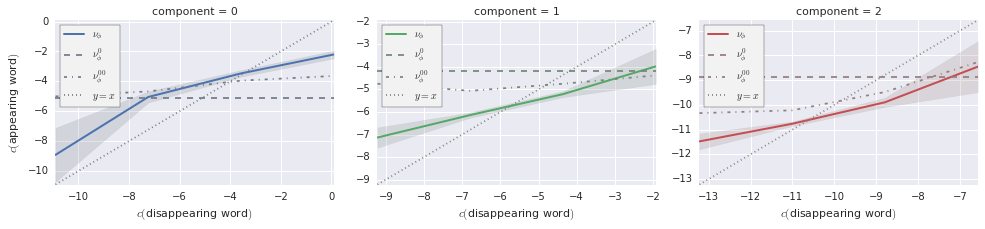

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2387 (cluster-unique) substitutions, but the PCA is in fact computed on 958 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.